In [425]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import datetime
import numpy as np
import matplotlib.dates as mdates
from matplotlib import pyplot 
import seaborn as sns

# Modelling

In [407]:
y=features['Energy_ConsumptionCons']
features.drop('Energy_ConsumptionCons',axis = 1, inplace = True)
X=features

C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\3679401841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop('Energy_ConsumptionCons',axis = 1, inplace = True)


In [408]:
X

T-24Cons  T-23Cons  T-22Cons  T-21Cons  T-20Cons  \
new_Timestamp_UTC                                                       
2018-10-06 21:00:00       2.4       2.4       2.4       2.5       2.4   
2018-10-06 22:00:00       2.4       2.4       2.5       2.4       2.3   
2018-10-06 23:00:00       2.4       2.5       2.4       2.3       2.3   
2018-10-07 00:00:00       2.5       2.4       2.3       2.3       2.2   
2018-10-07 01:00:00       2.4       2.3       2.3       2.2       2.2   
...                       ...       ...       ...       ...       ...   
2020-09-30 15:00:00       3.7       2.0       2.1       2.0       1.9   
2020-09-30 16:00:00       2.0       2.1       2.0       1.9       2.0   
2020-09-30 17:00:00       2.1       2.0       1.9       2.0       2.1   
2020-09-30 18:00:00       2.0       1.9       2.0       2.1       1.9   
2020-09-30 19:00:00       1.9       2.0       2.1       1.9       1.8   

                     T-19Cons  T-18Cons  T-17Cons  T-16Cons  T-15Cons  ...  \
new_Timestamp_UTC                                                      ...   
2018-10-06 21:00:00       2.3       2.3       2.2       2.2       2.4  ...   
2018-10-06 22:00:00       2.3       2.2       2.2       2.4       2.3  ...   
2018-10-06 23:00:00       2.2       2.2       2.4       2.3       2.3  ...   
2018-10-07 00:00:00       2.2       2.4       2.3       2.3       2.4  ...   
2018-10-07 01:00:00       2.4       2.3       2.3       2.4       2.3  ...   
...                       ...       ...       ...       ...       ...  ...   
2020-09-30 15:00:00       2.0       2.1       1.9       1.8       2.0  ...   
2020-09-30 16:00:00       2.1       1.9       1.8       2.0       1.9  ...   
2020-09-30 17:00:00       1.9       1.8       2.0       1.9       2.0  ...   
2020-09-30 18:00:00       1.8       2.0       1.9       2.0       1.7  ...   
2020-09-30 19:00:00       2.0       1.9       2.0       1.7       2.4  ...   

                     T-72Cons  std24_cons  quarter  month  day_of_month  \
new_Timestamp_UTC                                                         
2018-10-06 21:00:00       2.9        0.05        4     10             6   
2018-10-06 22:00:00       2.7        0.05        4     10             6   
2018-10-06 23:00:00       2.6        0.05        4     10             6   
2018-10-07 00:00:00       2.7        0.10        4     10             7   
2018-10-07 01:00:00       2.6        0.00        4     10             7   
...                       ...         ...      ...    ...           ...   
2020-09-30 15:00:00       3.5        0.70        3      9            30   
2020-09-30 16:00:00       3.7        1.45        3      9            30   
2020-09-30 17:00:00       3.3        0.20        3      9            30   
2020-09-30 18:00:00       2.7        0.00        3      9            30   
2020-09-30 19:00:00       2.7        0.05        3      9            30   

                     hour24  is_weekend  working_hours  off_hours  Week_day  
new_Timestamp_UTC                                                            
2018-10-06 21:00:00      21           1              0          1         5  
2018-10-06 22:00:00      22           1              0          1         5  
2018-10-06 23:00:00      23           1              0          1         5  
2018-10-07 00:00:00       0           1              0          1         6  
2018-10-07 01:00:00       1           1              0          1         6  
...                     ...         ...            ...        ...       ...  
2020-09-30 15:00:00      15           0              1          0         2  
2020-09-30 16:00:00      16           0              1          0         2  
2020-09-30 17:00:00      17           0              1          0         2  
2020-09-30 18:00:00      18           0              1          0         2  
2020-09-30 19:00:00      19           0              0          1         2  

[15854 rows x 60 columns]

In [410]:
#Lib imports
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV, KFold, RandomizedSearchCV,train_test_split, StratifiedKFold,TimeSeriesSplit
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sktime.forecasting.model_selection import temporal_train_test_split
import time
from statistics import mean
from joblib import dump, load

#Models (regressors)
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import lightgbm
from lightgbm import LGBMRegressor, plot_importance 
import catboost as cb
from sklearn.neural_network import MLPRegressor


#SMAPE metric
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

def MAPE_function (y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

 ### Train-Test Split


In [411]:
y_train, y_test, X_train, X_test = temporal_train_test_split(y,X, test_size=0.2)

In [412]:
X_train

T-24Cons  T-23Cons  T-22Cons  T-21Cons  T-20Cons  \
new_Timestamp_UTC                                                       
2018-10-06 21:00:00       2.4       2.4       2.4       2.5       2.4   
2018-10-06 22:00:00       2.4       2.4       2.5       2.4       2.3   
2018-10-06 23:00:00       2.4       2.5       2.4       2.3       2.3   
2018-10-07 00:00:00       2.5       2.4       2.3       2.3       2.2   
2018-10-07 01:00:00       2.4       2.3       2.3       2.2       2.2   
...                       ...       ...       ...       ...       ...   
2020-04-30 08:00:00       1.6       1.7       1.4       1.5       1.6   
2020-04-30 09:00:00       1.7       1.4       1.5       1.6       1.5   
2020-04-30 10:00:00       1.4       1.5       1.6       1.5       1.4   
2020-04-30 11:00:00       1.5       1.6       1.5       1.4       1.4   
2020-04-30 12:00:00       1.6       1.5       1.4       1.4       1.6   

                     T-19Cons  T-18Cons  T-17Cons  T-16Cons  T-15Cons  ...  \
new_Timestamp_UTC                                                      ...   
2018-10-06 21:00:00       2.3       2.3       2.2       2.2       2.4  ...   
2018-10-06 22:00:00       2.3       2.2       2.2       2.4       2.3  ...   
2018-10-06 23:00:00       2.2       2.2       2.4       2.3       2.3  ...   
2018-10-07 00:00:00       2.2       2.4       2.3       2.3       2.4  ...   
2018-10-07 01:00:00       2.4       2.3       2.3       2.4       2.3  ...   
...                       ...       ...       ...       ...       ...  ...   
2020-04-30 08:00:00       1.5       1.4       1.4       1.6       1.4  ...   
2020-04-30 09:00:00       1.4       1.4       1.6       1.4       1.5  ...   
2020-04-30 10:00:00       1.4       1.6       1.4       1.5       1.5  ...   
2020-04-30 11:00:00       1.6       1.4       1.5       1.5       1.5  ...   
2020-04-30 12:00:00       1.4       1.5       1.5       1.5       1.4  ...   

                     T-72Cons  std24_cons  quarter  month  day_of_month  \
new_Timestamp_UTC                                                         
2018-10-06 21:00:00       2.9        0.05        4     10             6   
2018-10-06 22:00:00       2.7        0.05        4     10             6   
2018-10-06 23:00:00       2.6        0.05        4     10             6   
2018-10-07 00:00:00       2.7        0.10        4     10             7   
2018-10-07 01:00:00       2.6        0.00        4     10             7   
...                       ...         ...      ...    ...           ...   
2020-04-30 08:00:00       1.6        0.05        2      4            30   
2020-04-30 09:00:00       1.6        0.05        2      4            30   
2020-04-30 10:00:00       1.7        0.10        2      4            30   
2020-04-30 11:00:00       1.7        0.00        2      4            30   
2020-04-30 12:00:00       1.7        0.00        2      4            30   

                     hour24  is_weekend  working_hours  off_hours  Week_day  
new_Timestamp_UTC                                                            
2018-10-06 21:00:00      21           1              0          1         5  
2018-10-06 22:00:00      22           1              0          1         5  
2018-10-06 23:00:00      23           1              0          1         5  
2018-10-07 00:00:00       0           1              0          1         6  
2018-10-07 01:00:00       1           1              0          1         6  
...                     ...         ...            ...        ...       ...  
2020-04-30 08:00:00       8           0              0          1         3  
2020-04-30 09:00:00       9           0              1          0         3  
2020-04-30 10:00:00      10           0              1          0         3  
2020-04-30 11:00:00      11           0              1          0         3  
2020-04-30 12:00:00      12           0              1          0         3  

[12683 rows x 60 columns]

In [413]:
y_test

new_Timestamp_UTC
2020-04-30 13:00:00    1.7
2020-04-30 14:00:00    1.7
2020-04-30 15:00:00    1.5
2020-04-30 16:00:00    1.4
2020-04-30 17:00:00    1.5
                      ... 
2020-09-30 15:00:00    4.9
2020-09-30 16:00:00    2.5
2020-09-30 17:00:00    2.0
2020-09-30 18:00:00    2.0
2020-09-30 19:00:00    1.9
Name: Energy_ConsumptionCons, Length: 3171, dtype: float64

In [414]:
X_test

T-24Cons  T-23Cons  T-22Cons  T-21Cons  T-20Cons  \
new_Timestamp_UTC                                                       
2020-04-30 13:00:00       1.5       1.4       1.4       1.6       1.4   
2020-04-30 14:00:00       1.4       1.4       1.6       1.4       1.5   
2020-04-30 15:00:00       1.4       1.6       1.4       1.5       1.5   
2020-04-30 16:00:00       1.6       1.4       1.5       1.5       1.5   
2020-04-30 17:00:00       1.4       1.5       1.5       1.5       1.4   
...                       ...       ...       ...       ...       ...   
2020-09-30 15:00:00       3.7       2.0       2.1       2.0       1.9   
2020-09-30 16:00:00       2.0       2.1       2.0       1.9       2.0   
2020-09-30 17:00:00       2.1       2.0       1.9       2.0       2.1   
2020-09-30 18:00:00       2.0       1.9       2.0       2.1       1.9   
2020-09-30 19:00:00       1.9       2.0       2.1       1.9       1.8   

                     T-19Cons  T-18Cons  T-17Cons  T-16Cons  T-15Cons  ...  \
new_Timestamp_UTC                                                      ...   
2020-04-30 13:00:00       1.5       1.5       1.5       1.4       1.5  ...   
2020-04-30 14:00:00       1.5       1.5       1.4       1.5       1.4  ...   
2020-04-30 15:00:00       1.5       1.4       1.5       1.4       1.4  ...   
2020-04-30 16:00:00       1.4       1.5       1.4       1.4       1.5  ...   
2020-04-30 17:00:00       1.5       1.4       1.4       1.5       1.4  ...   
...                       ...       ...       ...       ...       ...  ...   
2020-09-30 15:00:00       2.0       2.1       1.9       1.8       2.0  ...   
2020-09-30 16:00:00       2.1       1.9       1.8       2.0       1.9  ...   
2020-09-30 17:00:00       1.9       1.8       2.0       1.9       2.0  ...   
2020-09-30 18:00:00       1.8       2.0       1.9       2.0       1.7  ...   
2020-09-30 19:00:00       2.0       1.9       2.0       1.7       2.4  ...   

                     T-72Cons  std24_cons  quarter  month  day_of_month  \
new_Timestamp_UTC                                                         
2020-04-30 13:00:00       1.7        0.05        2      4            30   
2020-04-30 14:00:00       1.8        0.15        2      4            30   
2020-04-30 15:00:00       1.6        0.15        2      4            30   
2020-04-30 16:00:00       1.6        0.05        2      4            30   
2020-04-30 17:00:00       1.6        0.00        2      4            30   
...                       ...         ...      ...    ...           ...   
2020-09-30 15:00:00       3.5        0.70        3      9            30   
2020-09-30 16:00:00       3.7        1.45        3      9            30   
2020-09-30 17:00:00       3.3        0.20        3      9            30   
2020-09-30 18:00:00       2.7        0.00        3      9            30   
2020-09-30 19:00:00       2.7        0.05        3      9            30   

                     hour24  is_weekend  working_hours  off_hours  Week_day  
new_Timestamp_UTC                                                            
2020-04-30 13:00:00      13           0              1          0         3  
2020-04-30 14:00:00      14           0              1          0         3  
2020-04-30 15:00:00      15           0              1          0         3  
2020-04-30 16:00:00      16           0              1          0         3  
2020-04-30 17:00:00      17           0              1          0         3  
...                     ...         ...            ...        ...       ...  
2020-09-30 15:00:00      15           0              1          0         2  
2020-09-30 16:00:00      16           0              1          0         2  
2020-09-30 17:00:00      17           0              1          0         2  
2020-09-30 18:00:00      18           0              1          0         2  
2020-09-30 19:00:00      19           0              0          1         2  

[3171 rows x 60 columns]

In [415]:
MAPE=[]
MAE =[]
RMSE=[]
MAPE=[]
SMAPE=[]
R_squared=[]
ET=[]

In [416]:
#Evaluation Metrics
def metrics (y_test,y_pred,model_name,count):
    print(f"Model:{model_name}")
    print("MAPE (%):",np.round(100*(mean_absolute_percentage_error(y_test, y_pred)),3))
    MAPE.insert(count,np.round(100*(mean_absolute_percentage_error(y_test, y_pred)),3))
    print("MAE (kWh):", np.round((mean_absolute_error(y_test, y_pred,)),3))
    MAE.insert(count,np.round((mean_absolute_error(y_test, y_pred,)),3))
    print("RMSE (kWh):",np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3))  
    RMSE.insert(count,np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3))                          
    print("R-squared (%):", np.round(100*r2_score(y_test,y_pred),3))
    R_squared.insert(count,np.round(100*r2_score(y_test,y_pred),3))
    print("SMAPE (%):", np.round(smape(y_test,y_pred),3))
    SMAPE.insert(count,np.round(smape(y_test,y_pred),3))
    print("ET(seconds):", np.round((end-start),3))
    ET.insert(count,np.round((end-start),3))
    return

In [417]:
#Feature importance
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,15))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title('Feature Importance: ' + model_type)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')

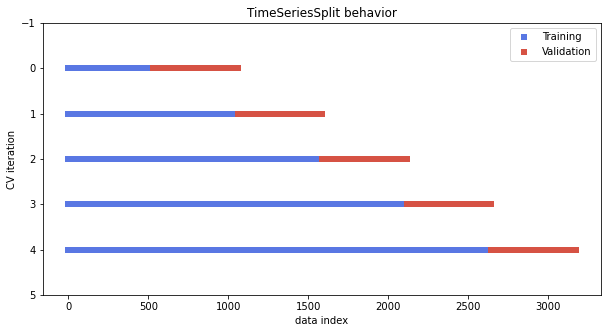

In [418]:
#Ensembling-Cross Validation
cv_ΜΑΕ_means =[]
cv_RMSE_means=[]
cv_R2_means=[]
cv_MAPE_means=[]
Nsplits=5
cv=TimeSeriesSplit(n_splits=Nsplits)
#cv=KFold(n_splits=Nsplits)
fig,ax=plt.subplots(figsize=(10,5))
for ii,(tr,tt) in enumerate (cv.split(X_test, y_test)):
    #Plot Training and Test indices
    l1=ax.scatter(tr,[ii]*len(tr), c=[plt.cm.coolwarm(.1)], marker='_',lw=6)
    l2=ax.scatter(tt,[ii]*len(tt), c=[plt.cm.coolwarm(.9)],marker='_',lw=6)
    ax.set(ylim=[Nsplits,-1], title='TimeSeriesSplit behavior',xlabel='data index', ylabel='CV iteration')
    ax.legend([l1,l2],['Training','Validation'])

def cv_score (estimator,X,y,Nsplits,count):
    cv=TimeSeriesSplit(n_splits=Nsplits)
    mape_scorer = make_scorer(MAPE_function)

    MAE_cross = (-cross_val_score(estimator, X, y, cv=cv,scoring='neg_mean_absolute_error', n_jobs=1))
    RMSE_cross = (-cross_val_score(estimator, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=1))
    R2_cross = 100*(cross_val_score(estimator, X, y, cv=cv, scoring='r2',n_jobs=1))
    MAPE_cross=(cross_val_score(estimator, X, y, cv=cv, scoring=mape_scorer,n_jobs=1))
    #y_pred = cross_val_predict(estimator, X, y, cv=cv, n_jobs=-1)
    
    cv_ΜΑΕ_means.insert(count,MAE_cross.mean())
    cv_RMSE_means.insert(count,RMSE_cross.mean())
    cv_R2_means.insert(count,R2_cross.mean())
    cv_MAPE_means.insert(count,MAPE_cross.mean())
    
    print(f"MAE: {MAE_cross.mean()} (+/- {MAE_cross.std()})")
    print(f"RMSE: {RMSE_cross.mean()} (+/- {RMSE_cross.std()})")
    print(f"R-squared: {R2_cross.mean()} (+/- {R2_cross.std()})")
    print(f"MAPE: {MAPE_cross.mean()} (+/- {MAPE_cross.std()})")
    return 

    

 ### XGBoost 

In [419]:
start = time.time()
XGBoost = xgb.XGBRegressor(importance_type='gain',
    objective='reg:squarederror',
    n_estimators=850,
    max_depth=6,
    learning_rate=0.01,
    colsample_bytree=0.7,
    subsample=1.0
)
XGBoost.fit(X_train, y_train)
y_pred = XGBoost.predict(X_test)
end = time.time()
metrics (y_test,y_pred,'XGBoost',0)
dump(XGBoost, 'filename.XGBoost_stored') 

Model:XGBoost
MAPE (%): 11.613
MAE (kWh): 0.275
RMSE (kWh): 0.523
R-squared (%): 91.807
SMAPE (%): 10.352
ET(seconds): 5.781


['filename.XGBoost_stored']

In [420]:
cv_score(XGBoost,X,y,Nsplits,0)
#metrics (y_test,y_pred_CV,'XGBoost_CV',0)

KeyboardInterrupt: 

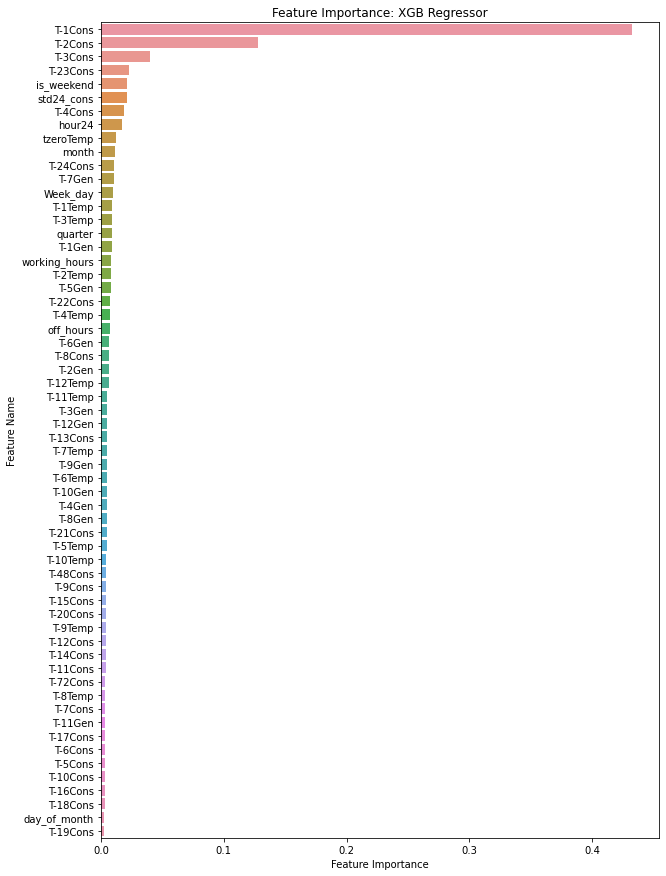

In [ ]:
importance = XGBoost.feature_importances_
plot_feature_importance(importance,X_train.columns,'XGB Regressor')

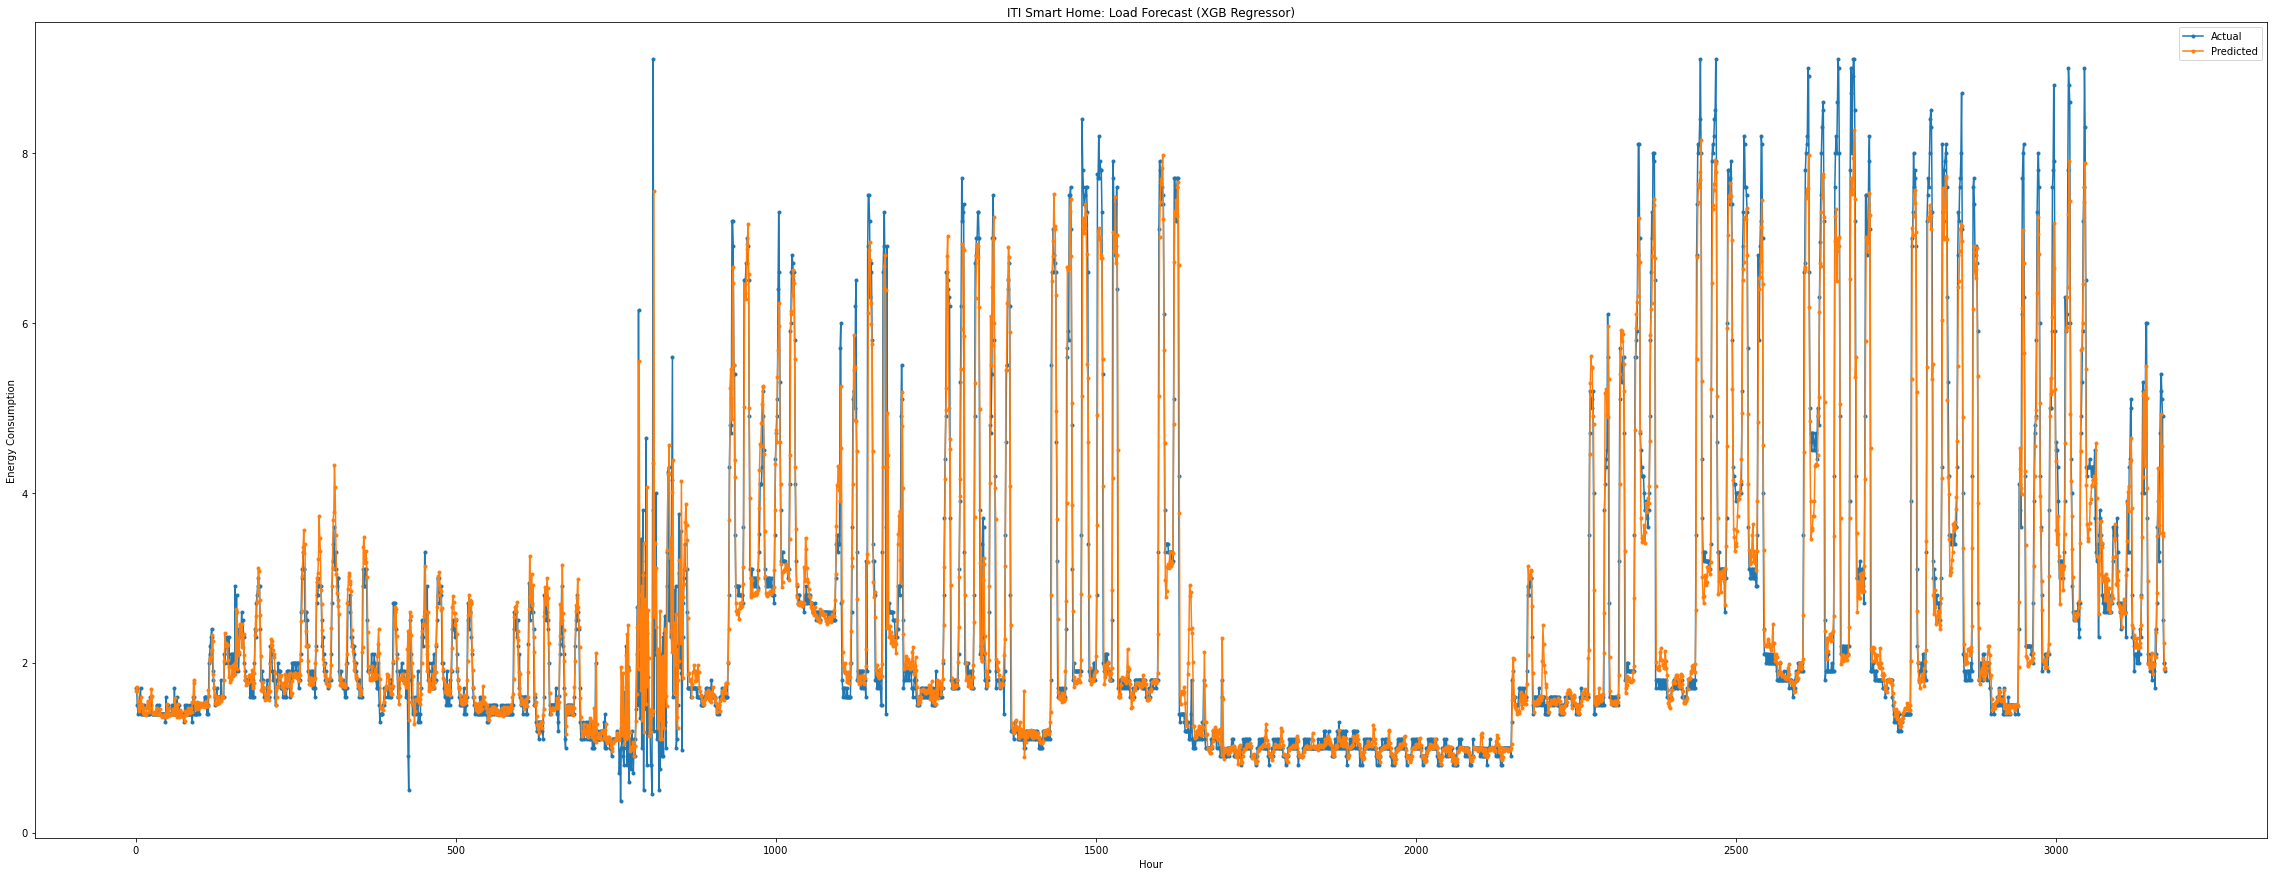

In [ ]:
y_pred_all=pd.DataFrame()
y_pred_all['XGBoost']=(y_pred)
y_pred_XGB= pd.DataFrame(y_pred)
y_pred_XGB.rename(columns = {0: 'Predicted'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_XGB.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (XGB Regressor)')
plt.legend()

 ### Random Forest

In [ ]:
start=time.time()
RF = RandomForestRegressor(
bootstrap= True,
max_features='auto',
max_depth= 40,                            
min_samples_leaf= 6,
min_samples_split=6,
n_estimators = 500,
n_jobs=-1
)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_pred_RF=y_pred
end = time.time()
metrics (y_test,y_pred,'Random Forest',1)
dump(RF, 'filename.RF_stored') 

C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Model:Random Forest
MAPE (%): 11.546
MAE (kWh): 0.273
RMSE (kWh): 0.531
R-squared (%): 91.573
SMAPE (%): 10.295
ET(seconds): 12.93


['filename.RF_stored']

In [ ]:
cv_score(RF,X,y,Nsplits,1)

C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

MAE: 0.37228286359190166 (+/- 0.046048166006092864)
RMSE: 0.6420480097893169 (+/- 0.06726180487751493)
R-squared: 85.76163294659652 (+/- 3.7753139685857535)
MAPE: 14.426245595693766 (+/- 1.9631038007950592)


In [ ]:
importance = RF.feature_importances_
importance

array([3.08774428e-03, 1.04394845e-02, 5.82997361e-03, 2.38362480e-03,
       2.02692571e-03, 1.37062524e-03, 1.48320146e-03, 1.26559985e-03,
       9.77167887e-04, 9.72356265e-04, 9.72979905e-04, 1.06474917e-03,
       1.14641220e-03, 1.12136178e-03, 1.10574260e-03, 1.18623315e-03,
       1.68615343e-03, 1.61606798e-03, 1.47058504e-03, 1.51449016e-03,
       2.06560292e-03, 3.66800268e-03, 7.15849952e-03, 8.87366637e-01,
       5.36117169e-04, 3.62785382e-04, 5.67808324e-04, 6.64366124e-04,
       6.01233746e-04, 1.59592576e-03, 1.09380872e-03, 1.83324192e-03,
       9.90887318e-04, 1.13125641e-03, 1.49574952e-03, 2.80907469e-03,
       2.85016451e-03, 1.29818705e-03, 1.03474669e-03, 1.10214820e-03,
       1.06212667e-03, 1.04188466e-03, 1.17339346e-03, 1.18831828e-03,
       1.13486943e-03, 1.48806309e-03, 2.36220125e-03, 1.99736332e-03,
       4.80789506e-03, 2.37943329e-03, 2.46609437e-03, 2.08213932e-03,
       2.56334668e-04, 1.49314206e-03, 1.53671986e-03, 7.06006413e-03,
      

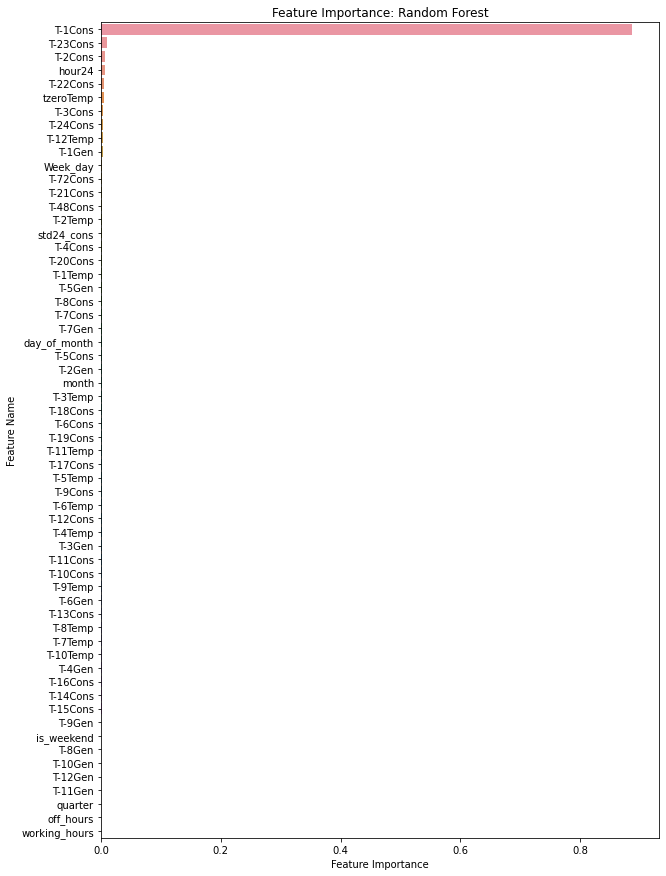

In [ ]:
plot_feature_importance(importance,X_train.columns,'Random Forest')

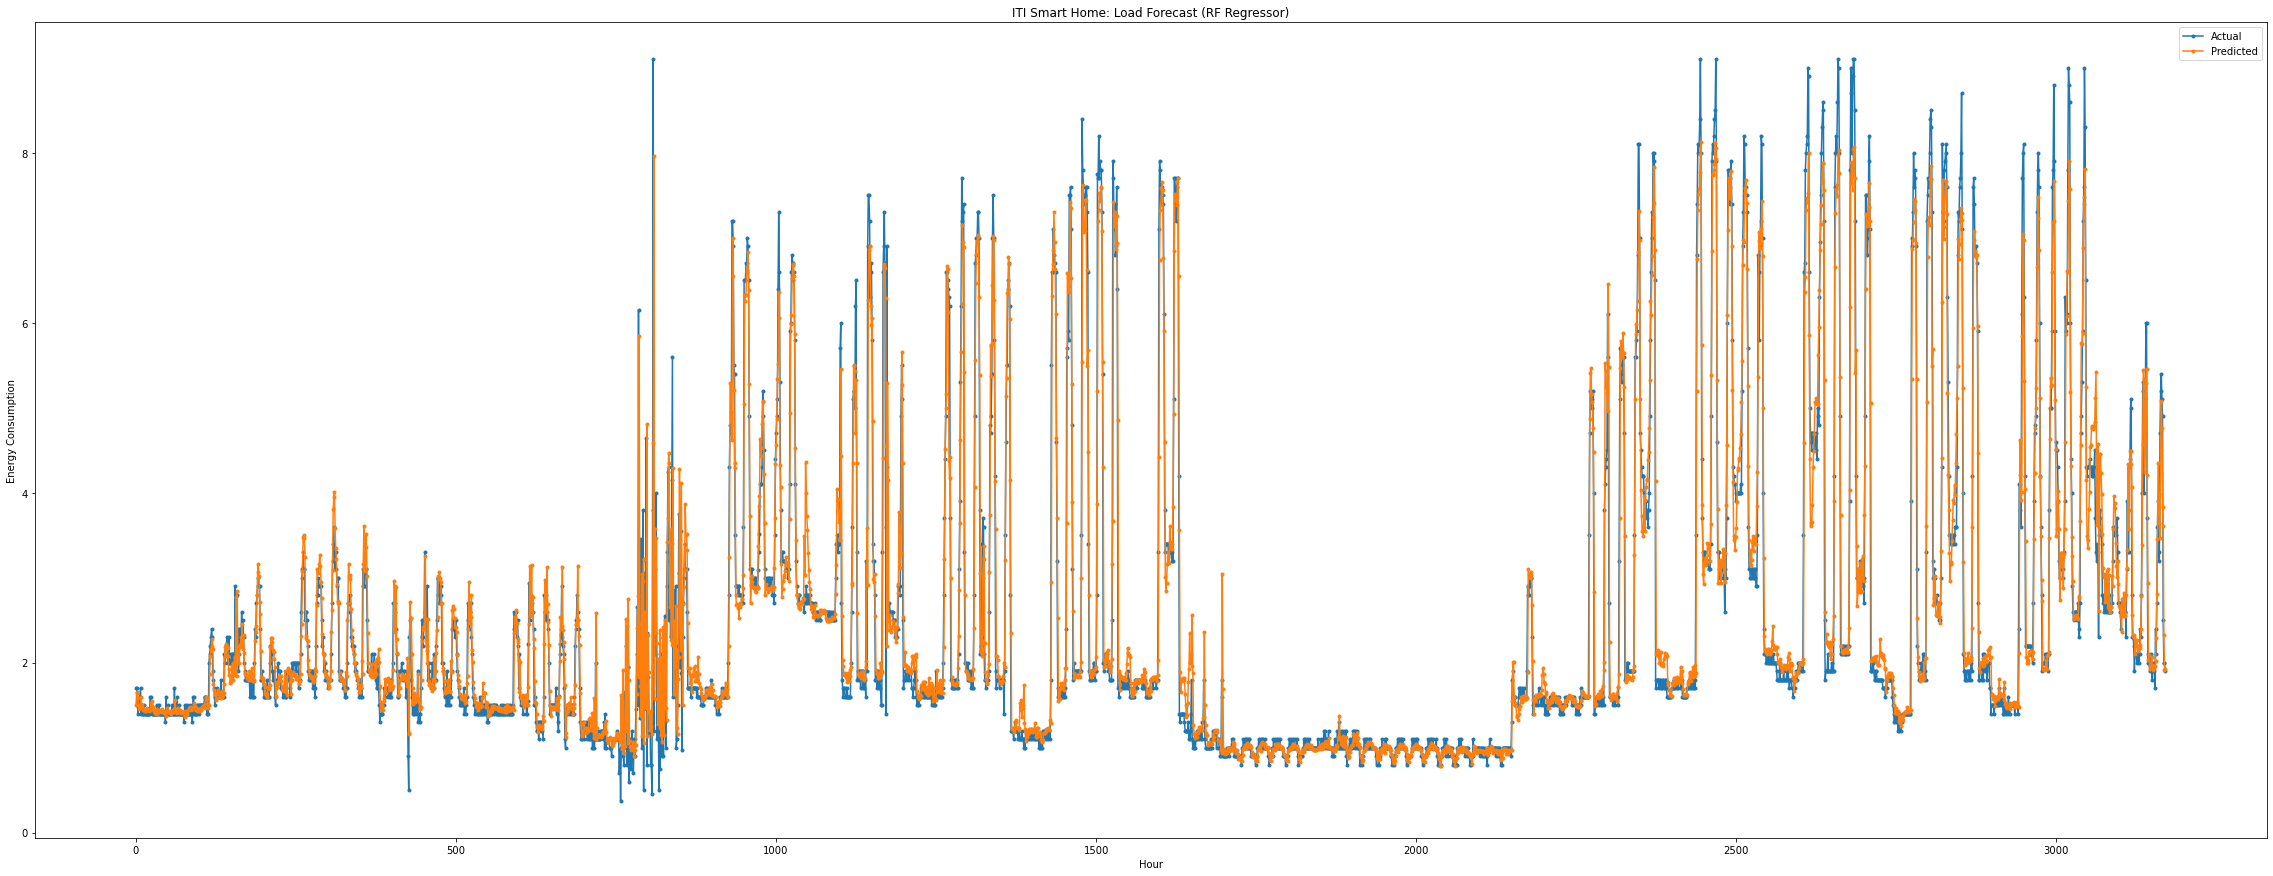

In [ ]:
y_pred_all['RF']=(y_pred)
y_pred_RF= pd.DataFrame(y_pred)
y_pred_RF.rename(columns = {0:'Predicted'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_RF.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (RF Regressor)')
plt.legend()

### LGBM

In [461]:
start=time.time()
LGBM = LGBMRegressor(
max_depth=10,
num_leaves=22,
min_data_in_leaf=80,
max_bin=90,
)

LGBM.fit(X_train, y_train)
y_pred = LGBM.predict(X_test)
y_pred_LGBM=y_pred 
end = time.time()
metrics (y_test,y_pred,'LGBM',2)
dump(LGBM, 'filename.LGBM_stored') 

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80


TypeError: 'module' object is not callable

In [ ]:
cv_score(LGBM,X,y,Nsplits,2)

[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] min

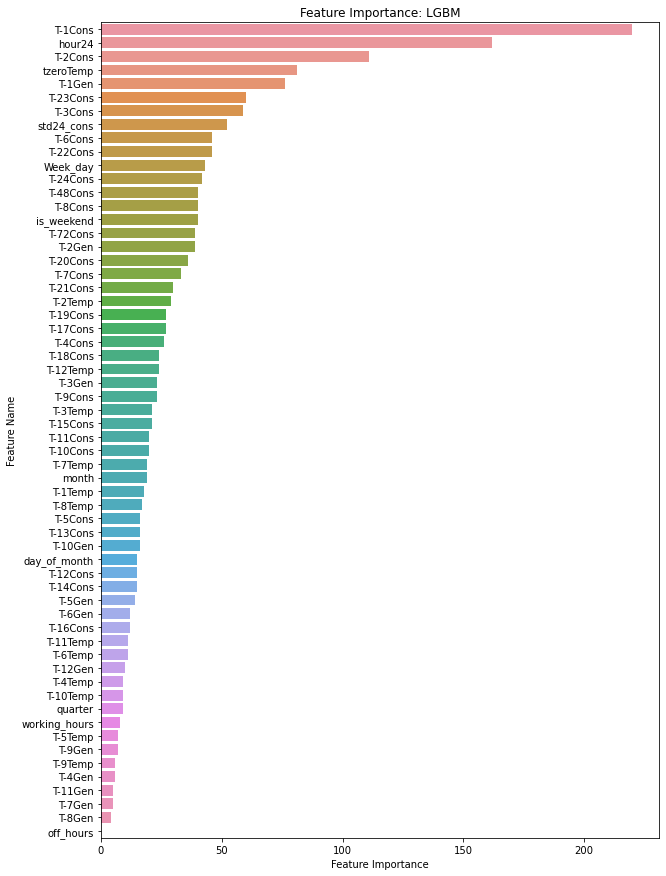

In [ ]:
importance=LGBM.feature_importances_
plot_feature_importance(importance,X_train.columns,'LGBM')

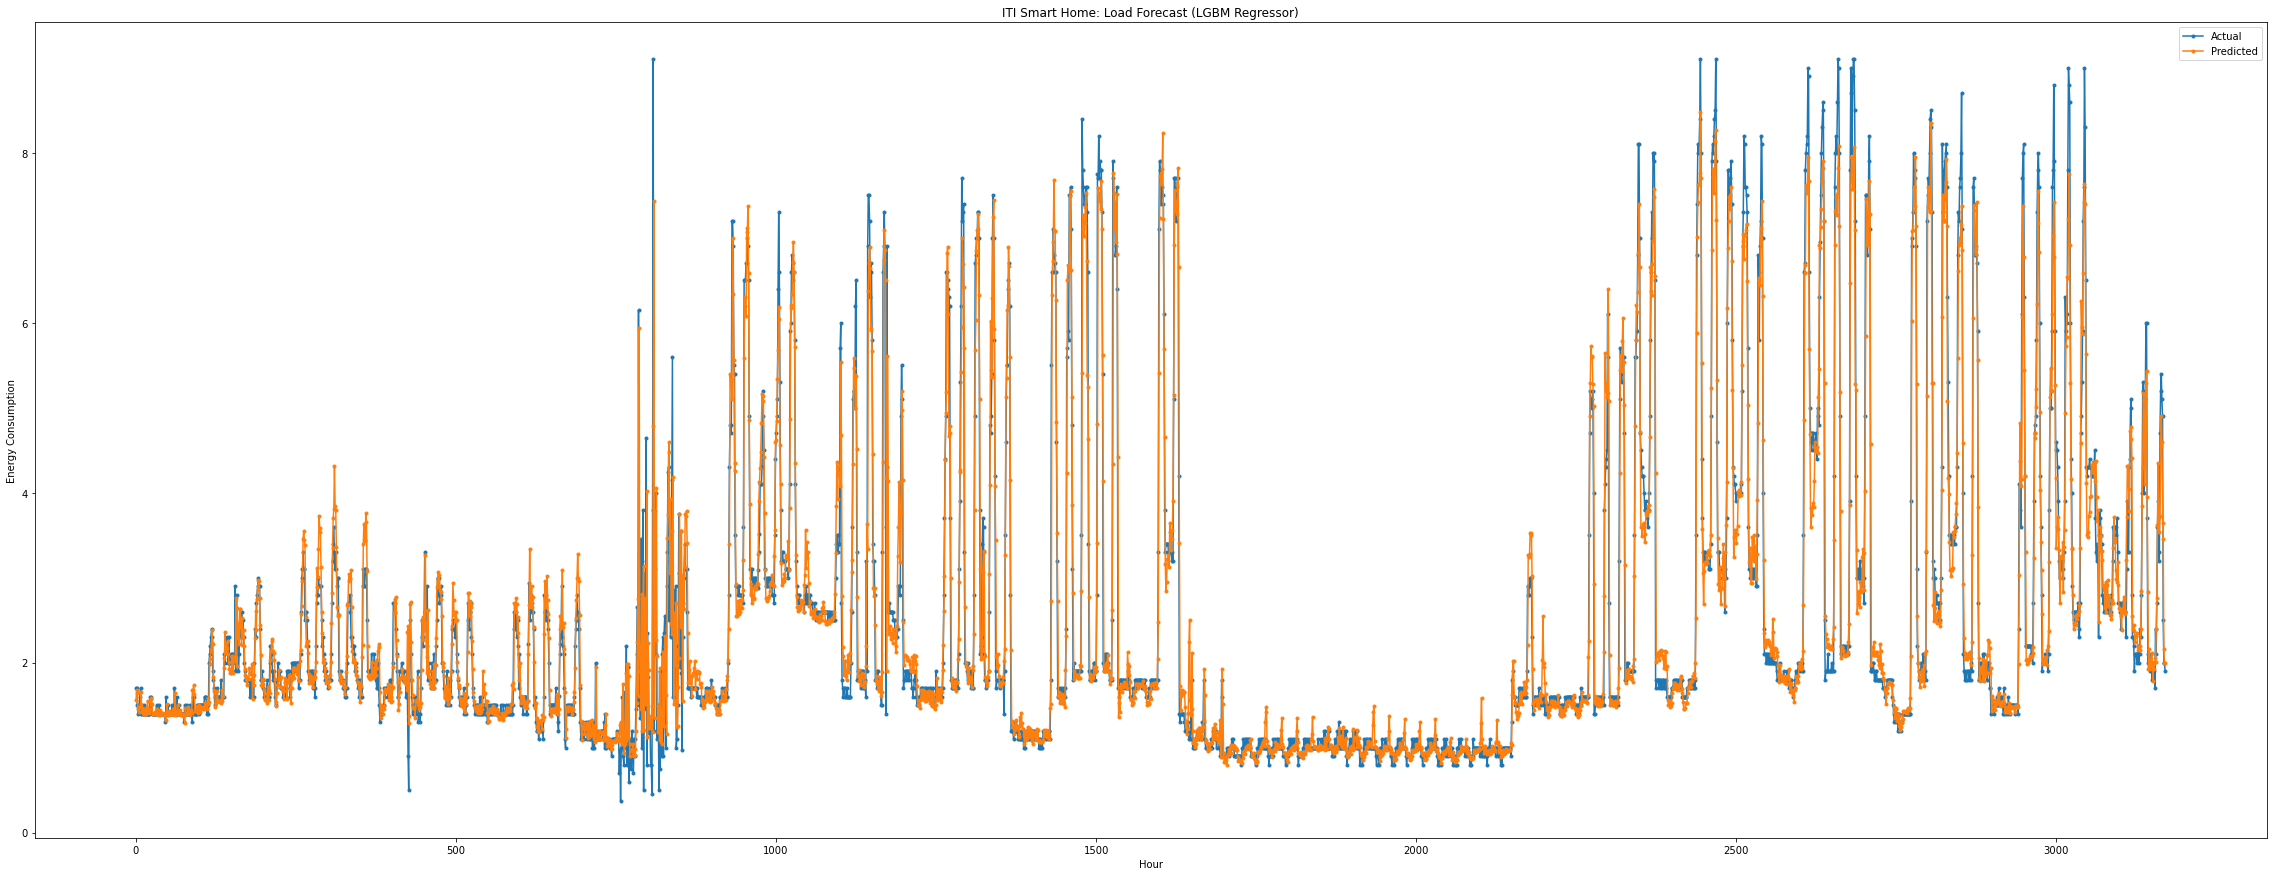

In [ ]:
y_pred_all['LGBM']=(y_pred)
y_pred_LGBM=pd.DataFrame(y_pred)
y_pred_LGBM.rename(columns = {0:'Predicted'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_LGBM.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (LGBM Regressor)')
plt.legend()

## CATBoost

In [ ]:
start = time.time()
CATBoost = cb.CatBoostRegressor(
    iterations=850,
    learning_rate=0.02,
    depth=6,
    l2_leaf_reg=0.6,
    verbose=0,
    loss_function='MAE'
)

CATBoost.fit(X_train, y_train)
y_pred = CATBoost.predict(X_test)
y_pred_CATB=y_pred 
end = time.time()
metrics (y_test,y_pred,'CATBoost',3)
dump(CATBoost, 'filename.CATBoost_stored') 

Model:CATBoost
MAPE (%): 10.584
MAE (kWh): 0.259
RMSE (kWh): 0.53
R-squared (%): 91.587
SMAPE (%): 9.757
ET(seconds): 5.194


['filename.CATBoost_stored']

In [ ]:
cv_score(CATBoost,X,y,Nsplits,3)

MAE: 0.3534521024287314 (+/- 0.04718857118617681)
RMSE: 0.6285630730609004 (+/- 0.06357829858285052)
R-squared: 86.51393967547486 (+/- 3.2687331568134805)
MAPE: 12.984804461281888 (+/- 1.451434517680126)


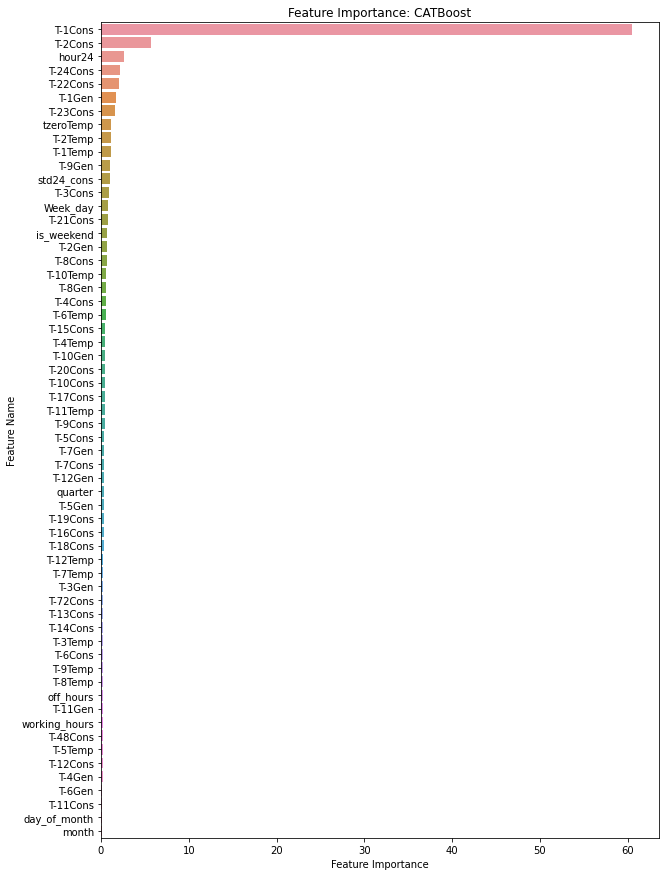

In [ ]:
importance=CATBoost.feature_importances_
plot_feature_importance(importance,X_train.columns,'CATBoost')

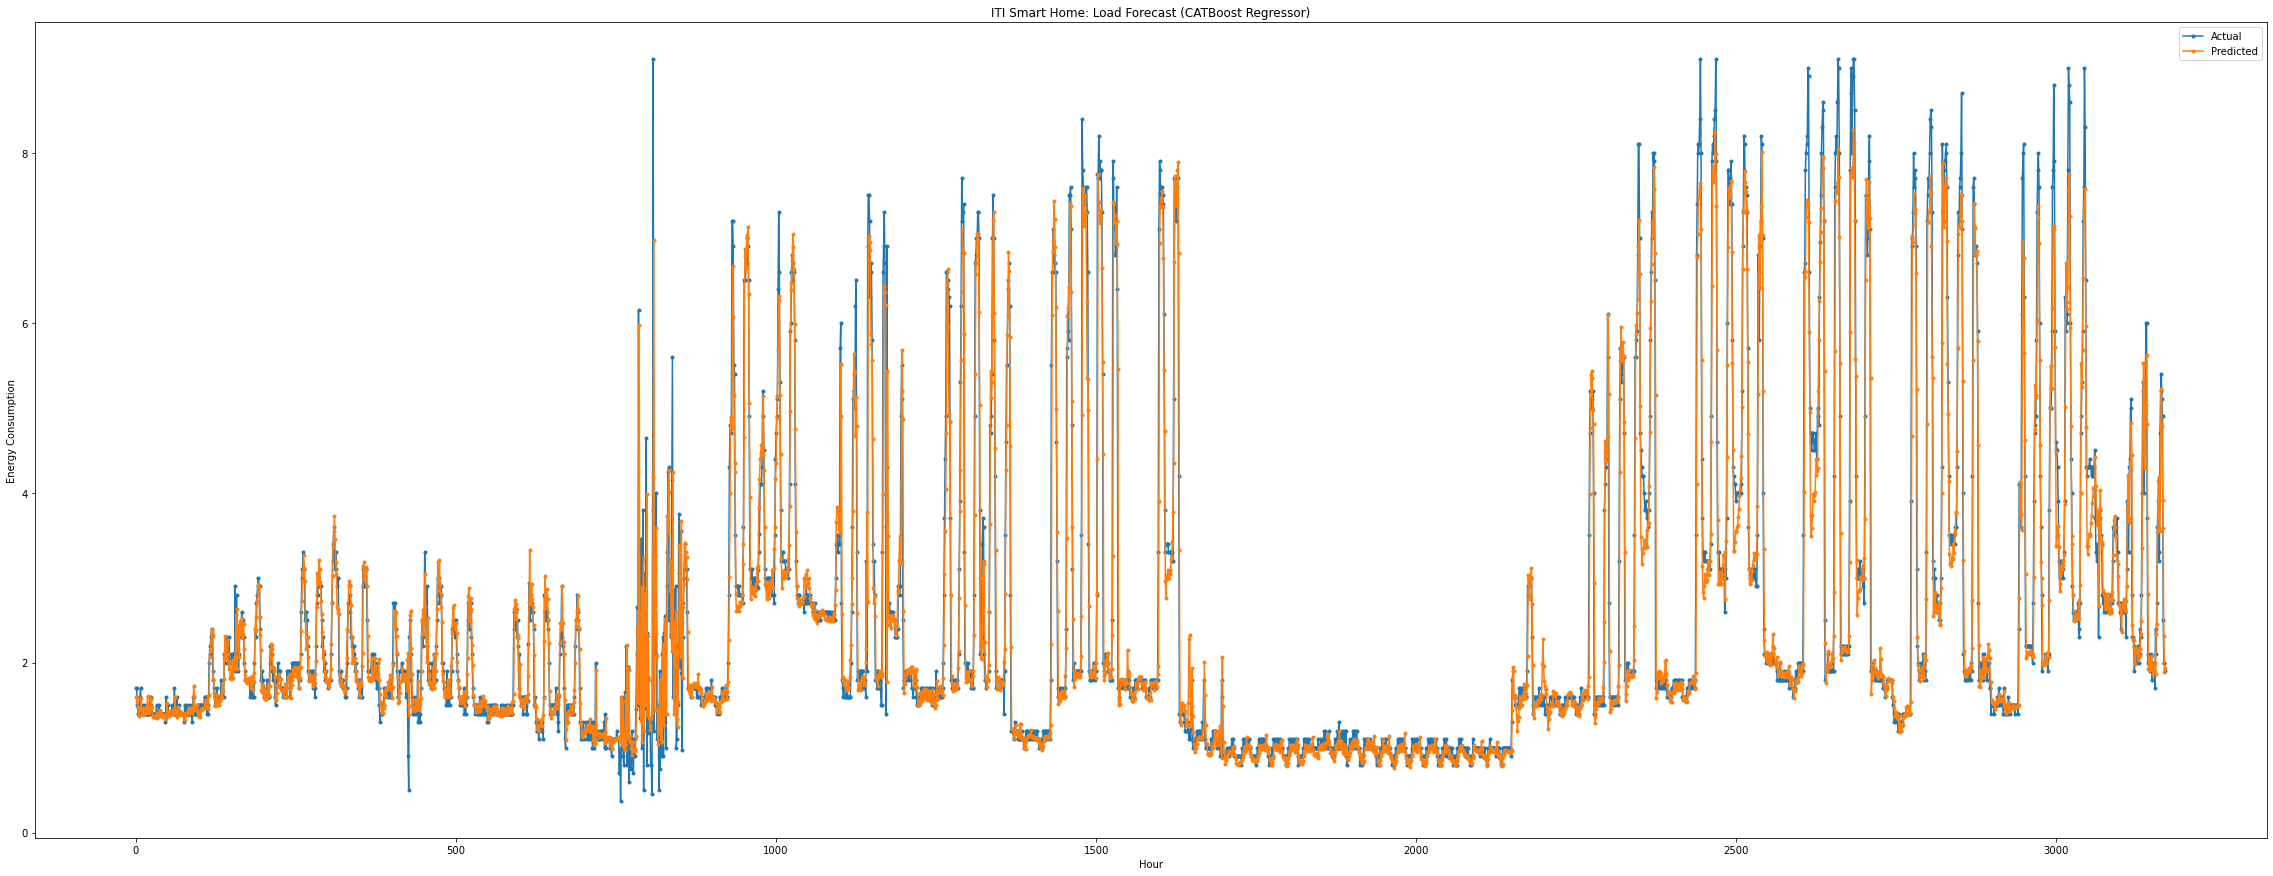

In [ ]:
y_pred_all['CATBoost']=(y_pred)
y_pred_CATB=pd.DataFrame(y_pred)
y_pred_CATB.rename(columns = {0:'Predicted'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_CATB.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (CATBoost Regressor)')
plt.legend()

## MLP

MLP = MLPRegressor(hidden_layer_sizes=(80, 60, 20), 
                   max_iter=500,
                   solver='sgd',
                   activation ='relu', 
                   learning_rate_init=0.001, 
                   alpha=0.02,
                   learning_rate='adaptive', 
                   #warm_start=True,
                   #power_t=0.4,
                   #shuffle=True
                   )   
start=time.time()


MLP.fit(
X_train,
y_train,
)

y_pred_MLP = MLP.predict(X_test)
#testPredict = model.predict(y_test)
#y_pred_MLP = y_sc.inverse_transform(y_pred_MLP)
end = time.time()
metrics (y_test,y_pred_MLP,'MLP',4)

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(50,100,50),
                   max_iter=2000,
                   solver='lbfgs',
                   activation ='relu', 
                   learning_rate_init=0.01, 
                   alpha=0.005,
                   learning_rate='adaptive', 
                   warm_start=True,
                
                   )   
start=time.time()

MLP.fit(
X_train,
y_train,
)

y_pred_MLP = MLP.predict(X_test)
#testPredict = model.predict(y_test)
#y_pred_MLP = y_sc.inverse_transform(y_pred_MLP)
end = time.time()
metrics (y_test,y_pred_MLP,'MLP',4)
dump(MLP, 'filename.MLP_stored') 

Model:MLP
MAPE (%): 12.374
MAE (kWh): 0.293
RMSE (kWh): 0.556
R-squared (%): 90.754
SMAPE (%): 11.202
ET(seconds): 109.96


C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


['filename.MLP_stored']

MLP = MLPRegressor(hidden_layer_sizes=(100, 60, 20), 
                   max_iter=1000,
                   solver='sgd',
                   activation ='relu', 
                   learning_rate_init=0.002, 
                   alpha=0.01,
                   learning_rate='adaptive', 
                   warm_start=True,
                   #power_t=0.9,
                   #shuffle=True
                   )   
start=time.time()

MLP.fit(
X_train,
y_train,
)

y_pred_MLP = MLP.predict(X_test)
#testPredict = model.predict(y_test)
#y_pred_MLP = y_sc.inverse_transform(y_pred_MLP)
end = time.time()
metrics (y_test,y_pred_MLP,'MLP',4)

MLP = MLPRegressor(hidden_layer_sizes=(100, 60, 40), 
                   max_iter=2000,
                   solver='lbfgs',
                   activation ='identity', 
                   learning_rate_init=0.002, 
                   alpha=0.01,
                   learning_rate='adaptive', 
                   warm_start=True,
                   power_t=0.9,
                   shuffle=True
                   )   
start=time.time()

scaling = MinMaxScaler(feature_range=(-1,1))
y_train_temp=np.array(y_train).reshape(-1,1)
y_test_temp=np.array(y_test).reshape(-1,1)

X_train_MLP = scaling.fit_transform(X_train)
#X_train_MLP=X_train_MLP.reshape((X_train_MLP.shape[0], X_train_MLP.shape[1]))

y_train_MLP = scaling.fit_transform(y_train_temp)
X_test_MLP = scaling.fit_transform(X_test)
#X_test_MLP=X_test_MLP.reshape((X_test_MLP.shape[0], X_test_MLP.shape[1]))
y_test_MLP = scaling.fit_transform(y_test_temp)

MLP.fit(
X_train_MLP,
y_train_MLP,
)

y_pred_MLP_sc = MLP.predict(X_test_MLP)
print(y_pred_MLP_sc.shape)
y_pred_MLP_sc=np.array(y_pred_MLP_sc).reshape(-1,1)
#testPredict = model.predict(y_test)
y_pred_MLP_sc = scaling.inverse_transform(y_pred_MLP_sc)
end = time.time()
metrics (y_test_temp,y_pred_MLP_sc,'MLP',4)

In [ ]:
cv_score(MLP,X,y,Nsplits,4)

C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs

KeyboardInterrupt: 

importance=MLP.feature_importances_
plot_feature_importance(importance,X_train.columns,'MLP Regressor')

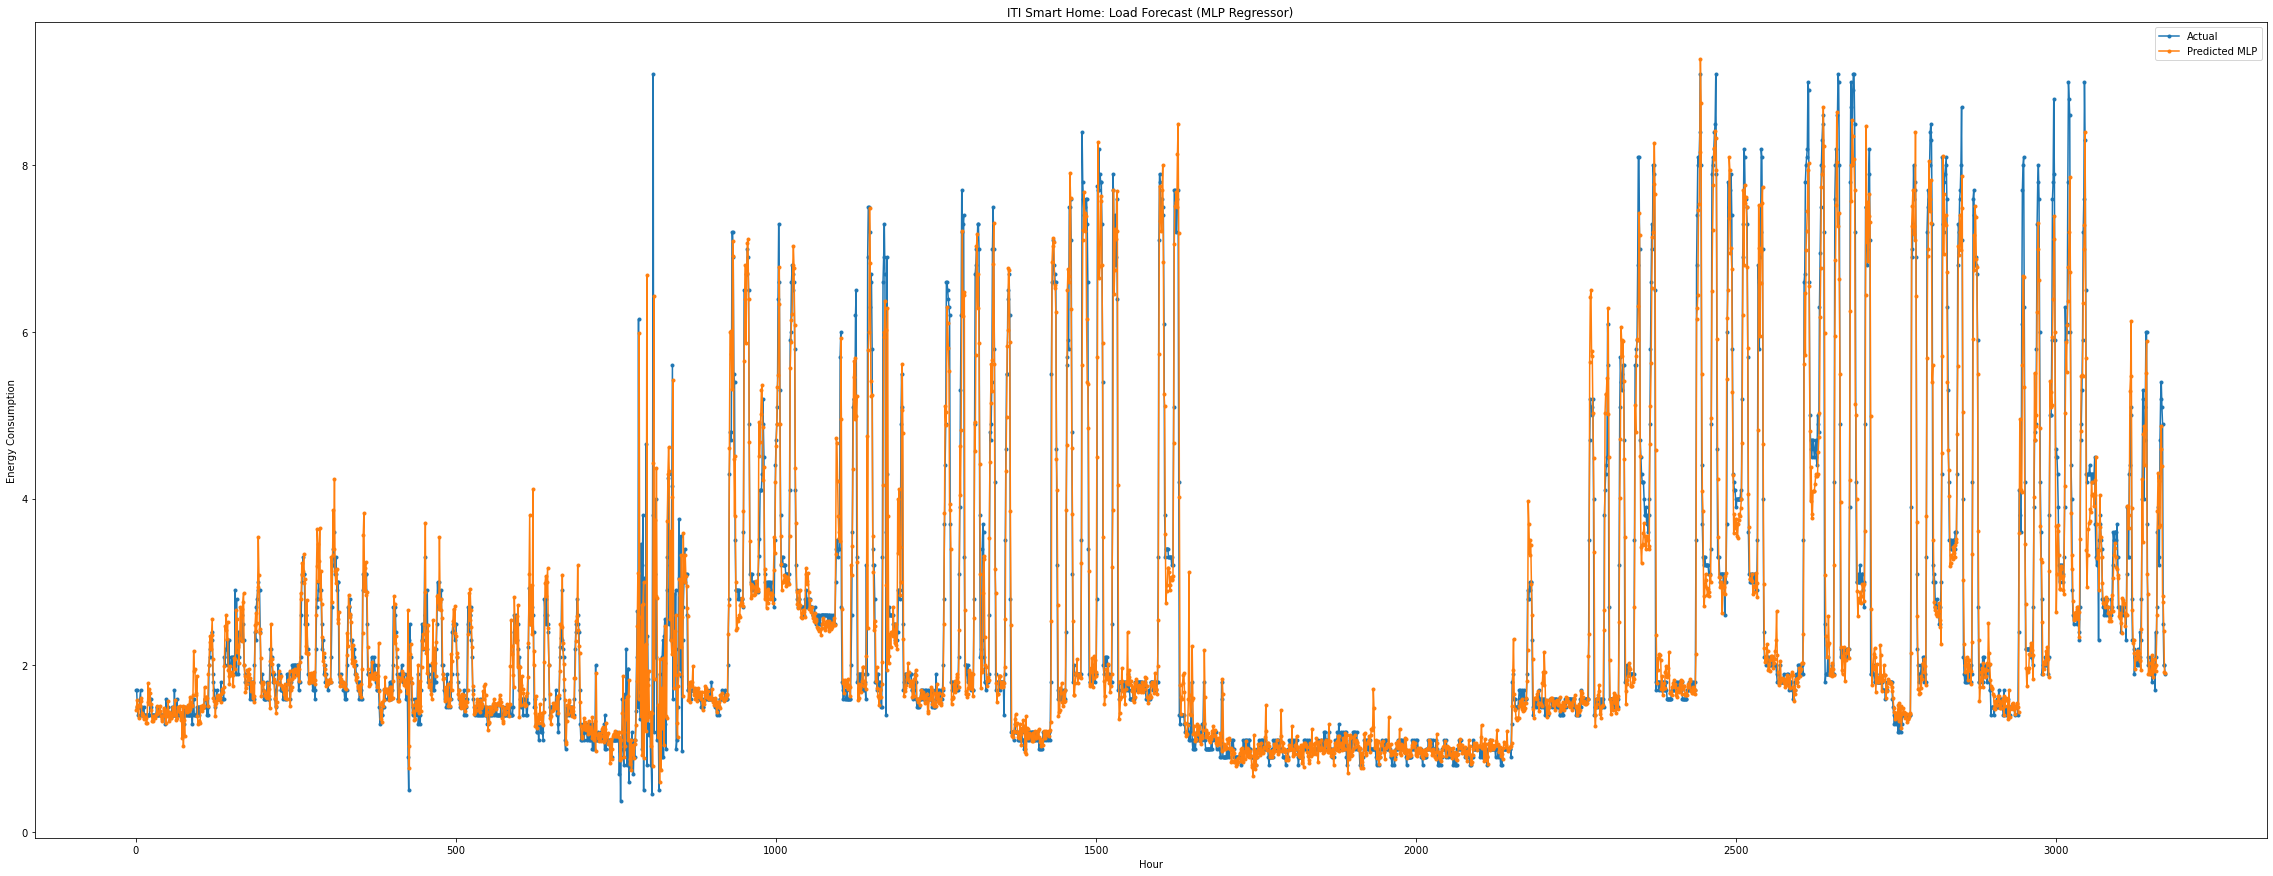

In [ ]:
y_pred_all['MLP']=(y_pred_MLP)
y_pred_MLP_pd=pd.DataFrame(y_pred_MLP)
y_pred_MLP_pd.rename(columns = {0:'Predicted MLP'}, inplace = True)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_MLP_pd.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (MLP Regressor)')
plt.legend()

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Dropout,Bidirectional,TimeDistributed
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError, Accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras import activations
from sklearn.model_selection import KFold,GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
def get_model(params, input_shape):
    model = Sequential()
    model.add(LSTM(units=(params["lstm_units"]),activation=params["activ_function"], return_sequences=True, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    model.add(Dropout(rate=params["dropout"]))
    
    model.add(LSTM(units=(params["lstm_units"]),activation=params["activ_function"], return_sequences=False))
    model.add(Dropout(rate=params["dropout"]))

    model.add(Dense(y_train_LSTM.shape[1],activation='linear'))

    model.compile(loss=params["loss"],
              	optimizer=params["optimizer"],
              	metrics=[MeanAbsoluteError(),RootMeanSquaredError()])

    return model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_sc = MinMaxScaler(feature_range=(-1,1))
y_sc = MinMaxScaler(feature_range=(-1,1))
y_train=np.array(y_train).reshape(-1,1)
#y_train=scale()

y_test=np.array(y_test).reshape(-1,1)

X_train_LSTM = X_sc.fit_transform(X_train)
X_train_LSTM=X_train_LSTM.reshape((X_train_LSTM.shape[0], 1, X_train_LSTM.shape[1]))
y_train_LSTM = y_sc.fit_transform(y_train)

X_test_LSTM = X_sc.fit_transform(X_test)
X_test_LSTM=X_test_LSTM.reshape((X_test_LSTM.shape[0], 1, X_test_LSTM.shape[1]))

y_test_LSTM = y_sc.fit_transform(y_test)
y_LSTM=y_sc.fit_transform(y_test)
#y_test_LSTM=y_test_LSTM.ravel()

X_LSTM = X_sc.fit_transform(X)
X_LSTM=X_LSTM.reshape((X_LSTM.shape[0], 1, X_LSTM.shape[1]))
y_LSTM_temp=np.array(y).reshape(-1,1)
y_LSTM= y_sc.fit_transform(y_LSTM_temp)

In [ ]:
X_train_LSTM

array([[[-0.47252747, -0.47252747, -0.47252747, ..., -1.        ,
          1.        ,  0.66666667]],

       [[-0.47252747, -0.47252747, -0.45054945, ..., -1.        ,
          1.        ,  0.66666667]],

       [[-0.47252747, -0.45054945, -0.47252747, ..., -1.        ,
          1.        ,  0.66666667]],

       ...,

       [[-0.69230769, -0.67032967, -0.64835165, ...,  1.        ,
         -1.        ,  0.        ]],

       [[-0.67032967, -0.64835165, -0.67032967, ...,  1.        ,
         -1.        ,  0.        ]],

       [[-0.64835165, -0.67032967, -0.69230769, ...,  1.        ,
         -1.        ,  0.        ]]])

In [ ]:
X_train

T-24Cons  T-23Cons  T-22Cons  T-21Cons  T-20Cons  \
new_Timestamp_UTC                                                       
2018-10-06 21:00:00       2.4       2.4       2.4       2.5       2.4   
2018-10-06 22:00:00       2.4       2.4       2.5       2.4       2.3   
2018-10-06 23:00:00       2.4       2.5       2.4       2.3       2.3   
2018-10-07 00:00:00       2.5       2.4       2.3       2.3       2.2   
2018-10-07 01:00:00       2.4       2.3       2.3       2.2       2.2   
...                       ...       ...       ...       ...       ...   
2020-04-30 08:00:00       1.6       1.7       1.4       1.5       1.6   
2020-04-30 09:00:00       1.7       1.4       1.5       1.6       1.5   
2020-04-30 10:00:00       1.4       1.5       1.6       1.5       1.4   
2020-04-30 11:00:00       1.5       1.6       1.5       1.4       1.4   
2020-04-30 12:00:00       1.6       1.5       1.4       1.4       1.6   

                     T-19Cons  T-18Cons  T-17Cons  T-16Cons  T-15Cons  ...  \
new_Timestamp_UTC                                                      ...   
2018-10-06 21:00:00       2.3       2.3       2.2       2.2       2.4  ...   
2018-10-06 22:00:00       2.3       2.2       2.2       2.4       2.3  ...   
2018-10-06 23:00:00       2.2       2.2       2.4       2.3       2.3  ...   
2018-10-07 00:00:00       2.2       2.4       2.3       2.3       2.4  ...   
2018-10-07 01:00:00       2.4       2.3       2.3       2.4       2.3  ...   
...                       ...       ...       ...       ...       ...  ...   
2020-04-30 08:00:00       1.5       1.4       1.4       1.6       1.4  ...   
2020-04-30 09:00:00       1.4       1.4       1.6       1.4       1.5  ...   
2020-04-30 10:00:00       1.4       1.6       1.4       1.5       1.5  ...   
2020-04-30 11:00:00       1.6       1.4       1.5       1.5       1.5  ...   
2020-04-30 12:00:00       1.4       1.5       1.5       1.5       1.4  ...   

                     T-72Cons  std24_cons  quarter  month  day_of_month  \
new_Timestamp_UTC                                                         
2018-10-06 21:00:00       2.9        0.05        4     10             6   
2018-10-06 22:00:00       2.7        0.05        4     10             6   
2018-10-06 23:00:00       2.6        0.05        4     10             6   
2018-10-07 00:00:00       2.7        0.10        4     10             7   
2018-10-07 01:00:00       2.6        0.00        4     10             7   
...                       ...         ...      ...    ...           ...   
2020-04-30 08:00:00       1.6        0.05        2      4            30   
2020-04-30 09:00:00       1.6        0.05        2      4            30   
2020-04-30 10:00:00       1.7        0.10        2      4            30   
2020-04-30 11:00:00       1.7        0.00        2      4            30   
2020-04-30 12:00:00       1.7        0.00        2      4            30   

                     hour24  is_weekend  working_hours  off_hours  Week_day  
new_Timestamp_UTC                                                            
2018-10-06 21:00:00      21           1              0          1         5  
2018-10-06 22:00:00      22           1              0          1         5  
2018-10-06 23:00:00      23           1              0          1         5  
2018-10-07 00:00:00       0           1              0          1         6  
2018-10-07 01:00:00       1           1              0          1         6  
...                     ...         ...            ...        ...       ...  
2020-04-30 08:00:00       8           0              0          1         3  
2020-04-30 09:00:00       9           0              1          0         3  
2020-04-30 10:00:00      10           0              1          0         3  
2020-04-30 11:00:00      11           0              1          0         3  
2020-04-30 12:00:00      12           0              1          0         3  

[12683 rows x 60 columns]

In [ ]:
X_train_LSTM.shape

(12683, 1, 60)

In [ ]:
from tensorflow.keras.layers import LSTM,Dense,Dropout,Bidirectional,TimeDistributed
#LSTM Parameters
params = {
	"activ_function" : 'relu',
    "loss": "mae",
	"optimizer": 'RMSprop',
	"dropout": 0.2,
	"lstm_units": 128,
	"epochs": 40,
	"batch_size": 128,
	"es_patience" : 20
}


LSTM = get_model(params=params, input_shape=(X_train_LSTM.shape[1],X_train_LSTM.shape[2]))

In [ ]:

start=time.time()
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error',mode='min', patience=params["es_patience"])
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'lstm__fold.ckpt',
        monitor='val_mean_absolute_error',
        mode="min",
        save_best_only=False,
        save_weights_only=True,
        verbose=1
        )

history=LSTM.fit(
X_train_LSTM,
y_train_LSTM,
validation_data=(X_test_LSTM,y_test_LSTM),
epochs=params["epochs"],
batch_size=params["batch_size"],
verbose=2,
validation_split=0.2,
callbacks=[es_callback,checkpoint_callback]
)


Epoch 1/40

Epoch 1: saving model to lstm__fold.ckpt
100/100 - 3s - loss: 0.1791 - mean_absolute_error: 0.1791 - root_mean_squared_error: 0.2543 - val_loss: 0.1142 - val_mean_absolute_error: 0.1142 - val_root_mean_squared_error: 0.1799 - 3s/epoch - 29ms/step
Epoch 2/40

Epoch 2: saving model to lstm__fold.ckpt
100/100 - 0s - loss: 0.1299 - mean_absolute_error: 0.1299 - root_mean_squared_error: 0.1834 - val_loss: 0.0925 - val_mean_absolute_error: 0.0925 - val_root_mean_squared_error: 0.1549 - 384ms/epoch - 4ms/step
Epoch 3/40

Epoch 3: saving model to lstm__fold.ckpt
100/100 - 0s - loss: 0.1190 - mean_absolute_error: 0.1190 - root_mean_squared_error: 0.1721 - val_loss: 0.1459 - val_mean_absolute_error: 0.1459 - val_root_mean_squared_error: 0.1779 - 371ms/epoch - 4ms/step
Epoch 4/40

Epoch 4: saving model to lstm__fold.ckpt
100/100 - 0s - loss: 0.1153 - mean_absolute_error: 0.1153 - root_mean_squared_error: 0.1671 - val_loss: 0.0906 - val_mean_absolute_error: 0.0906 - val_root_mean_squar

dict_keys(['loss', 'mean_absolute_error', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_root_mean_squared_error'])

100/100 [==============================] - 0s 718us/step
Model:LSTM
MAPE (%): 17.85
MAE (kWh): 0.406
RMSE (kWh): 0.608
R-squared (%): 88.925
SMAPE (%): 18.912
ET(seconds): 17.232
INFO:tensorflow:Assets written to: LSTM_model\assets
dict_keys(['loss', 'mean_absolute_error', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_root_mean_squared_error'])


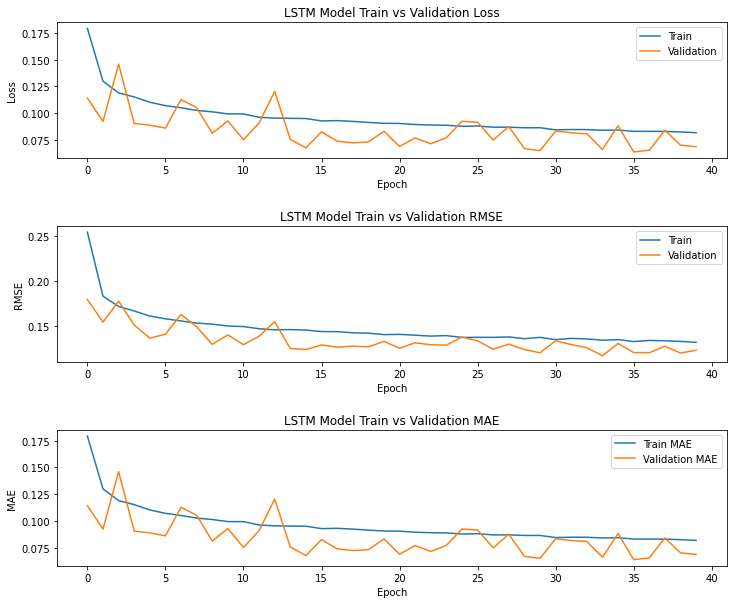

In [ ]:
print(history.history.keys())

print(f"")
y_pred_LSTM = LSTM.predict(X_test_LSTM)
#testPredict = model.predict(y_test)
y_pred_LSTM = y_sc.inverse_transform(y_pred_LSTM)
end = time.time()
metrics (y_test,y_pred_LSTM,'LSTM',5)
#dump(LSTM, 'filename.MLP_stored') 
LSTM.save("LSTM_model")
print(history.history.keys())

#Plot Loss
plt.figure(figsize=(12,10))
plt.subplots_adjust(
                    wspace=0.5,
                    hspace=0.5)
plt.subplot(3,1,1)
plt.plot(history.history['loss'], '-', mfc='none', markersize=10, 
label='Train')
plt.plot(history.history['val_loss'], '-', mfc='none', 
markersize=10, label='Validation')
plt.title('LSTM Model Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#Plot Accuracy
plt.subplot(3,1,2)
plt.plot(history.history['root_mean_squared_error'], '-', mfc='none', markersize=10, 
label='Train')
plt.plot(history.history['val_root_mean_squared_error'], '-', mfc='none', 
markersize=10, label='Validation')
plt.title('LSTM Model Train vs Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

#Plot MAE
plt.subplot(3,1,3)
plt.plot(history.history['mean_absolute_error'], '-', mfc='none', markersize=10, 
label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], '-', mfc='none', 
markersize=10, label='Validation MAE')
plt.title('LSTM Model Train vs Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

In [ ]:
print("Evaluate on test data")
results = LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose = 0)
print('Test loss:', results[0]) 
print('Test accuracy:', results[1])

Evaluate on test data
Test loss: 0.0689009428024292
Test accuracy: 0.0689009428024292


In [ ]:
y_pred_LSTM

array([[1.3655134],
       [1.3468444],
       [1.3094573],
       ...,
       [1.8286208],
       [1.597738 ],
       [1.6096153]], dtype=float32)

In [ ]:
y_test

array([[1.7],
       [1.7],
       [1.5],
       ...,
       [2. ],
       [2. ],
       [1.9]])

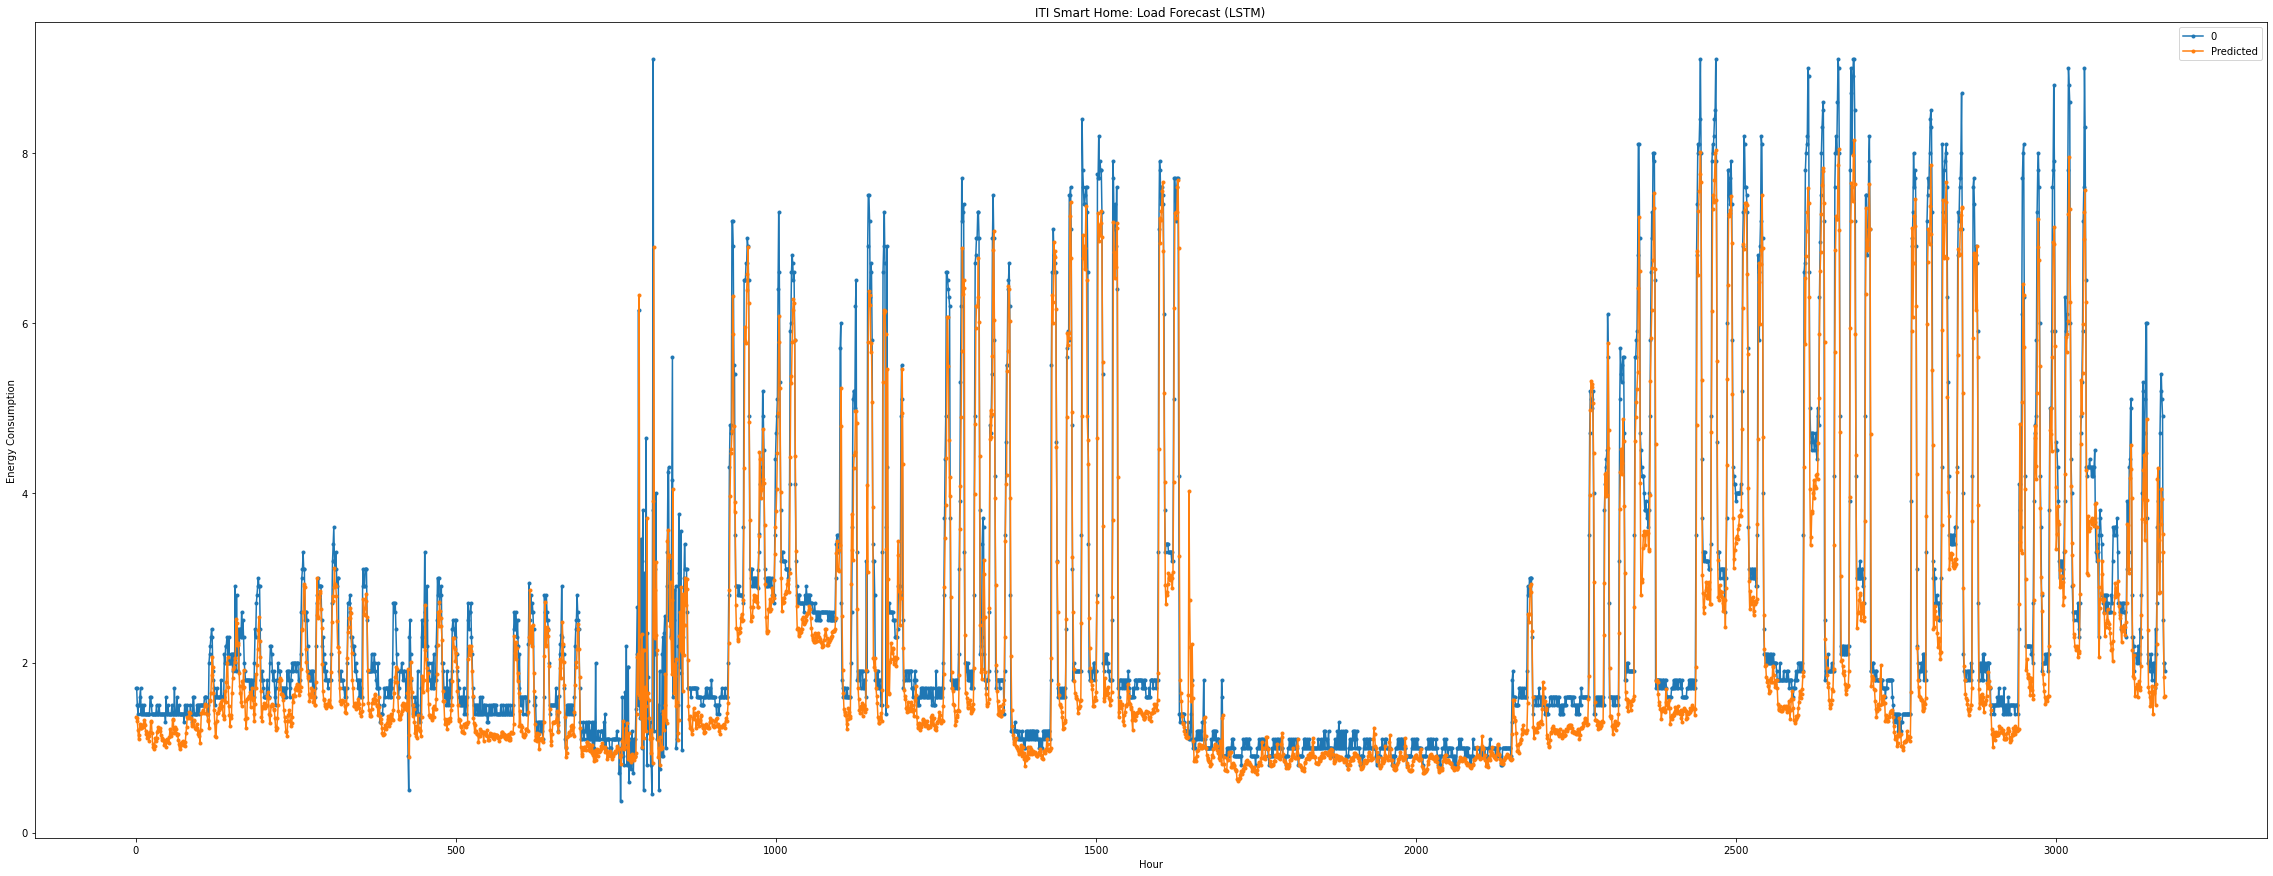

In [ ]:
y_pred_all['LSTM']=(y_pred_LSTM)
y_pred_LSTM_pd=pd.DataFrame(y_pred_LSTM)
y_pred_LSTM_pd.rename(columns = {0:'Predicted'}, inplace = True)
y_test=pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(40, 15))
#y_train.plot(ax=ax, label='y_train', style='.-')
y_test.plot(ax=ax, label='Actual', style='.-')
y_pred_LSTM_pd.plot(ax=ax, label='Predicted', style='.-')
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title('ITI Smart Home: Load Forecast (LSTM)')
plt.legend()

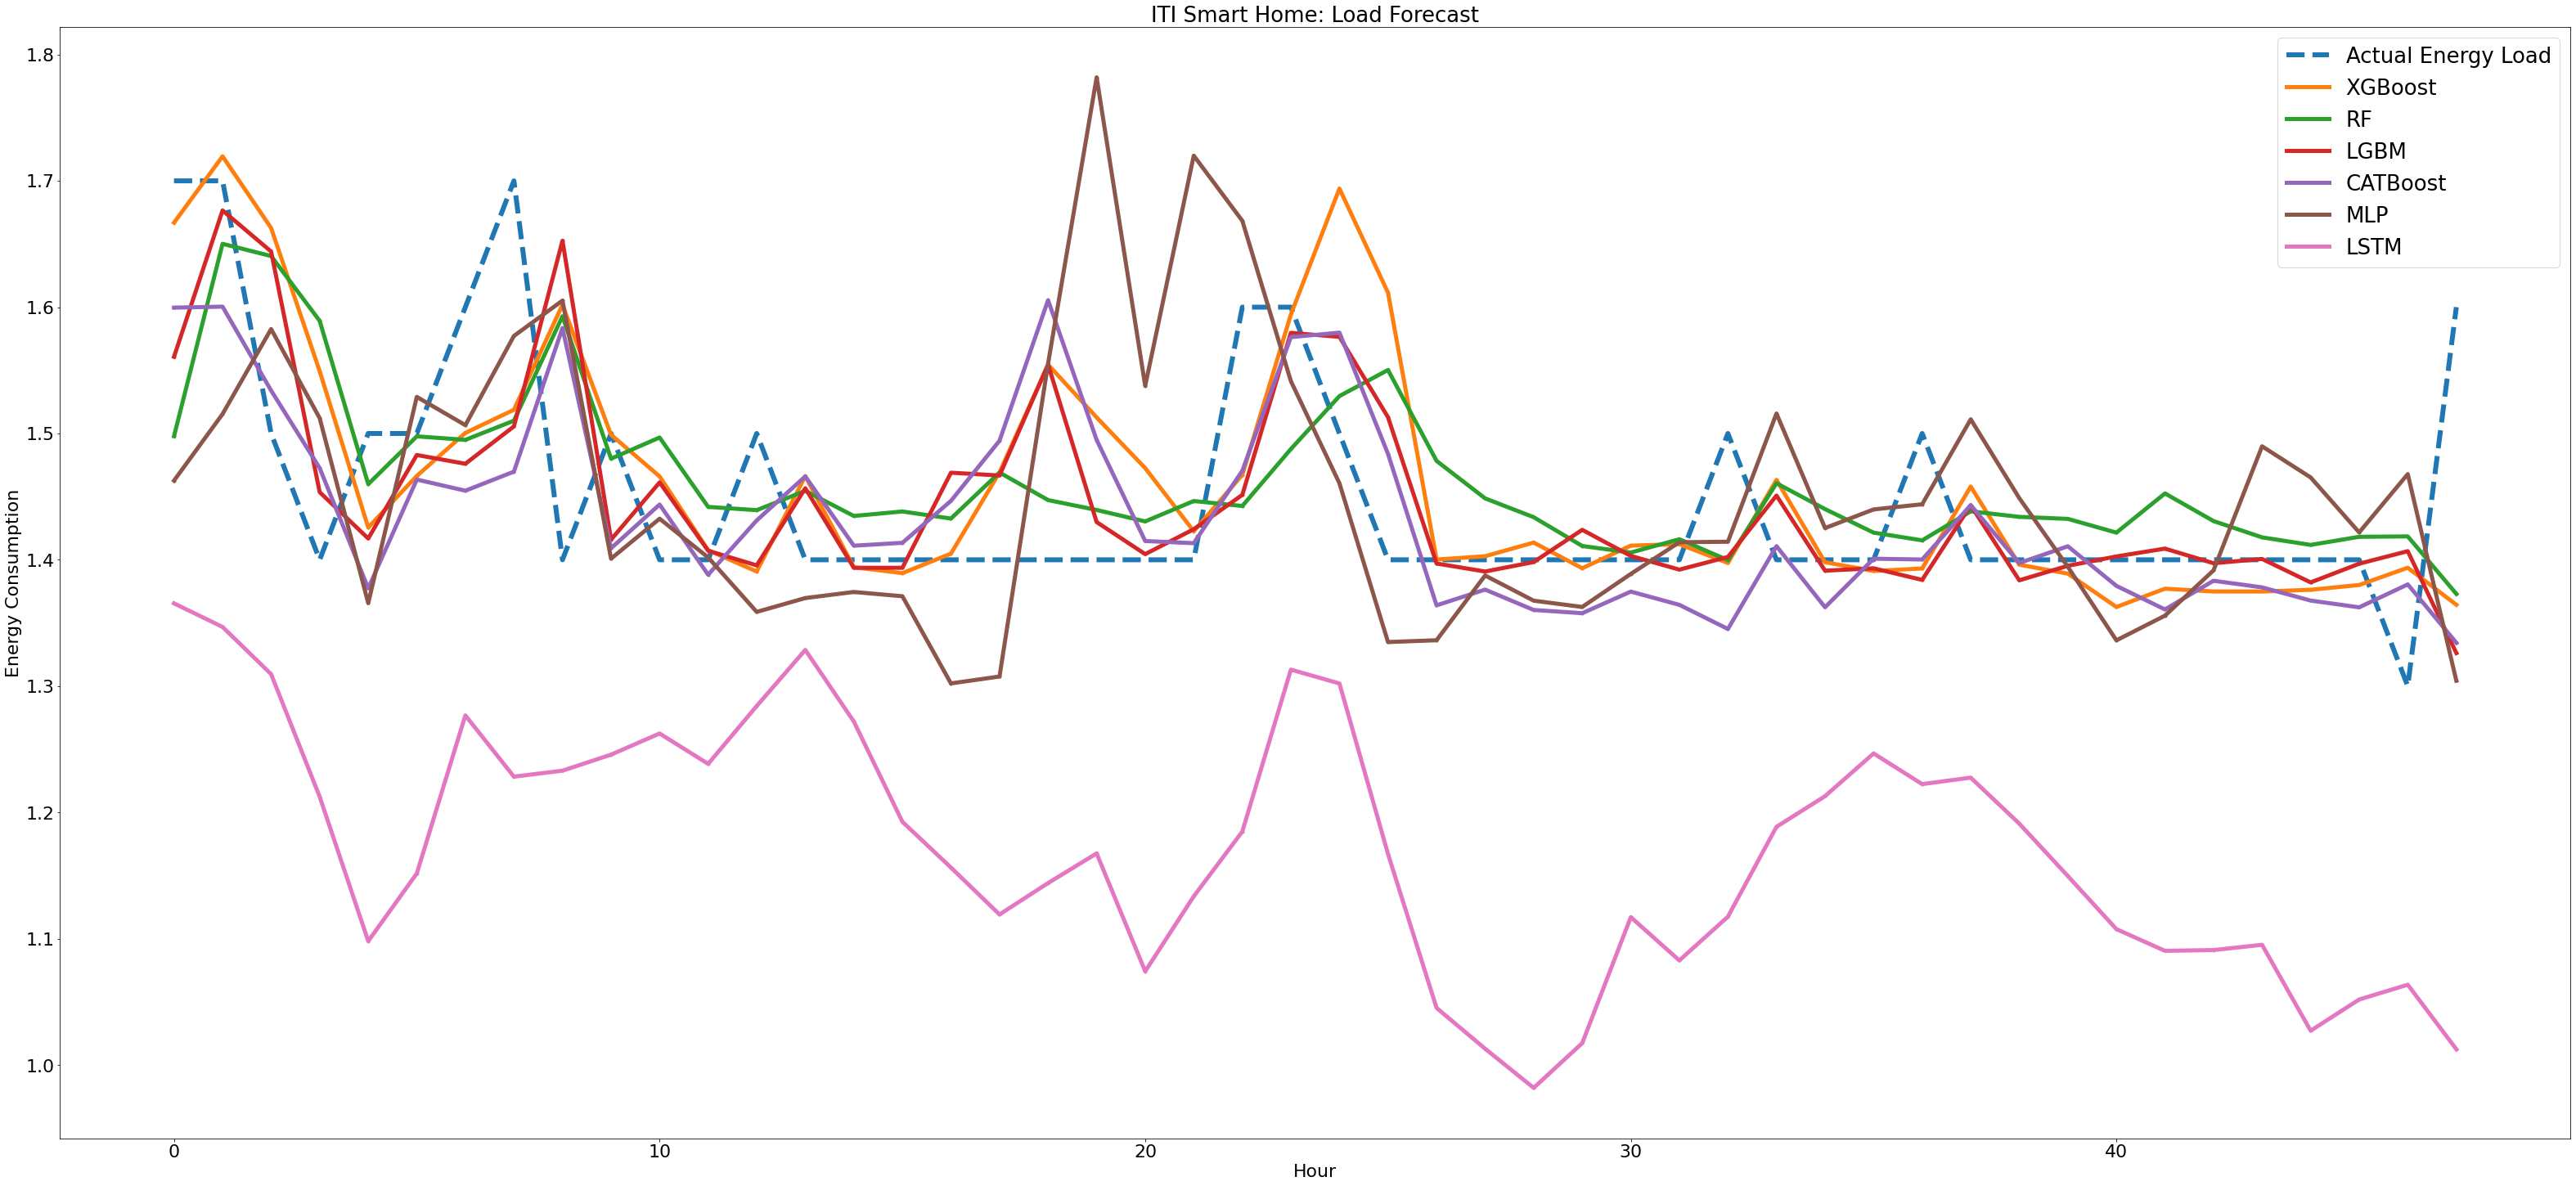

In [ ]:
#y_test.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(55, 25))
y_test=pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)
y_test.rename(columns = {0:'Actual Energy Load'}, inplace = True)
y_test[0:48].plot(ax=ax, label='Actual', style='--',linewidth=6)
y_pred_all['XGBoost'][0:48].plot(ax=ax, label='XGBoost', style='.-',linewidth=5)
y_pred_all['RF'][0:48].plot(ax=ax, label='RF', style='.-',linewidth=5)
y_pred_all['LGBM'][0:48].plot(ax=ax, label='LGBM', style='.-',linewidth=5)
y_pred_all['CATBoost'][0:48].plot(ax=ax, label='CATBoost', style='.-',linewidth=5)
y_pred_all['MLP'][0:48].plot(ax=ax, label='MLP', style='.-',linewidth=5)
y_pred_all['LSTM'][0:48].plot(ax=ax, label='LSTM', style='.-',linewidth=5)
plt.ylabel('Energy Consumption',fontsize = 22)
plt.xlabel('Hour',fontsize = 22)
plt.title('ITI Smart Home: Load Forecast',fontsize = 26)
ax.tick_params(axis='both', which='both', labelsize=22)
plt.legend(prop = {'size' : 26})

C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\1105520382.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


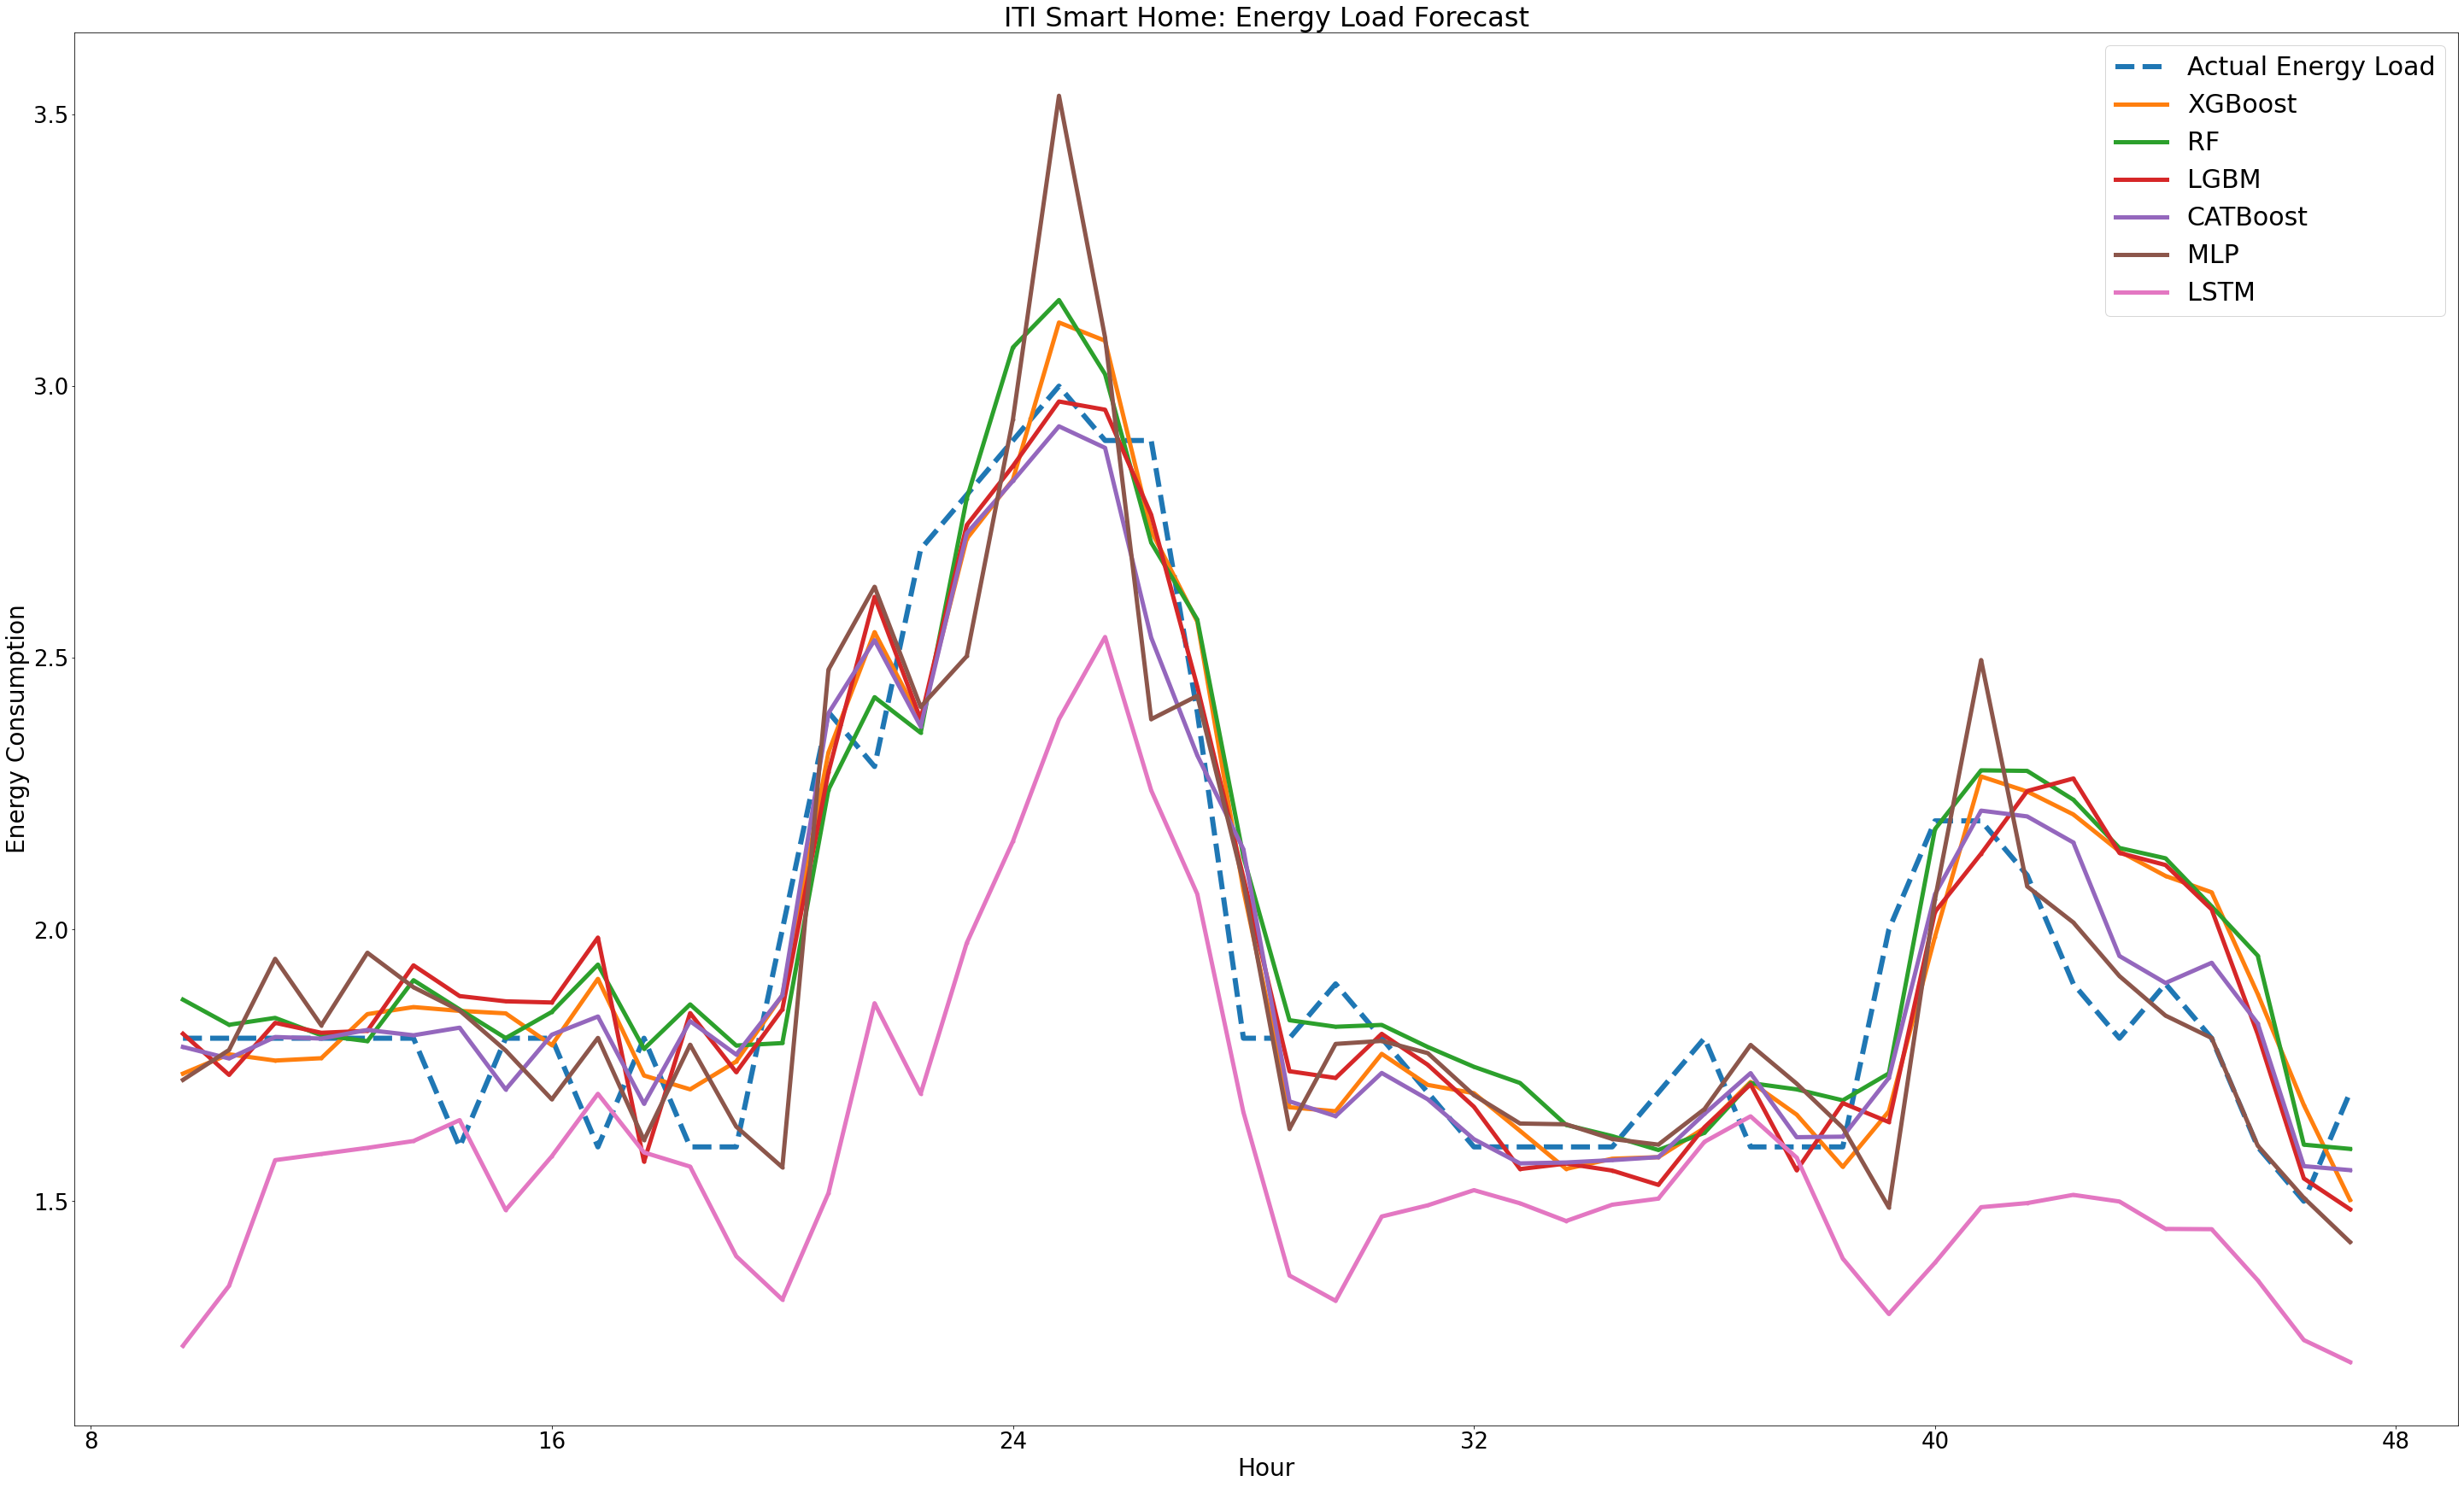

In [ ]:
from matplotlib.ticker import FixedLocator, FixedFormatter
x_formatter = FixedFormatter([
    "0", "8", "16", "24","32", "40", "48"])

fig, ax = plt.subplots(1, 1, figsize=(50, 30))
y_test=pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)
y_test.rename(columns = {0:'Actual Energy Load'}, inplace = True)
y_test[172:220].plot(ax=ax, label='Actual Energy Load', style='--',linewidth=6)
y_pred_all['XGBoost'][172:220].plot(ax=ax, label='XGBoost', style='.-',linewidth=5)
y_pred_all['RF'][172:220].plot(ax=ax, label='RF', style='.-',linewidth=5)
y_pred_all['LGBM'][172:220].plot(ax=ax, label='LGBM', style='.-',linewidth=5)
y_pred_all['CATBoost'][172:220].plot(ax=ax, label='CATBoost', style='.-',linewidth=5)
y_pred_all['MLP'][172:220].plot(ax=ax, label='MLP', style='.-',linewidth=5)
y_pred_all['LSTM'][172:220].plot(ax=ax, label='LSTM', style='.-',linewidth=5)
plt.ylabel('Energy Consumption',fontsize = 28)
plt.xlabel('Hour',fontsize = 28, )
plt.title('ITI Smart Home: Energy Load Forecast',fontsize = 32)
#plt.xticks(range(len(x)), x)
ax.tick_params(axis='both', which='both', labelsize=26)
ax.xaxis.set_major_formatter(x_formatter)
plt.legend(prop = {'size' : 30})

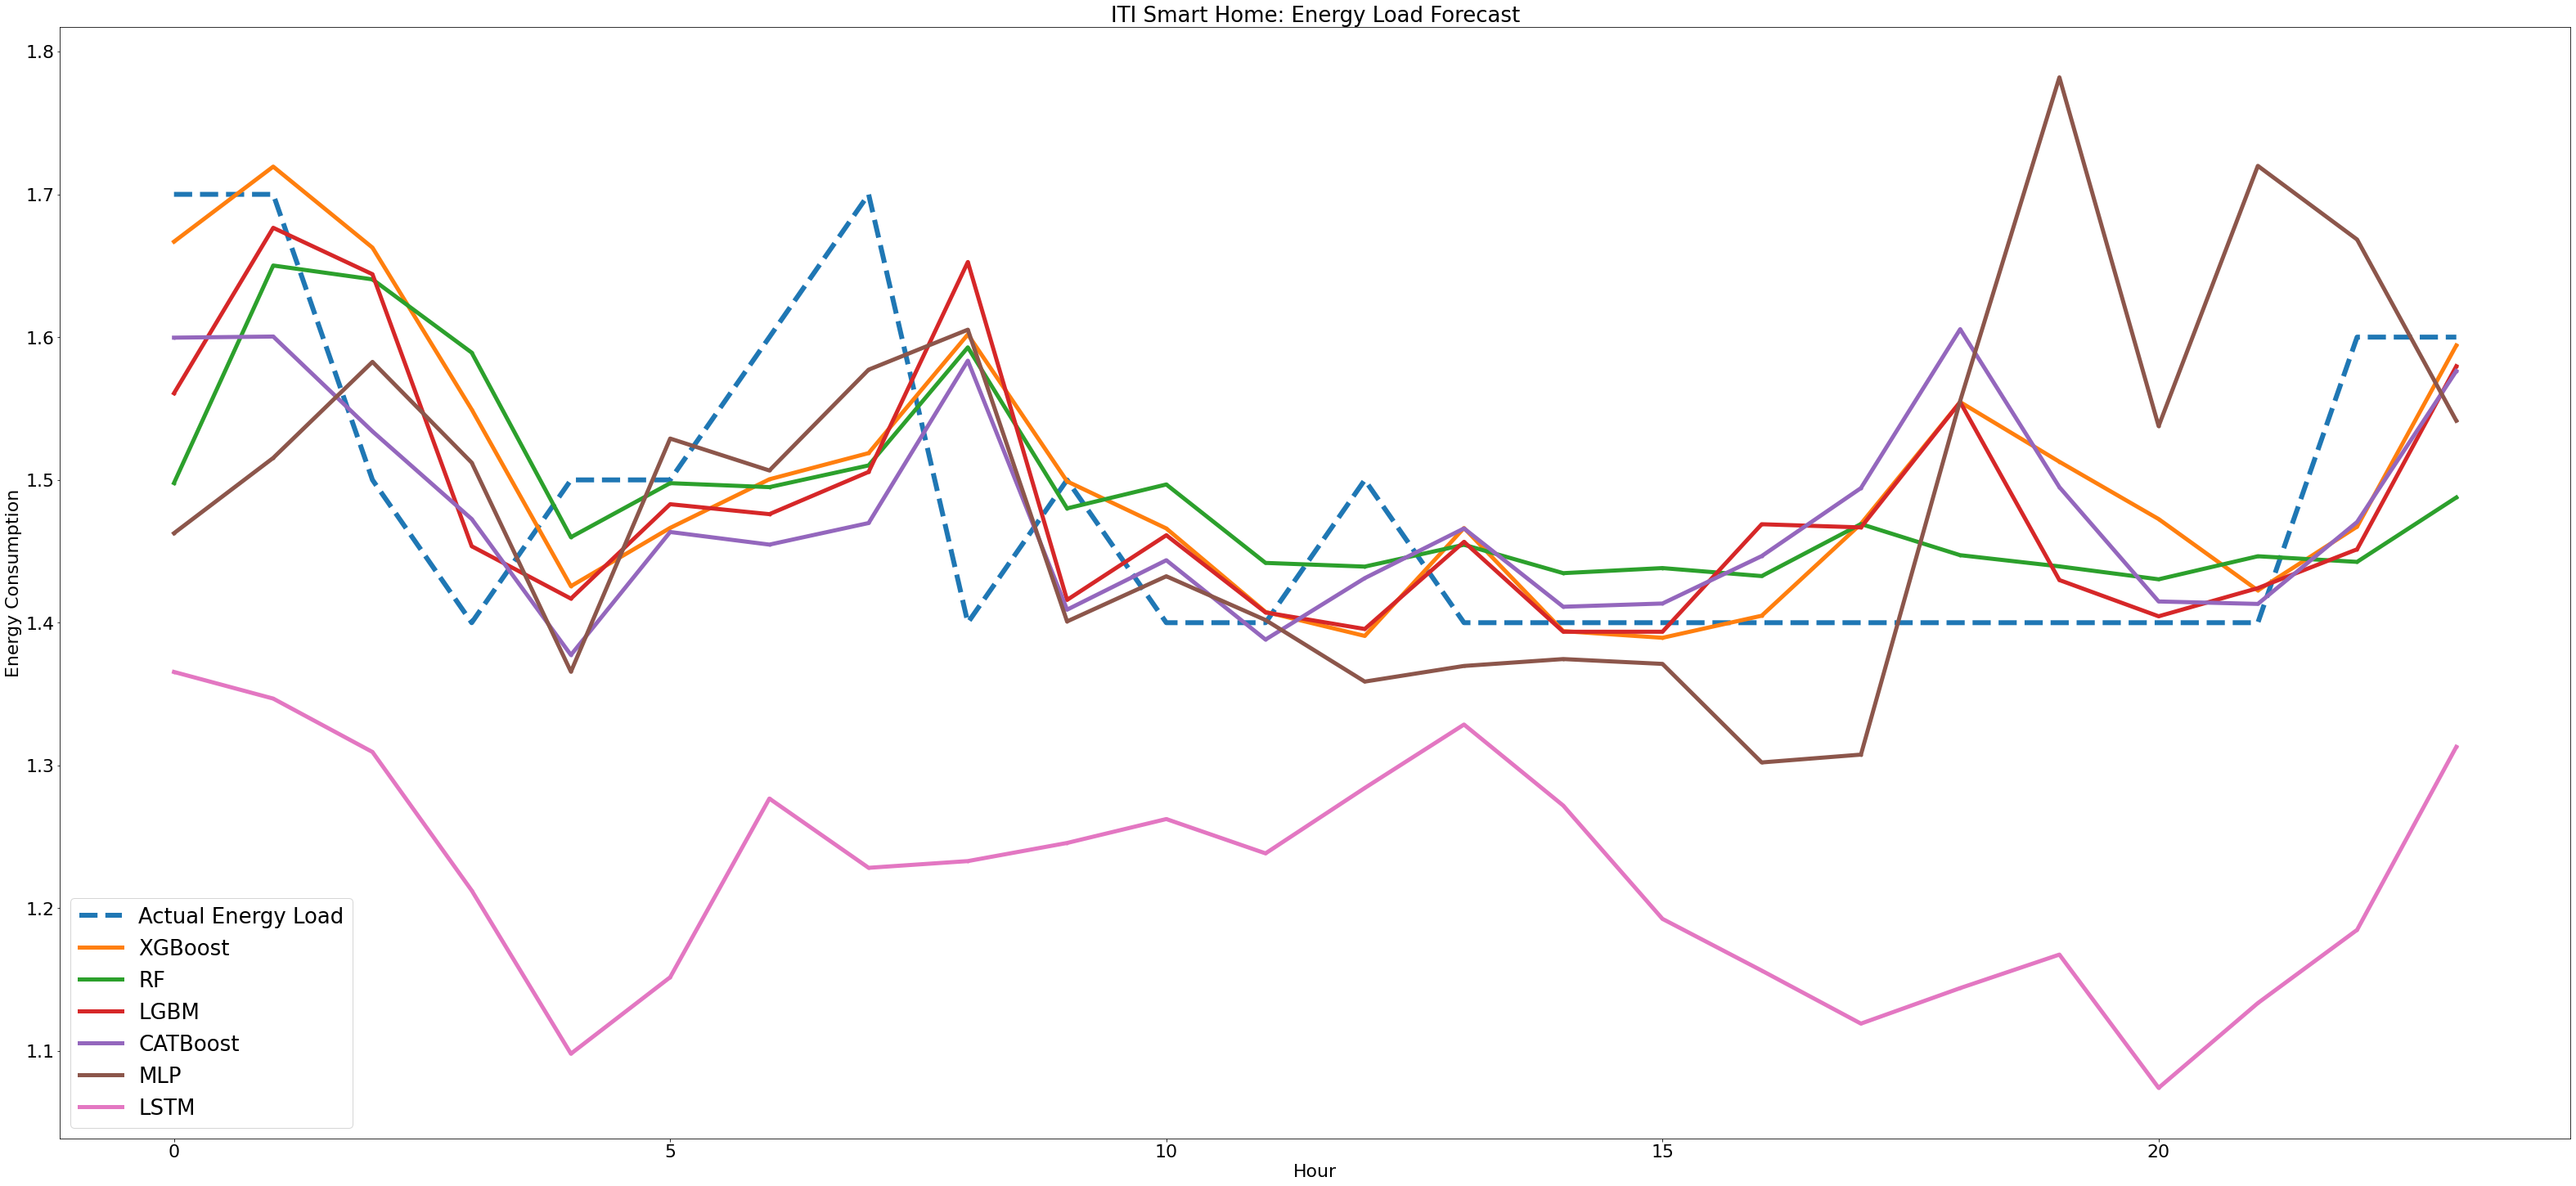

In [ ]:
#y_test.reset_index(drop=True, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(55, 25))
y_test=pd.DataFrame(y_test)
y_test.reset_index(drop=True, inplace=True)
y_test.rename(columns = {0:'Actual'}, inplace = True)
y_test[0:24].plot(ax=ax, label='Actual', style='--',linewidth=6)
y_pred_all['XGBoost'][0:24].plot(ax=ax, label='XGBoost', style='.-',linewidth=5)
y_pred_all['RF'][0:24].plot(ax=ax, label='RF', style='.-',linewidth=5)
y_pred_all['LGBM'][0:24].plot(ax=ax, label='LGBM', style='.-',linewidth=5)
y_pred_all['CATBoost'][0:24].plot(ax=ax, label='CATBoost', style='.-',linewidth=5)
y_pred_all['MLP'][0:24].plot(ax=ax, label='MLP', style='.-',linewidth=5)
y_pred_all['LSTM'][0:24].plot(ax=ax, label='LSTM', style='.-',linewidth=5)
plt.ylabel('Energy Consumption',fontsize = 22)
plt.xlabel('Hour',fontsize = 22)
plt.title('ITI Smart Home: Energy Load Forecast',fontsize = 26)
ax.tick_params(axis='both', which='both', labelsize=22)
plt.legend(prop = {'size' : 26})

In [ ]:
y_pred_all

XGBoost        RF      LGBM  CATBoost       MLP      LSTM
0     1.666854  1.497825  1.560682  1.599628  1.462670  1.365513
1     1.719419  1.650143  1.676560  1.600396  1.515401  1.346844
2     1.662681  1.640458  1.644052  1.533980  1.582650  1.309457
3     1.549331  1.589142  1.453555  1.472621  1.512101  1.212440
4     1.425560  1.459894  1.416852  1.377400  1.365678  1.098123
...        ...       ...       ...       ...       ...       ...
3166  3.485547  3.835539  3.643846  3.910324  2.832056  3.510129
3167  3.526469  3.612452  3.460849  3.589920  2.761715  3.297633
3168  2.237359  2.326783  2.158952  2.310550  2.414422  1.828621
3169  1.925315  1.915603  1.993944  1.895694  1.914385  1.597738
3170  1.938546  1.930307  2.000005  1.941169  1.902372  1.609615

[3171 rows x 6 columns]

In [ ]:
y_test

Actual Energy Load
0                    1.7
1                    1.7
2                    1.5
3                    1.4
4                    1.5
...                  ...
3166                 4.9
3167                 2.5
3168                 2.0
3169                 2.0
3170                 1.9

[3171 rows x 1 columns]

fig = plt.figure(figsize = (25, 10))
plt.scatter(X_test['Temperature_v1'].values, y_test, color = 'red')
plt.scatter(X_test['Temperature_v1'].values, y_pred, color = 'green')
plt.title('LSTM')
plt.xlabel('Temperature_v1')
plt.ylabel('Energy Consumption')
plt.show() 

In [ ]:
X_train_LSTM.shape

(12683, 1, 60)

In [ ]:
y

new_Timestamp_UTC
2018-10-06 21:00:00    2.5
2018-10-06 22:00:00    2.3
2018-10-06 23:00:00    2.3
2018-10-07 00:00:00    2.4
2018-10-07 01:00:00    2.2
                      ... 
2020-09-30 15:00:00    4.9
2020-09-30 16:00:00    2.5
2020-09-30 17:00:00    2.0
2020-09-30 18:00:00    2.0
2020-09-30 19:00:00    1.9
Name: Energy_ConsumptionCons, Length: 15854, dtype: float64

In [ ]:
Nsplits = 5
cv=TimeSeriesSplit(n_splits=Nsplits)
print(cv.split(X_train))

<generator object TimeSeriesSplit.split at 0x0000025D93449C80>


In [ ]:
LSTM_MAE=[]
LSTM_RMSE=[]
LSTM_R2=[]
LSTM_MAPE=[]

def cv_score_LSTM (X,Nsplits,y_train_original,count):
    lstm_hist = pd.DataFrame()
    lstm_best_score=[]
    cv=TimeSeriesSplit(n_splits=Nsplits)
    #cv = KFold(Nsplits)
    fig,ax=plt.subplots(figsize=(10,5))
    for index,(train_ids,test_ids) in  enumerate(cv.split(X)): 
        X_train,X_test=X_LSTM[train_ids],X_LSTM[test_ids]
        y_train,y_test=y_LSTM[train_ids],y_LSTM[test_ids]
        y_test_pred= y_train_original[test_ids]
        #x_test_original  = x_train_original[test_ids]
        #Plot Training and Test indices
        l1=ax.scatter(train_ids,[index]*len(train_ids), c=[plt.cm.coolwarm(.1)], marker='_',lw=6)
        l2=ax.scatter(test_ids,[index]*len(test_ids), c=[plt.cm.coolwarm(.9)],marker='_',lw=6)
        ax.set(ylim=[Nsplits,-1], title='TimeSeriesSplit behavior',xlabel='data index', ylabel='CV iteration')
        ax.legend([l1,l2],['Training','Validation'])

      
      
        start=time.time()
        mchpt = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'lstm_{index}_fold.ckpt',
        save_best_only=False,
        save_weights_only=True
        )
        es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',mode='min', patience=params["es_patience"])

        history=LSTM.fit(
        X_train,
        y_train,
        validation_data=(X_test,y_test),
        epochs=params["epochs"],
        batch_size=params["batch_size"],
        verbose=0,
        validation_split=0.1,
        callbacks=[es_callback,mchpt]
        )
        lstm_hist=lstm_hist.append(history.history,ignore_index=True)
        lstm_best_score.append(mchpt.best)
        
        y_pred_LSTM = LSTM.predict(X_test)
        #testPredict = model.predict(y_test)
        y_pred_LSTM = y_sc.inverse_transform(y_pred_LSTM)
        cv_MAE=np.round((mean_absolute_error(y_test_pred, y_pred_LSTM)),3)
        cv_RMSE=np.round(np.sqrt(mean_squared_error(y_test_pred,y_pred_LSTM)),3)
        cv_R2=np.round(100*r2_score(y_test_pred,y_pred_LSTM),3)
        cv_MAPE=np.round(100*(mean_absolute_percentage_error(y_test_pred, y_pred_LSTM)),3)
        
        print("MAE (kWh):", cv_MAE)
        print("RMSE (kWh):",cv_RMSE)
        print("MAPE (%):",cv_MAPE)  
        print("R-squared (%):",cv_R2)  
        LSTM_MAE.append(cv_MAE)
        LSTM_RMSE.append(cv_RMSE)
        LSTM_MAPE.append(cv_MAPE)
        LSTM_R2.append(cv_R2)
        
    print(f"")    
    print(f"CV mean MAE: {np.mean(LSTM_MAE)} (+/- {np.std(LSTM_MAE)})")
    print(f"CV mean RMSE: {np.mean(LSTM_RMSE)} (+/- {np.std(LSTM_RMSE)})")
    #print("SMAPE (%):", np.round(smape(y_test,y_pred),3))
    #SMAPE.insert(count,np.round(smape(y_test,y_pred),3))
    print(f"CV mean MAPE: {np.mean(LSTM_MAPE)} (+/- {np.std(LSTM_MAPE)})")
    print(f"CV mean R-squared: {np.mean(LSTM_R2)} (+/- {np.std(LSTM_R2)})")

    cv_ΜΑΕ_means.insert(count,np.mean(LSTM_MAE))
    cv_RMSE_means.insert(count,np.mean(LSTM_RMSE))
    cv_R2_means.insert(count,np.mean(LSTM_R2))
    cv_MAPE_means.insert(count,np.mean(LSTM_MAPE))
    
    
    fig,ax = plt.subplots(Nsplits,figsize=(30,20))
    for i in range((Nsplits)):
        sns.lineplot(np.arange(len(lstm_hist['val_loss'][i])),lstm_hist['loss'][i],ax=ax[i],markers=['o-'])
        sns.lineplot(np.arange(len(lstm_hist['val_loss'][i])),lstm_hist['val_loss'][i],ax=ax[i],markers=['o-'])
        ax[i].set_title(f' {i} split LSTM Model Loss')
        ax[i].set_xlabel('epoch')
        ax[i].set_ylabel('Loss')
        ax[i].legend(['Train','Valid'])
    

    end = time.time()
    return



In [ ]:
X_LSTM

array([[[-0.47252747, -0.47252747, -0.47252747, ..., -1.        ,
          1.        ,  0.66666667]],

       [[-0.47252747, -0.47252747, -0.45054945, ..., -1.        ,
          1.        ,  0.66666667]],

       [[-0.47252747, -0.45054945, -0.47252747, ..., -1.        ,
          1.        ,  0.66666667]],

       ...,

       [[-0.53846154, -0.56043956, -0.58241758, ...,  1.        ,
         -1.        , -0.33333333]],

       [[-0.56043956, -0.58241758, -0.56043956, ...,  1.        ,
         -1.        , -0.33333333]],

       [[-0.58241758, -0.56043956, -0.53846154, ..., -1.        ,
          1.        , -0.33333333]]])

83/83 [==============================] - 0s 907us/step


C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\466891949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lstm_hist=lstm_hist.append(history.history,ignore_index=True)


MAE (kWh): 0.296
RMSE (kWh): 0.515
MAPE (%): 13.941
R-squared (%): 85.411
83/83 [==============================] - 0s 792us/step


C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\466891949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lstm_hist=lstm_hist.append(history.history,ignore_index=True)


MAE (kWh): 0.4
RMSE (kWh): 0.679
MAPE (%): 14.19
R-squared (%): 89.353
83/83 [==============================] - 0s 830us/step


C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\466891949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lstm_hist=lstm_hist.append(history.history,ignore_index=True)


MAE (kWh): 0.374
RMSE (kWh): 0.634
MAPE (%): 13.977
R-squared (%): 88.598
83/83 [==============================] - 0s 781us/step


C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\466891949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lstm_hist=lstm_hist.append(history.history,ignore_index=True)


MAE (kWh): 0.423
RMSE (kWh): 0.637
MAPE (%): 15.134
R-squared (%): 81.801
83/83 [==============================] - 0s 793us/step


C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\466891949.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lstm_hist=lstm_hist.append(history.history,ignore_index=True)
c:\ProgramData\Anaconda3\envs\Thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\Thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\Thesis_env\lib\site-pa

MAE (kWh): 0.29
RMSE (kWh): 0.553
MAPE (%): 11.726
R-squared (%): 92.124

CV mean MAE: 0.3566 (+/- 0.05422766821466695)
CV mean RMSE: 0.6035999999999999 (+/- 0.06022491178905952)
CV mean MAPE: 13.793600000000001 (+/- 1.1210831548105606)
CV mean R-squared: 87.4574 (+/- 3.545533449285168)


c:\ProgramData\Anaconda3\envs\Thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\Thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\Thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

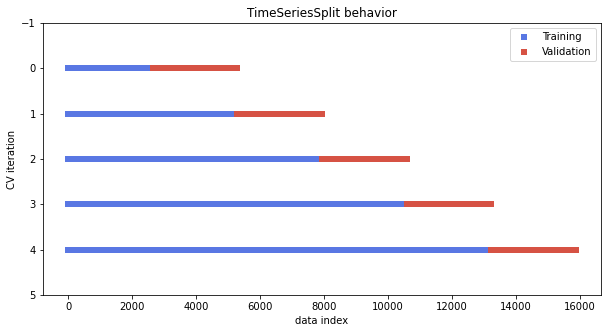

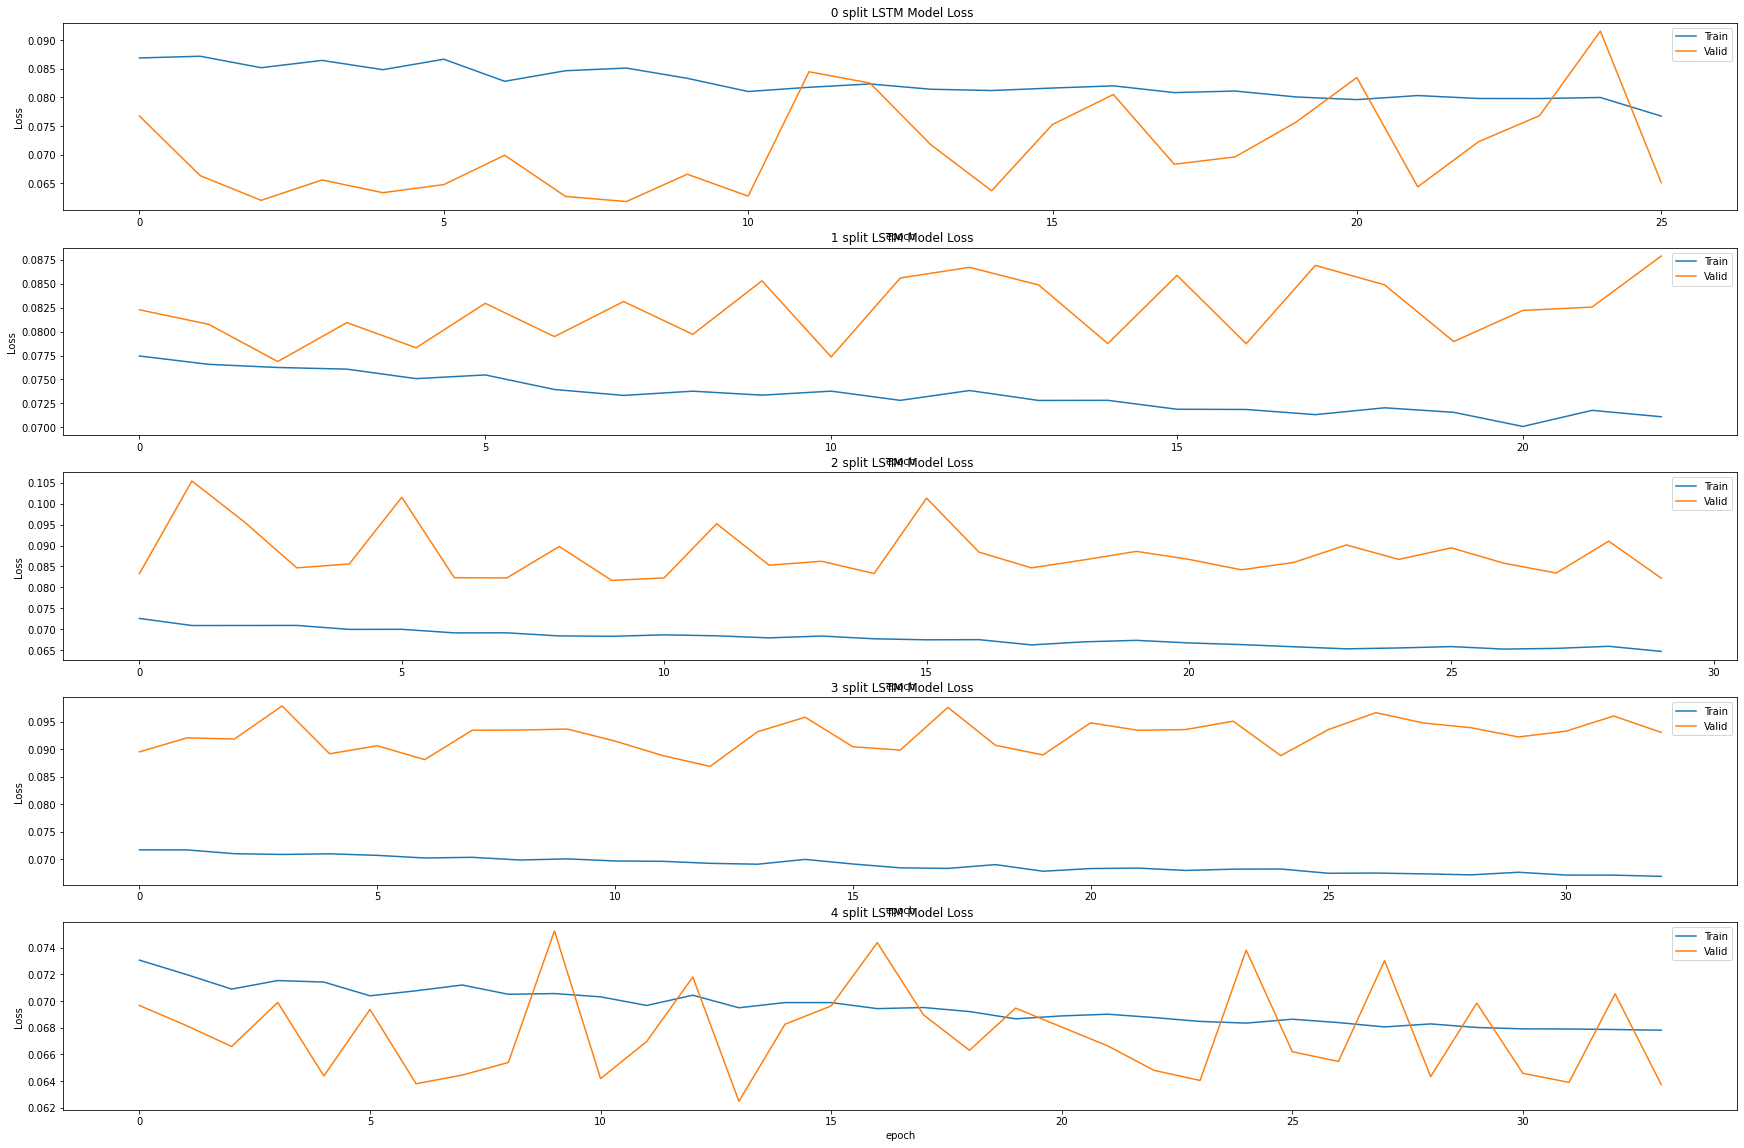

In [ ]:
cv_score_LSTM (X_LSTM,5,y,5)

In [ ]:


Single_metrics = pd.DataFrame({"Model":["XGBoost", "Random Forest", "LGBM","CATBoost","MLP","LSTM"],"MAPE(%)":MAPE,"SMAPE(%)": SMAPE,"MAE(kWh)": MAE,"RMSE(kWh)": RMSE,"R-squared(%)":R_squared,"ET(seconds)":ET})
print(Single_metrics)
Single_metrics.to_csv('D:\Data Science MsC\IHU\MsC Thesis\My Notes\Metrics\Single_metrics.csv')  


           Model  MAPE(%)  SMAPE(%)  MAE(kWh)  RMSE(kWh)  R-squared(%)  \
0        XGBoost   11.543    10.293     0.274      0.522        91.837   
1  Random Forest   11.546    10.295     0.273      0.531        91.573   
2           LGBM   11.606    10.511     0.272      0.509        92.237   
3       CATBoost   10.584     9.757     0.259      0.530        91.587   
4            MLP   12.374    11.202     0.293      0.556        90.754   
5           LSTM   17.850    18.912     0.406      0.608        88.925   

   ET(seconds)  
0        5.770  
1       12.930  
2        0.153  
3        5.194  
4      109.960  
5       17.232  


In [ ]:
Cross_metric= pd.DataFrame({"Model":["XGBoost", "Random Forest", "LGBM","CATBoost","MLP","LSTM"],
                            #"MAPE(%)":cv_ΜΑΕ_means,
                            #"SMAPE(%)": SMAPE,
                            "MAE(kWh)": cv_ΜΑΕ_means,
                            "RMSE(kWh)": cv_RMSE_means,
                            "MAPE(%)":cv_MAPE_means,
                            "R-squared(%)":cv_R2_means,
                            #"ET(seconds)":ET
                            })
Cross_metric
Cross_metric.to_csv('D:\Data Science MsC\IHU\MsC Thesis\My Notes\Metrics\CVMetrics.csv')  

ValueError: All arrays must be of the same length

In [ ]:
Cross_metric

Model  MAE(kWh)  RMSE(kWh)    MAPE(%)  R-squared(%)
0        XGBoost  0.369030   0.627308  14.127756     86.563629
1  Random Forest  0.368960   0.632338  14.328793     86.041741
2           LGBM  0.361555   0.607462  14.139591     87.072526
3       CATBoost  0.353004   0.626757  12.958543     86.519816
4            MLP  0.456003   0.802930  21.865633     69.785875
5           LSTM  0.348800   0.584400  13.492400     87.968600

## Ensemble Methods

In [ ]:
def cv_score_kfold (estimator,X,y,Nsplits,count):
    cv=KFold(n_splits=Nsplits)
    mape_scorer = make_scorer(MAPE_function)

    MAE_cross = (-cross_val_score(estimator, X, y, cv=cv,scoring='neg_mean_absolute_error', n_jobs=1))
    RMSE_cross = (-cross_val_score(estimator, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=1))
    R2_cross = 100*(cross_val_score(estimator, X, y, cv=cv, scoring='r2',n_jobs=1))
    MAPE_cross=(cross_val_score(estimator, X, y, cv=cv, scoring=mape_scorer,n_jobs=1))
    #y_pred = cross_val_predict(estimator, X, y, cv=cv, n_jobs=-1)
    
    cv_ΜΑΕ_means.insert(count,MAE_cross.mean())
    cv_RMSE_means.insert(count,RMSE_cross.mean())
    cv_R2_means.insert(count,R2_cross.mean())
    cv_MAPE_means.insert(count,MAPE_cross.mean())
    
    print(f"MAE: {MAE_cross.mean()} (+/- {MAE_cross.std()})")
    print(f"RMSE: {RMSE_cross.mean()} (+/- {RMSE_cross.std()})")
    print(f"R-squared: {R2_cross.mean()} (+/- {R2_cross.std()})")
    print(f"MAPE: {MAPE_cross.mean()} (+/- {MAPE_cross.std()})")
    return 

In [ ]:
def stacked_model(X_test,y_test):
    import time
    estimators= [ 
    ('LGBM', LGBMRegressor(
    max_depth=10,
    num_leaves=20,
    min_data_in_leaf=70,
    max_bin=90
     
    )),
    ('CATBoost', cb.CatBoostRegressor(
        iterations=1200,
        learning_rate=0.1,
        depth=6,
        l2_leaf_reg=0.6,
        verbose=0,
        loss_function='MAE'
    )),
    ('RF', RandomForestRegressor(
    ))]
        
    XGBoost_stored = load('filename.XGBoost_stored') 
    y_pred_XGB = XGBoost_stored.predict(X_test)

    MLP_stored = load('filename.MLP_stored') 
    y_pred_MLP = MLP_stored.predict(X_test)

    RF_stored = load('filename.RF_stored') 
    y_pred_RF = RF_stored.predict(X_test)

    LGBM_stored = load('filename.LGBM_stored') 
    y_pred_LGBM = LGBM_stored.predict(X_test)

    CATBoost_stored = load('filename.CATBoost_stored') 
    y_pred_CATB = CATBoost_stored.predict(X_test)

    LSTM_stored = tf.keras.models.load_model("LSTM_model")
    X_test_LSTM = X_sc.fit_transform(X_test)
    X_test_LSTM=X_test_LSTM.reshape((X_test_LSTM.shape[0], 1, X_test_LSTM.shape[1]))
    y_pred_LSTM = LSTM_stored.predict(X_test_LSTM)
    y_pred_LSTM = y_sc.inverse_transform(y_pred_LSTM)
        
    x_train_stack = np.column_stack((y_pred_XGB, y_pred_LGBM, y_pred_CATB, y_pred_RF,y_pred_LSTM,y_pred_MLP))

    start=time.time()
    vot_stack = VotingRegressor(estimators=estimators, n_jobs=-1, verbose=0)
    vot_stack.fit(x_train_stack, y_test)
    dump(vot_stack, 'filename.vot_stack_stored') 
    y_pred = vot_stack.predict(x_train_stack)
    end = time.time()
    metrics (y_test,y_pred,'Stacking & Voting Ensemble',7)
    cv_score(vot_stack,x_train_stack,y_test,5,6)
    
    from matplotlib.ticker import MaxNLocator, FixedFormatter
    x_formatter = FixedFormatter(["0","0", "8", "16", "24","32", "40", "48","56","64", "72", "72"])
    nticks = 10
 

    fig, ax = plt.subplots(1, 1, figsize=(50, 30))
    y_pred=pd.DataFrame(y_pred)
    y_pred.rename(columns = {0:'Hybrid Model forecast'}, inplace = True)
    y_test=pd.DataFrame(y_test)
    y_test.rename(columns = {0:'Actual Energy Load'}, inplace = True)
    y_test.reset_index(drop=True, inplace=True)
    #y_test[248:296].plot(ax=ax, label='Actual Energy Load', style='--',linewidth=6)
    y_test[248:321].plot(ax=ax, label='Actual Energy Load', style='--',linewidth=6)
    #y_pred[248:296].plot(ax=ax, label='Model Ensemble', style='.-',linewidth=5)
    y_pred[248:321].plot(ax=ax, label='Model Ensemble', style='.-',linewidth=5)

    plt.ylabel('Energy Consumption (kWh)',fontsize = 28)
    plt.xlabel('Hour',fontsize = 28, )
    plt.title('Energy Load Forecast',fontsize = 32)
    #plt.xticks(range(len(x)), x)
    #ax.set_xticks([0, 8, 16, 24,32, 40, 48])
    ax.xaxis.set_major_locator(MaxNLocator(nticks))
    ax.xaxis.set_major_formatter(x_formatter)
    ax.tick_params(axis='both', which='both', labelsize=26)
    plt.legend(prop = {'size' : 30})
    
    return()

In [ ]:
#Evaluation Metrics
def metrics (y_test,y_pred,model_name,count):
    print(f"Model:{model_name}")
    print("MAPE (%):",np.round(100*(mean_absolute_percentage_error(y_test, y_pred)),3))
    MAPE.insert(count,np.round(100*(mean_absolute_percentage_error(y_test, y_pred)),3))
    print("MAE (kWh):", np.round((mean_absolute_error(y_test, y_pred,)),3))
    MAE.insert(count,np.round((mean_absolute_error(y_test, y_pred,)),3))
    print("RMSE (kWh):",np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3))  
    RMSE.insert(count,np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3))                          
    print("R-squared (%):", np.round(100*r2_score(y_test,y_pred),3))
    R_squared.insert(count,np.round(100*r2_score(y_test,y_pred),3))
    print("ET(seconds):", np.round((end-start),3))
    ET.insert(count,np.round((end-start),3))
    return

100/100 [==============================] - 0s 1ms/step


C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model:Stacking & Voting Ensemble
MAPE (%): 6.121
MAE (kWh): 0.147
RMSE (kWh): 0.303
R-squared (%): 97.248
ET(seconds): 7.592


C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when 

MAE: 0.3873931764933043 (+/- 0.10555791988858043)
RMSE: 0.6944095266631825 (+/- 0.21676644642646734)
R-squared: 80.07532646659132 (+/- 17.560671527159887)
MAPE: 64.1710686536828 (+/- 11.77008121584057)


C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\393045391.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


()

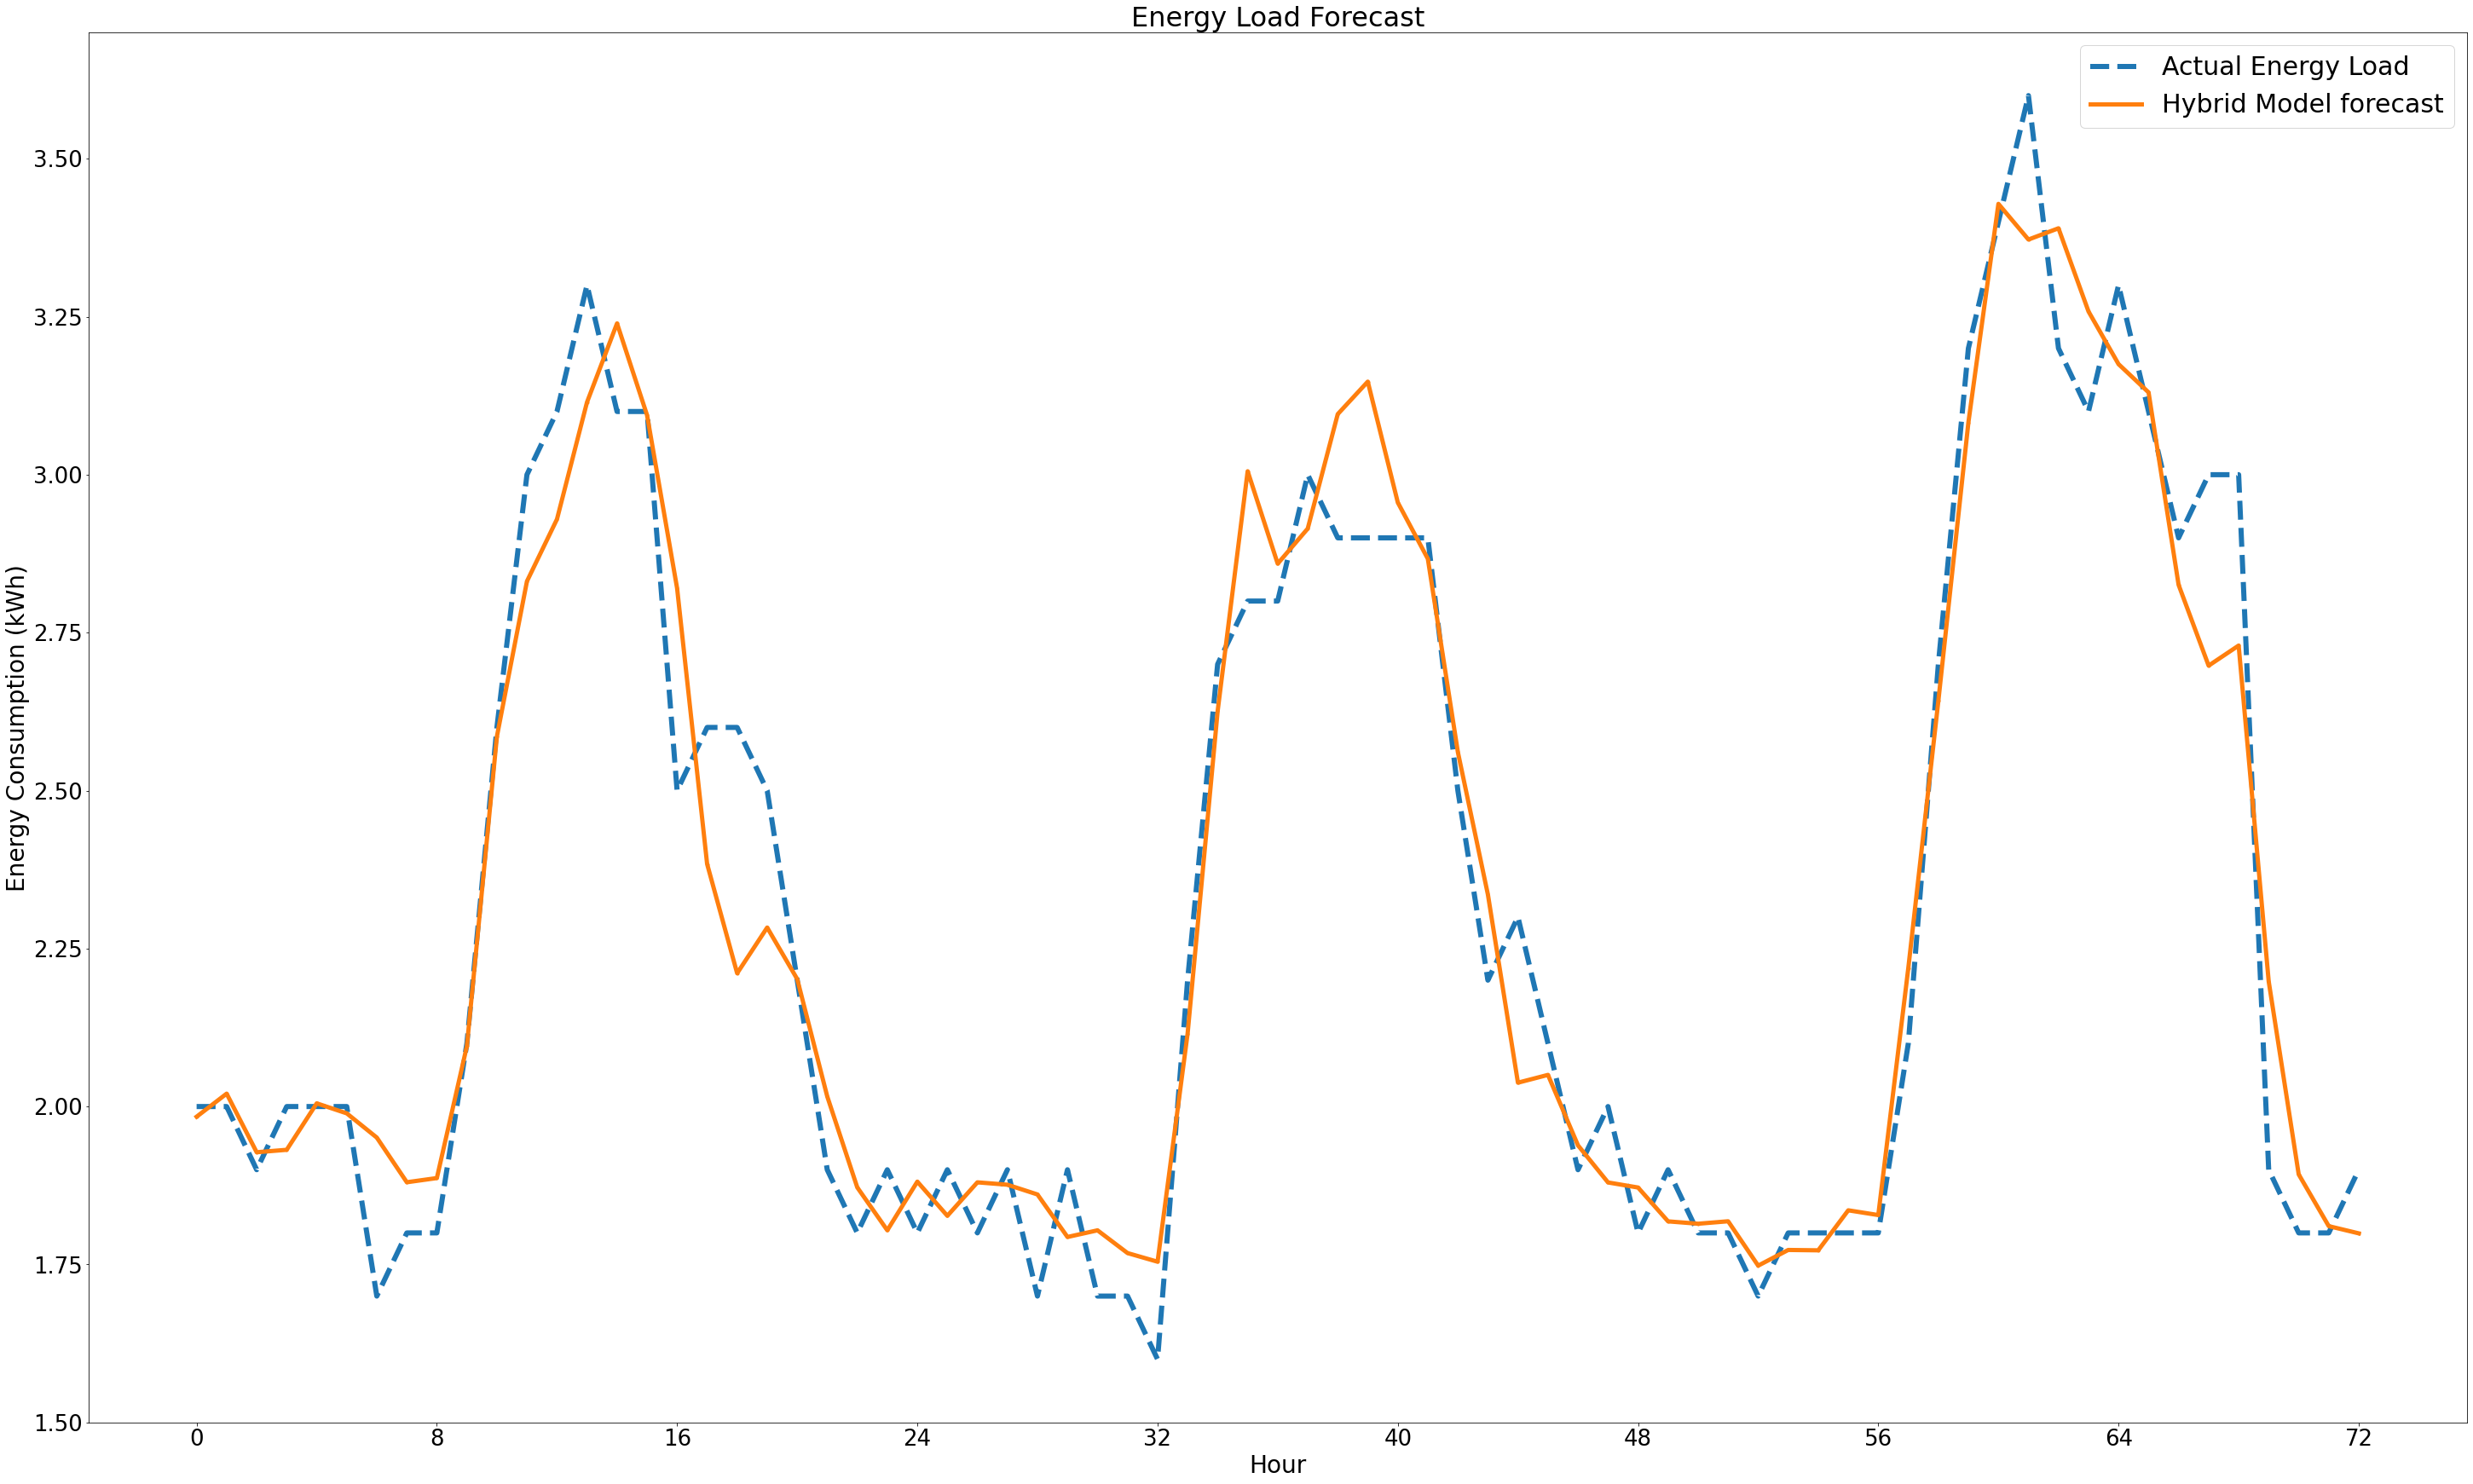

In [ ]:
stacked_model(X_test,y_test)

In [ ]:
df_genome = pd.read_csv("D:/Data Science MsC/IHU/MsC Thesis\My Notes\Other datasets/Bobcat_edu_test.csv")
#df_genome

df_genome[df_genome.isna().any(axis=1)]
df_genome=df_genome.dropna()
df_genome

timestamp  Generation  Consumption  Temperature
0        1/1/2016 0:00        0.37      92.1202        -14.4
1        1/1/2016 1:00        0.39      87.0000        -13.3
2        1/1/2016 2:00        0.39      85.2501        -15.0
3        1/1/2016 3:00        0.38      83.7502        -12.8
4        1/1/2016 4:00        0.39      83.5001        -14.4
...                ...         ...          ...          ...
17520  12/31/2017 0:00        0.36      64.0000         -2.2
17521  12/31/2017 1:00        0.37      63.2500         -3.9
17522  12/31/2017 2:00        0.38      64.2500         -3.9
17523  12/31/2017 3:00        0.35      65.0000         -4.4
17524  12/31/2017 4:00        0.35      58.5001         -4.4

[15777 rows x 4 columns]

In [ ]:
from datetime import datetime
def convert_func(x):
    return datetime.strptime(x, "%m/%d/%Y %H:%M").strftime("%Y-%m-%d %H:%M:%S")

df_genome['timestamp'] = df_genome['timestamp'].astype(str)
df_genome['timestamp'] = df_genome['timestamp'].apply(convert_func)
df_genome['timestamp'] = pd.to_datetime(df_genome['timestamp'], errors='coerce')
df_genome.index=df_genome['timestamp'];df_genome


timestamp  Generation  Consumption  Temperature
timestamp                                                                    
2016-01-01 00:00:00 2016-01-01 00:00:00        0.37      92.1202        -14.4
2016-01-01 01:00:00 2016-01-01 01:00:00        0.39      87.0000        -13.3
2016-01-01 02:00:00 2016-01-01 02:00:00        0.39      85.2501        -15.0
2016-01-01 03:00:00 2016-01-01 03:00:00        0.38      83.7502        -12.8
2016-01-01 04:00:00 2016-01-01 04:00:00        0.39      83.5001        -14.4
...                                 ...         ...          ...          ...
2017-12-31 00:00:00 2017-12-31 00:00:00        0.36      64.0000         -2.2
2017-12-31 01:00:00 2017-12-31 01:00:00        0.37      63.2500         -3.9
2017-12-31 02:00:00 2017-12-31 02:00:00        0.38      64.2500         -3.9
2017-12-31 03:00:00 2017-12-31 03:00:00        0.35      65.0000         -4.4
2017-12-31 04:00:00 2017-12-31 04:00:00        0.35      58.5001         -4.4

[15777 rows x 4 columns]

In [ ]:
df_genome['Hour'] = np.arange(len(df_genome))
df_genome.isna().any(axis=1)
df_genome

timestamp  Generation  Consumption  Temperature  \
timestamp                                                                       
2016-01-01 00:00:00 2016-01-01 00:00:00        0.37      92.1202        -14.4   
2016-01-01 01:00:00 2016-01-01 01:00:00        0.39      87.0000        -13.3   
2016-01-01 02:00:00 2016-01-01 02:00:00        0.39      85.2501        -15.0   
2016-01-01 03:00:00 2016-01-01 03:00:00        0.38      83.7502        -12.8   
2016-01-01 04:00:00 2016-01-01 04:00:00        0.39      83.5001        -14.4   
...                                 ...         ...          ...          ...   
2017-12-31 00:00:00 2017-12-31 00:00:00        0.36      64.0000         -2.2   
2017-12-31 01:00:00 2017-12-31 01:00:00        0.37      63.2500         -3.9   
2017-12-31 02:00:00 2017-12-31 02:00:00        0.38      64.2500         -3.9   
2017-12-31 03:00:00 2017-12-31 03:00:00        0.35      65.0000         -4.4   
2017-12-31 04:00:00 2017-12-31 04:00:00        0.35      58.5001         -4.4   

                      Hour  
timestamp                   
2016-01-01 00:00:00      0  
2016-01-01 01:00:00      1  
2016-01-01 02:00:00      2  
2016-01-01 03:00:00      3  
2016-01-01 04:00:00      4  
...                    ...  
2017-12-31 00:00:00  15772  
2017-12-31 01:00:00  15773  
2017-12-31 02:00:00  15774  
2017-12-31 03:00:00  15775  
2017-12-31 04:00:00  15776  

[15777 rows x 5 columns]

In [ ]:
df_genome['Consumption'].mean()

120.89778128921725

In [ ]:
df_temp=((df_genome['timestamp']) < ('2016-12-31 00:00:00'))
df_genome=df_genome.loc[df_temp]
df_genome

timestamp  Generation  Consumption  Temperature  \
timestamp                                                                       
2016-01-01 00:00:00 2016-01-01 00:00:00        0.37      92.1202        -14.4   
2016-01-01 01:00:00 2016-01-01 01:00:00        0.39      87.0000        -13.3   
2016-01-01 02:00:00 2016-01-01 02:00:00        0.39      85.2501        -15.0   
2016-01-01 03:00:00 2016-01-01 03:00:00        0.38      83.7502        -12.8   
2016-01-01 04:00:00 2016-01-01 04:00:00        0.39      83.5001        -14.4   
...                                 ...         ...          ...          ...   
2016-12-30 19:00:00 2016-12-30 19:00:00        0.00      97.5000         -6.1   
2016-12-30 20:00:00 2016-12-30 20:00:00        0.00      99.5000         -6.1   
2016-12-30 21:00:00 2016-12-30 21:00:00        0.00      71.5000         -5.6   
2016-12-30 22:00:00 2016-12-30 22:00:00        0.00      73.5000         -5.6   
2016-12-30 23:00:00 2016-12-30 23:00:00        0.00      66.5000         -6.7   

                     Hour  
timestamp                  
2016-01-01 00:00:00     0  
2016-01-01 01:00:00     1  
2016-01-01 02:00:00     2  
2016-01-01 03:00:00     3  
2016-01-01 04:00:00     4  
...                   ...  
2016-12-30 19:00:00  8178  
2016-12-30 20:00:00  8179  
2016-12-30 21:00:00  8180  
2016-12-30 22:00:00  8181  
2016-12-30 23:00:00  8182  

[8183 rows x 5 columns]

In [ ]:
df_genome.describe().T

count         mean          std   min        25%        50%  \
Generation   8183.0     2.993474     4.745176   0.0     0.3500     0.3800   
Consumption  8183.0   125.059231    43.328167   0.0    80.0001   124.0001   
Temperature  8183.0    11.236221    11.088635 -16.7     2.2000    10.6000   
Hour         8183.0  4091.000000  2362.372960   0.0  2045.5000  4091.0000   

                   75%      max  
Generation      3.9350    16.20  
Consumption   161.5001   288.75  
Temperature    19.4000    37.20  
Hour         6136.5000  8182.00

In [ ]:
df_cons_weh.describe().T

count         mean          std        min       25%  \
Temperature_v1        15927.0    17.212629     8.423852  -3.900000    10.400   
Relative_Humidity_v1  15927.0    64.592730    15.966516  19.500000    52.500   
Wind_Speed_v1         15927.0     4.181051     3.126717   0.385661     2.412   
Clouds_v1             15927.0    43.154182    40.313795   0.000000     0.250   
Energy_Consumption    15927.0     2.664749     1.857291   0.000000     1.300   
Energy_Generation     15927.0     1.617862     2.520233   0.000000     0.000   
Hour                  15927.0  7963.000000  4597.873204   0.000000  3981.500   

                              50%          75%           max  
Temperature_v1          16.825000     23.87500     38.050000  
Relative_Humidity_v1    64.500000     77.25000    100.000000  
Wind_Speed_v1            3.600000      4.82400     36.444104  
Clouds_v1               31.253731     90.00000    100.000000  
Energy_Consumption       2.100000      3.50000      9.100000  
Energy_Generation        0.005500      2.61775      9.536250  
Hour                  7963.000000  11944.50000  15926.000000

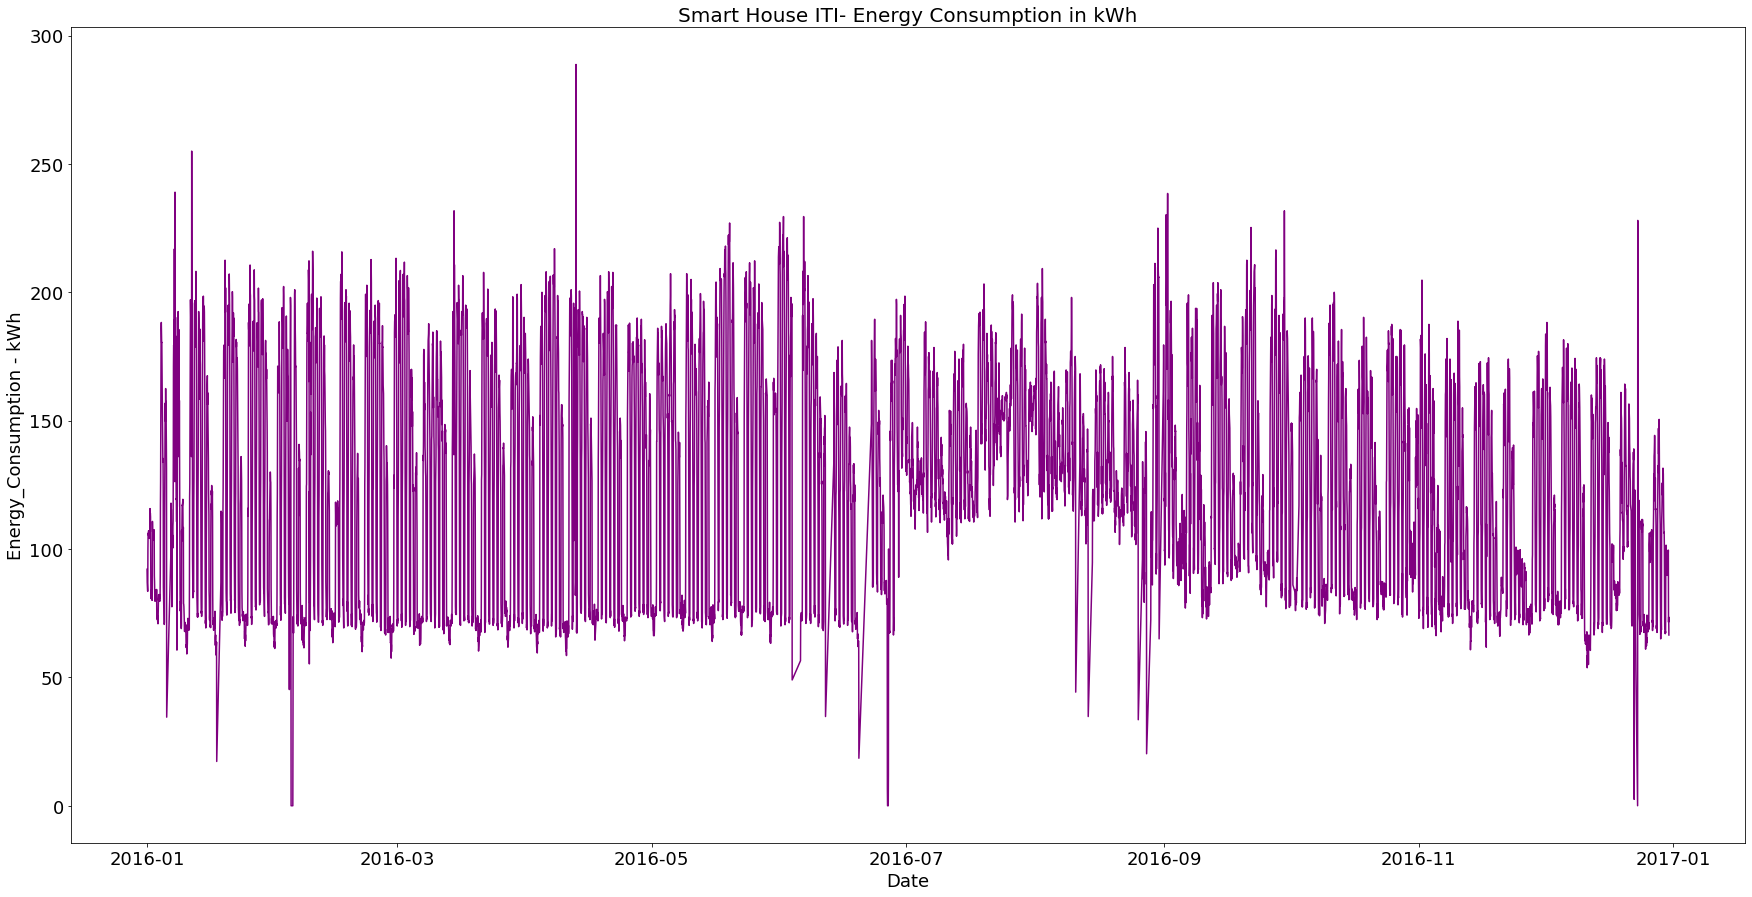

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
# Add x-axis and y-axis
ax.plot(df_genome['timestamp'],
       df_genome['Consumption'],
       color='purple')
# Set title and labels for axes
ax.set_title("Smart House ITI- Energy Consumption in kWh", fontsize = 20)
ax.set_xlabel('Date', fontsize = 18)
ax.set_ylabel('Energy_Consumption - kWh', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [ ]:
UpperOutlierPerc=99.98
upper_cons = np.percentile(df_genome['Consumption'], UpperOutlierPerc); upper_cons
df_genome['Consumption'] = df_genome['Consumption'].apply(lambda x : upper_cons if x > upper_cons else x)
df_genome=df_genome[df_genome['Consumption']>40]

C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\1554646107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genome['Consumption'] = df_genome['Consumption'].apply(lambda x : upper_cons if x > upper_cons else x)


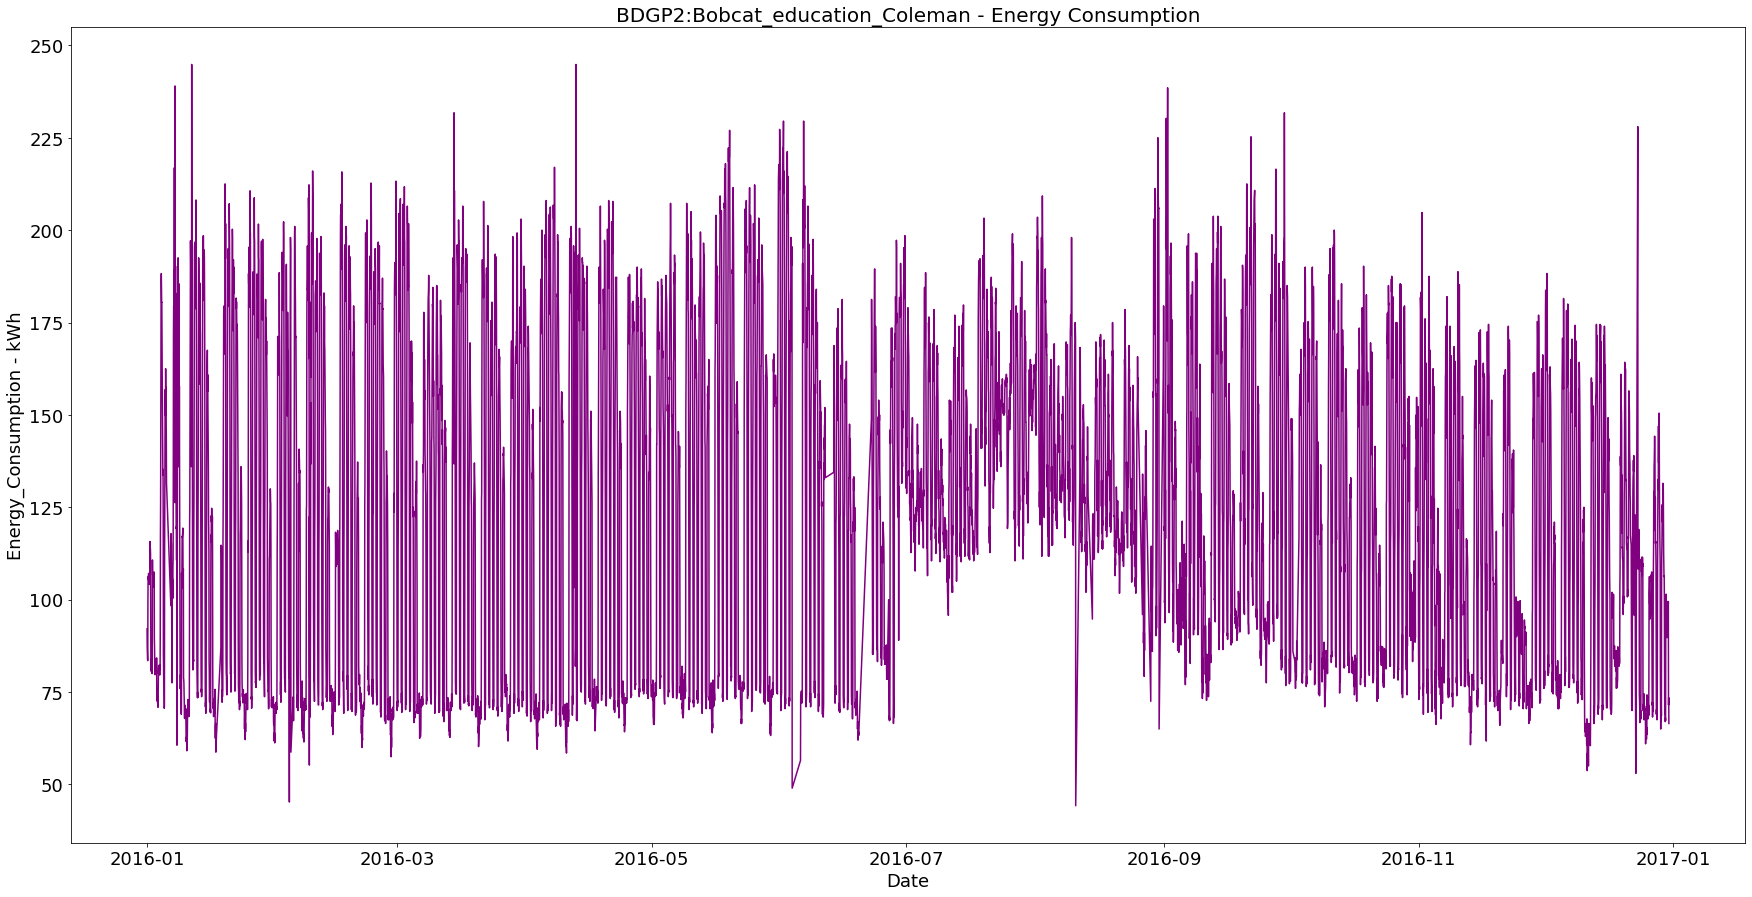

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15))
# Add x-axis and y-axis
ax.plot(df_genome['timestamp'],
       df_genome['Consumption'],
       color='purple')
# Set title and labels for axes
ax.set_title("BDGP2:Bobcat_education_Coleman - Energy Consumption", fontsize = 20)
ax.set_xlabel('Date', fontsize = 18)
ax.set_ylabel('Energy_Consumption - kWh', fontsize = 18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()

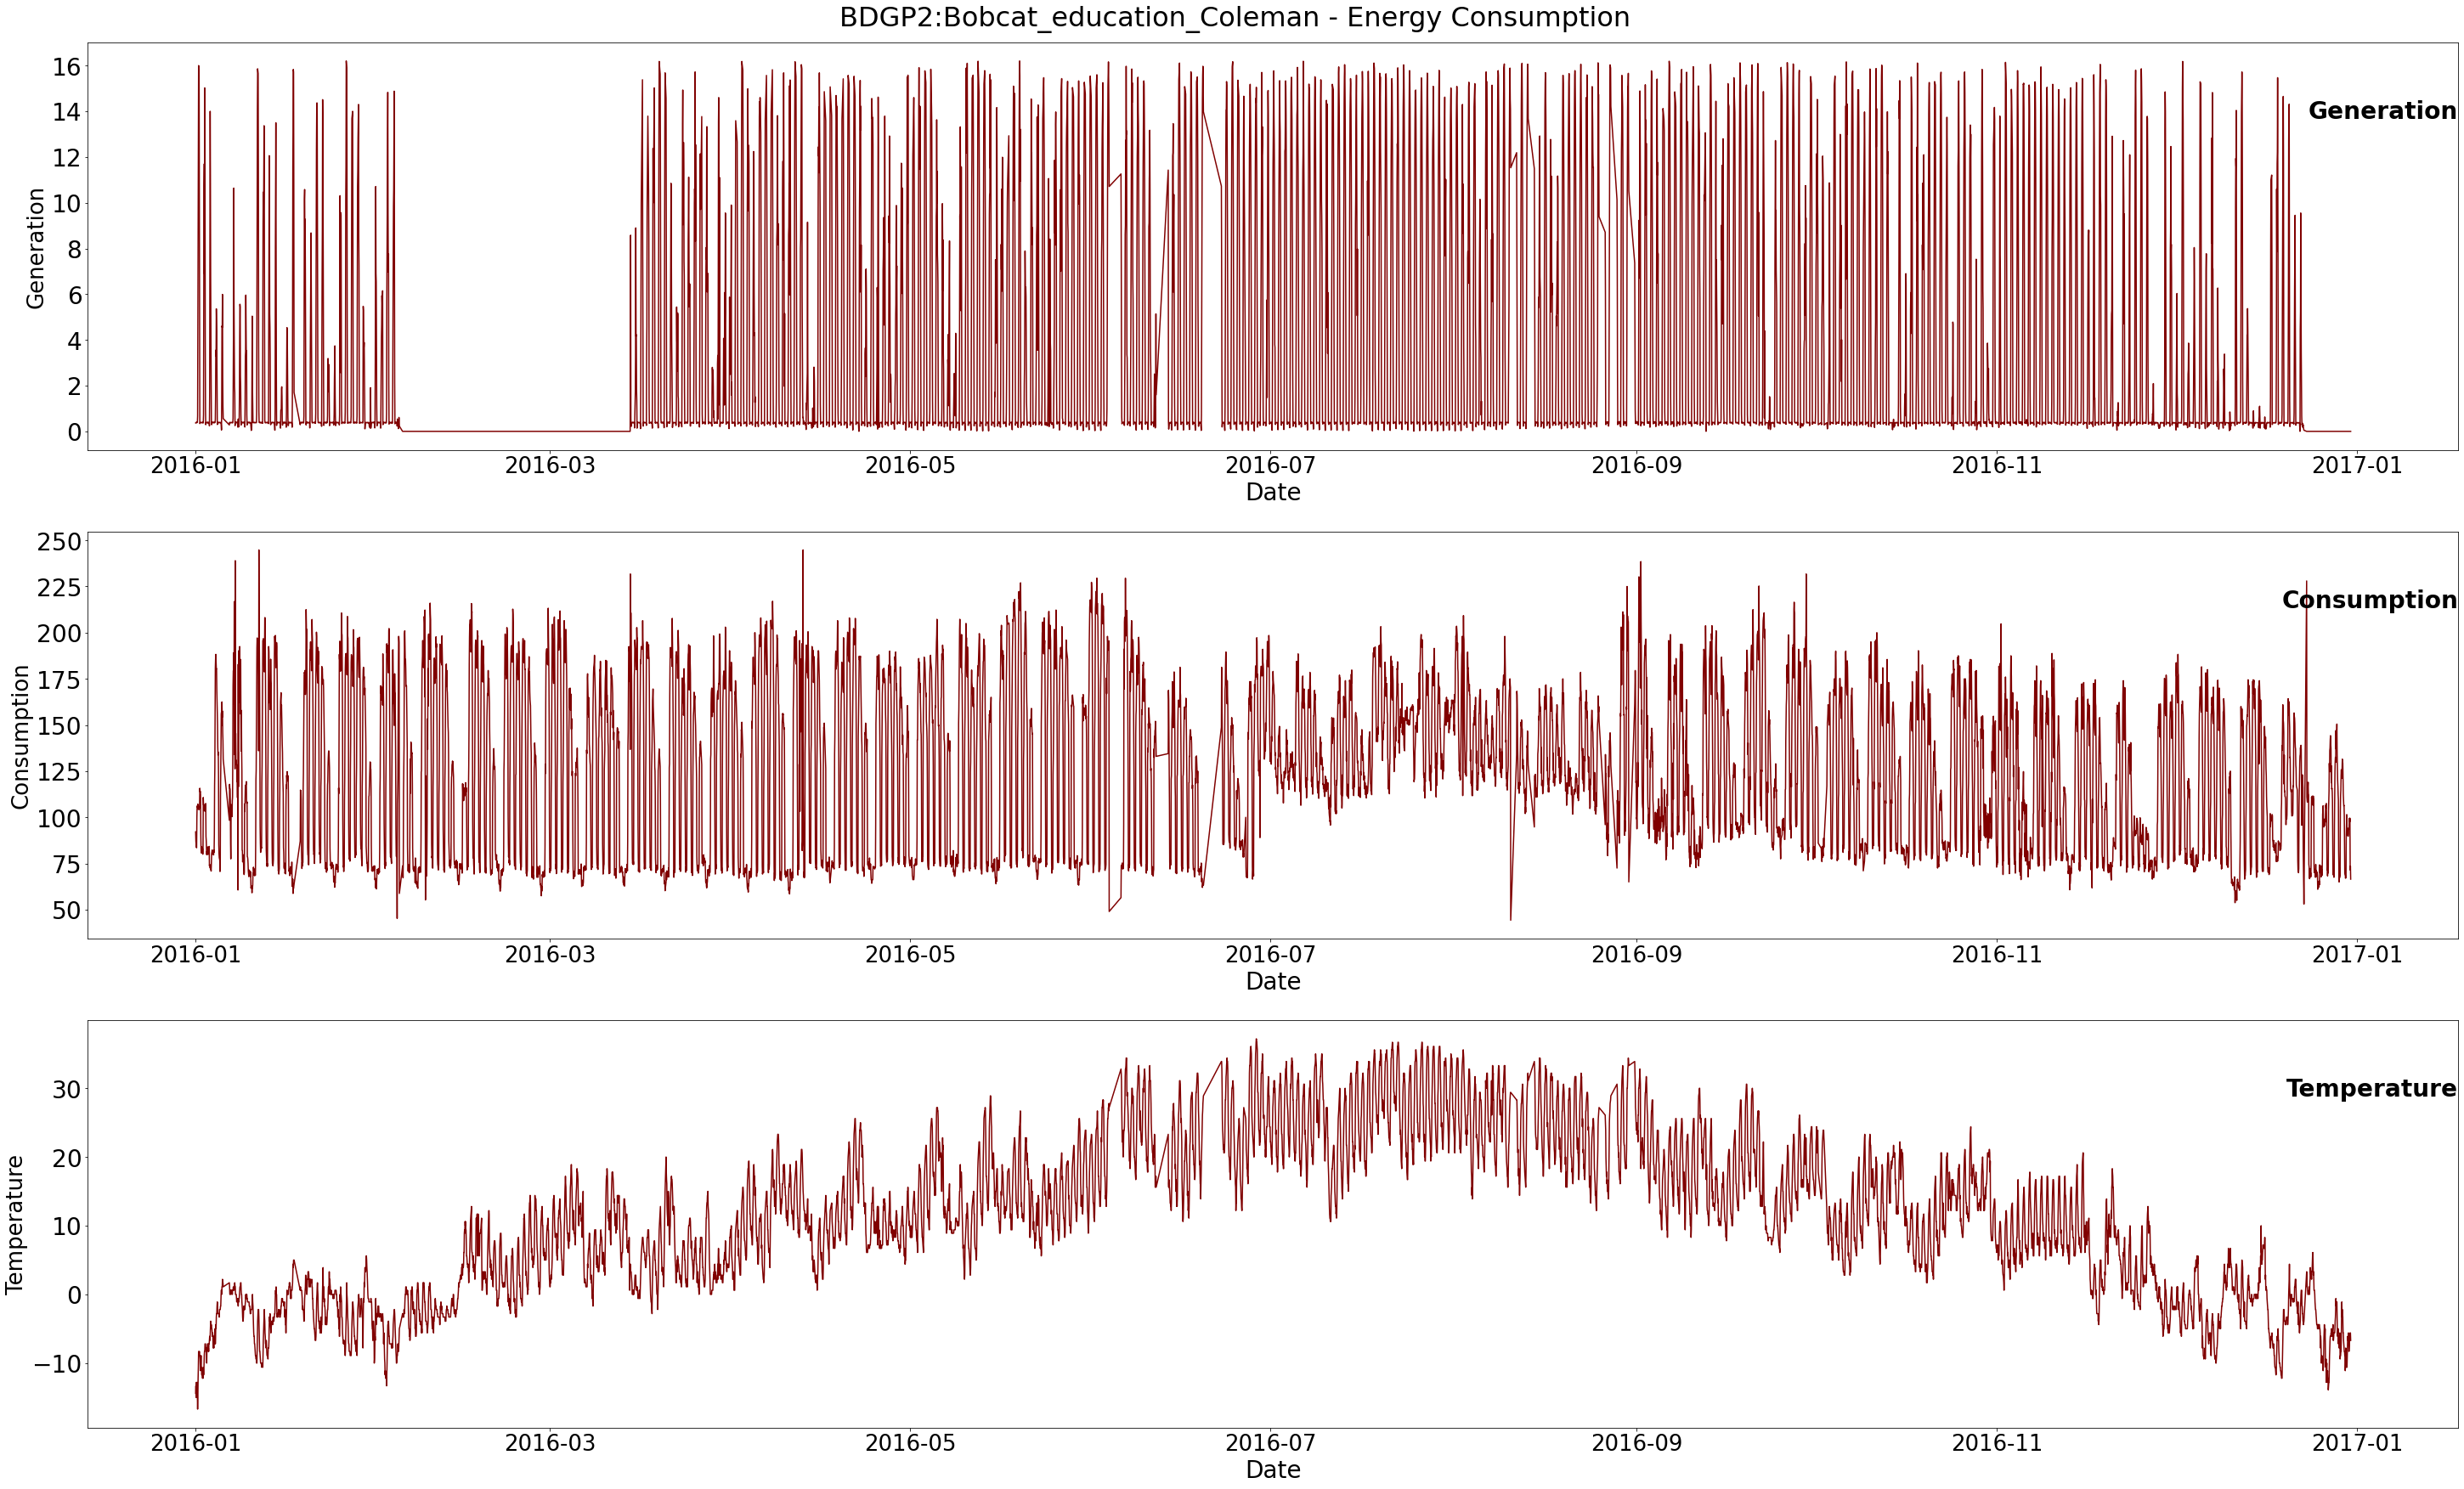

In [ ]:
# plot target and each feature
groups = [1, 2, 3]
i = 1
plt.figure(figsize = (50, 30))
for group in groups:
    plt.suptitle('BDGP2:Bobcat_education_Coleman - Energy Consumption', fontsize=32,y=0.9)
    plt.subplot(len(groups), 1, i)
    plt.plot(df_genome['timestamp'],df_genome.values[:, group], color='maroon')
    plt.title(df_genome.columns[group], y=0.8, loc='right',fontsize=28,fontweight='bold')
    plt.xlabel('Date', fontsize=28)
    plt.ylabel(df_genome.columns[group],fontsize=26)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=28)
    i += 1
plt.show()

In [ ]:
#Creating time-related features
quarter=df_genome.timestamp.dt.quarter
months = df_genome.timestamp.dt.month
day_of_months = df_genome.timestamp.dt.day
hours = df_genome.timestamp.dt.hour
minutes = df_genome.timestamp.dt.minute
to_one_hot = df_genome.timestamp.dt.day_name()
#days = pd.get_dummies(to_one_hot)
#days=days.drop(['Saturday','Sunday'],axis='columns')
week_days= df_genome.timestamp.dt.weekday
is_weekend = to_one_hot.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0)
#Define work hours & off-hours
working_hours=((hours <= 18) & (hours >= 9)).apply(lambda x : 1 if x==True else 0)
off_hours=((hours > 18) | (hours < 9)).apply(lambda x : 1 if x==True else 0)

timestamp_features_new = pd.DataFrame({
    'quarter': quarter,
    'month' : months,
    'day_of_month' : day_of_months,
    'hour24' : hours,
    'is_weekend' : is_weekend,
    #'is_holiday': is_holiday,
    'working_hours': working_hours,
    'off_hours': off_hours,
    #'ITI_closed':ITI_closed,
    'Week_day':week_days
})
#timestamp_features= pd.concat([timestamp_features,days] , axis = 1);
timestamp_features_new

quarter  month  day_of_month  hour24  is_weekend  \
timestamp                                                               
2016-01-01 00:00:00        1      1             1       0           0   
2016-01-01 01:00:00        1      1             1       1           0   
2016-01-01 02:00:00        1      1             1       2           0   
2016-01-01 03:00:00        1      1             1       3           0   
2016-01-01 04:00:00        1      1             1       4           0   
...                      ...    ...           ...     ...         ...   
2016-12-30 19:00:00        4     12            30      19           0   
2016-12-30 20:00:00        4     12            30      20           0   
2016-12-30 21:00:00        4     12            30      21           0   
2016-12-30 22:00:00        4     12            30      22           0   
2016-12-30 23:00:00        4     12            30      23           0   

                     working_hours  off_hours  Week_day  
timestamp                                                
2016-01-01 00:00:00              0          1         4  
2016-01-01 01:00:00              0          1         4  
2016-01-01 02:00:00              0          1         4  
2016-01-01 03:00:00              0          1         4  
2016-01-01 04:00:00              0          1         4  
...                            ...        ...       ...  
2016-12-30 19:00:00              0          1         4  
2016-12-30 20:00:00              0          1         4  
2016-12-30 21:00:00              0          1         4  
2016-12-30 22:00:00              0          1         4  
2016-12-30 23:00:00              0          1         4  

[8156 rows x 8 columns]

In [ ]:
from tsextract.feature_extraction.extract import build_features, build_features_forecast
features_request = {
    "window": [24],
}
Cons_sliding = build_features(df_genome['Consumption'], features_request, target_lag=1, include_tzero=True)

features_request = {
    "window": [12],
    
}
Temp_sliding  = build_features(df_genome['Temperature'], features_request, target_lag=1, include_tzero=True)
Gen_sliding = build_features(df_genome['Generation'], features_request, target_lag=1, include_tzero=True)

Cons_sliding.rename(columns = {'tzero':'Consumption'}, inplace = True)
Cons_sliding

Cons_sliding.drop("Target_Tplus1",axis = 1, inplace = True)
#Cons_sliding.drop("tzero",axis = 1, inplace = True)
Cons_sliding = Cons_sliding.add_suffix('Cons')
Gen_sliding.drop("Target_Tplus1",axis = 1, inplace = True)
Gen_sliding.drop("tzero",axis = 1, inplace = True)
Gen_sliding = Gen_sliding.add_suffix('Gen')
Temp_sliding.drop("Target_Tplus1",axis = 1, inplace = True)
Temp_sliding = Temp_sliding.add_suffix('Temp')

#Extra features from statistics

features_request = {
    "window": [72],
}
Cons72_temp = build_features(df_genome['Consumption'], features_request, target_lag=1, include_tzero=True)

Cons48 = Cons72_temp.loc[:,['T-48']]
Cons48.rename(columns={'T-48':'T-48Cons'}, inplace = True)
Cons72 = Cons72_temp.loc[:,['T-72']]
Cons72.rename(columns={'T-72':'T-72Cons'}, inplace = True)

#std72_cons=pd.Series(abs((Cons72_temp['T-1']+Cons72_temp['T-72'])/2 - Cons72_temp['T-1']), name='std72_cons')
#std48_cons=pd.Series(abs((Cons72_temp['T-1']+Cons72_temp['T-48'])/2 - Cons72_temp['T-1']), name='std48_cons')
std24_cons=pd.Series(abs((Cons72_temp['T-1']+Cons72_temp['T-24'])/2 - Cons72_temp['T-1']), name='std24_cons')
#std12_cons=pd.Series(abs((Cons72_temp['T-1']+Cons72_temp['T-12'])/2 - Cons72_temp['T-1']), name='std12_cons')


features_lag_new=pd.concat(
    [Cons_sliding,
     Gen_sliding, 
     Temp_sliding,
     Cons48,
     Cons72,
     std24_cons
     #Hum_sliding, 
     #Wind_sliding,
     #Cloud_sliding,
    ],axis = 1)
features_lag_new

features_new=pd.concat(
    [
    features_lag_new,
    timestamp_features_new,
    
    ],
    axis = 1)
features_new
features_new=features_new.dropna()
features_new.index.name='new_Timestamp_UTC'
#features_new['Hour'] = np.arange(len(features_new))

In [ ]:
features_new

T-24Cons  T-23Cons  T-22Cons  T-21Cons  T-20Cons  \
new_Timestamp_UTC                                                       
2016-01-04 01:00:00   84.0001   82.2501     80.25   80.7500   81.2500   
2016-01-04 02:00:00   82.2501   80.2500     80.75   81.2500   80.0000   
2016-01-04 03:00:00   80.2500   80.7500     81.25   80.0000   84.2500   
2016-01-04 04:00:00   80.7500   81.2500     80.00   84.2500   73.7501   
2016-01-04 05:00:00   81.2500   80.0000     84.25   73.7501   74.5000   
...                       ...       ...       ...       ...       ...   
2016-12-30 18:00:00  109.5000  106.2500    106.50  100.7500   82.7500   
2016-12-30 19:00:00  106.2500  106.5000    100.75   82.7500   69.7500   
2016-12-30 20:00:00  106.5000  100.7500     82.75   69.7500   69.0000   
2016-12-30 21:00:00  100.7500   82.7500     69.75   69.0000   69.0000   
2016-12-30 22:00:00   82.7500   69.7500     69.00   69.0000   67.0000   

                     T-19Cons  T-18Cons  T-17Cons  T-16Cons  T-15Cons  ...  \
new_Timestamp_UTC                                                      ...   
2016-01-04 01:00:00   80.0000   84.2500   73.7501   74.5000   73.7500  ...   
2016-01-04 02:00:00   84.2500   73.7501   74.5000   73.7500   72.5001  ...   
2016-01-04 03:00:00   73.7501   74.5000   73.7500   72.5001   74.0000  ...   
2016-01-04 04:00:00   74.5000   73.7500   72.5001   74.0000   71.8800  ...   
2016-01-04 05:00:00   73.7500   72.5001   74.0000   71.8800   71.6200  ...   
...                       ...       ...       ...       ...       ...  ...   
2016-12-30 18:00:00   69.7500   69.0000   69.0000   67.0000   68.0000  ...   
2016-12-30 19:00:00   69.0000   69.0000   67.0000   68.0000   67.2500  ...   
2016-12-30 20:00:00   69.0000   67.0000   68.0000   67.2500   91.0000  ...   
2016-12-30 21:00:00   67.0000   68.0000   67.2500   91.0000   95.7500  ...   
2016-12-30 22:00:00   68.0000   67.2500   91.0000   95.7500  101.5000  ...   

                     T-72Cons  std24_cons  quarter  month  day_of_month  \
new_Timestamp_UTC                                                         
2016-01-04 01:00:00   92.1202     1.68500        1      1             4   
2016-01-04 02:00:00   87.0000     1.31505        1      1             4   
2016-01-04 03:00:00   85.2501     1.00010        1      1             4   
2016-01-04 04:00:00   83.7502     0.12505        1      1             4   
2016-01-04 05:00:00   83.5001     4.62500        1      1             4   
...                       ...         ...      ...    ...           ...   
2016-12-30 18:00:00  115.2500     6.00000        4     12            30   
2016-12-30 19:00:00  115.7500     3.37500        4     12            30   
2016-12-30 20:00:00  113.7500     4.50000        4     12            30   
2016-12-30 21:00:00  109.0000     0.62500        4     12            30   
2016-12-30 22:00:00   84.7500     5.62500        4     12            30   

                     hour24  is_weekend  working_hours  off_hours  Week_day  
new_Timestamp_UTC                                                            
2016-01-04 01:00:00       1           0              0          1         0  
2016-01-04 02:00:00       2           0              0          1         0  
2016-01-04 03:00:00       3           0              0          1         0  
2016-01-04 04:00:00       4           0              0          1         0  
2016-01-04 05:00:00       5           0              0          1         0  
...                     ...         ...            ...        ...       ...  
2016-12-30 18:00:00      18           0              1          0         4  
2016-12-30 19:00:00      19           0              0          1         4  
2016-12-30 20:00:00      20           0              0          1         4  
2016-12-30 21:00:00      21           0              0          1         4  
2016-12-30 22:00:00      22           0              0          1         4  

[8083 rows x 61 columns]

In [ ]:
y_test_newdata=features_new['ConsumptionCons']
features_new.drop('ConsumptionCons',axis = 1, inplace = True)
X_test_newdata=features_new

In [ ]:
y_test_newdata=pd.DataFrame(y_test_newdata)
y_test_newdata.rename(columns = {'ConsumptionCons':'Actual Energy Load'}, inplace = True)


In [ ]:
y_test_newdata

Actual Energy Load
new_Timestamp_UTC                      
2016-01-04 01:00:00             79.6200
2016-01-04 02:00:00             82.2502
2016-01-04 03:00:00             81.0001
2016-01-04 04:00:00             90.5000
2016-01-04 05:00:00            117.0001
...                                 ...
2016-12-30 18:00:00             99.5000
2016-12-30 19:00:00             97.5000
2016-12-30 20:00:00             99.5000
2016-12-30 21:00:00             71.5000
2016-12-30 22:00:00             73.5000

[8083 rows x 1 columns]

In [ ]:
X_test_newdata

T-24Cons  T-23Cons  T-22Cons  T-21Cons  T-20Cons  \
new_Timestamp_UTC                                                       
2016-01-04 01:00:00   84.0001   82.2501     80.25   80.7500   81.2500   
2016-01-04 02:00:00   82.2501   80.2500     80.75   81.2500   80.0000   
2016-01-04 03:00:00   80.2500   80.7500     81.25   80.0000   84.2500   
2016-01-04 04:00:00   80.7500   81.2500     80.00   84.2500   73.7501   
2016-01-04 05:00:00   81.2500   80.0000     84.25   73.7501   74.5000   
...                       ...       ...       ...       ...       ...   
2016-12-30 18:00:00  109.5000  106.2500    106.50  100.7500   82.7500   
2016-12-30 19:00:00  106.2500  106.5000    100.75   82.7500   69.7500   
2016-12-30 20:00:00  106.5000  100.7500     82.75   69.7500   69.0000   
2016-12-30 21:00:00  100.7500   82.7500     69.75   69.0000   69.0000   
2016-12-30 22:00:00   82.7500   69.7500     69.00   69.0000   67.0000   

                     T-19Cons  T-18Cons  T-17Cons  T-16Cons  T-15Cons  ...  \
new_Timestamp_UTC                                                      ...   
2016-01-04 01:00:00   80.0000   84.2500   73.7501   74.5000   73.7500  ...   
2016-01-04 02:00:00   84.2500   73.7501   74.5000   73.7500   72.5001  ...   
2016-01-04 03:00:00   73.7501   74.5000   73.7500   72.5001   74.0000  ...   
2016-01-04 04:00:00   74.5000   73.7500   72.5001   74.0000   71.8800  ...   
2016-01-04 05:00:00   73.7500   72.5001   74.0000   71.8800   71.6200  ...   
...                       ...       ...       ...       ...       ...  ...   
2016-12-30 18:00:00   69.7500   69.0000   69.0000   67.0000   68.0000  ...   
2016-12-30 19:00:00   69.0000   69.0000   67.0000   68.0000   67.2500  ...   
2016-12-30 20:00:00   69.0000   67.0000   68.0000   67.2500   91.0000  ...   
2016-12-30 21:00:00   67.0000   68.0000   67.2500   91.0000   95.7500  ...   
2016-12-30 22:00:00   68.0000   67.2500   91.0000   95.7500  101.5000  ...   

                     T-72Cons  std24_cons  quarter  month  day_of_month  \
new_Timestamp_UTC                                                         
2016-01-04 01:00:00   92.1202     1.68500        1      1             4   
2016-01-04 02:00:00   87.0000     1.31505        1      1             4   
2016-01-04 03:00:00   85.2501     1.00010        1      1             4   
2016-01-04 04:00:00   83.7502     0.12505        1      1             4   
2016-01-04 05:00:00   83.5001     4.62500        1      1             4   
...                       ...         ...      ...    ...           ...   
2016-12-30 18:00:00  115.2500     6.00000        4     12            30   
2016-12-30 19:00:00  115.7500     3.37500        4     12            30   
2016-12-30 20:00:00  113.7500     4.50000        4     12            30   
2016-12-30 21:00:00  109.0000     0.62500        4     12            30   
2016-12-30 22:00:00   84.7500     5.62500        4     12            30   

                     hour24  is_weekend  working_hours  off_hours  Week_day  
new_Timestamp_UTC                                                            
2016-01-04 01:00:00       1           0              0          1         0  
2016-01-04 02:00:00       2           0              0          1         0  
2016-01-04 03:00:00       3           0              0          1         0  
2016-01-04 04:00:00       4           0              0          1         0  
2016-01-04 05:00:00       5           0              0          1         0  
...                     ...         ...            ...        ...       ...  
2016-12-30 18:00:00      18           0              1          0         4  
2016-12-30 19:00:00      19           0              0          1         4  
2016-12-30 20:00:00      20           0              0          1         4  
2016-12-30 21:00:00      21           0              0          1         4  
2016-12-30 22:00:00      22           0              0          1         4  

[8083 rows x 60 columns]

253/253 [==============================] - 1s 1ms/step


C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model:Stacking & Voting Ensemble
MAPE (%): 5.879
MAE (kWh): 6.885
RMSE (kWh): 10.768
R-squared (%): 93.694
ET(seconds): 17.232


C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\enik_\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_voting.py:600: DataConversionWarning: A column-vector y was passed when 

MAE: 12.554887037034751 (+/- 1.4015522982842668)
RMSE: 17.75969261823116 (+/- 2.7448151912279064)
R-squared: 77.98816560260381 (+/- 6.83300008566013)
MAPE: 38.48914366462629 (+/- 8.963881310962442)


C:\Users\enik_\AppData\Local\Temp\ipykernel_15124\1029433026.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


()

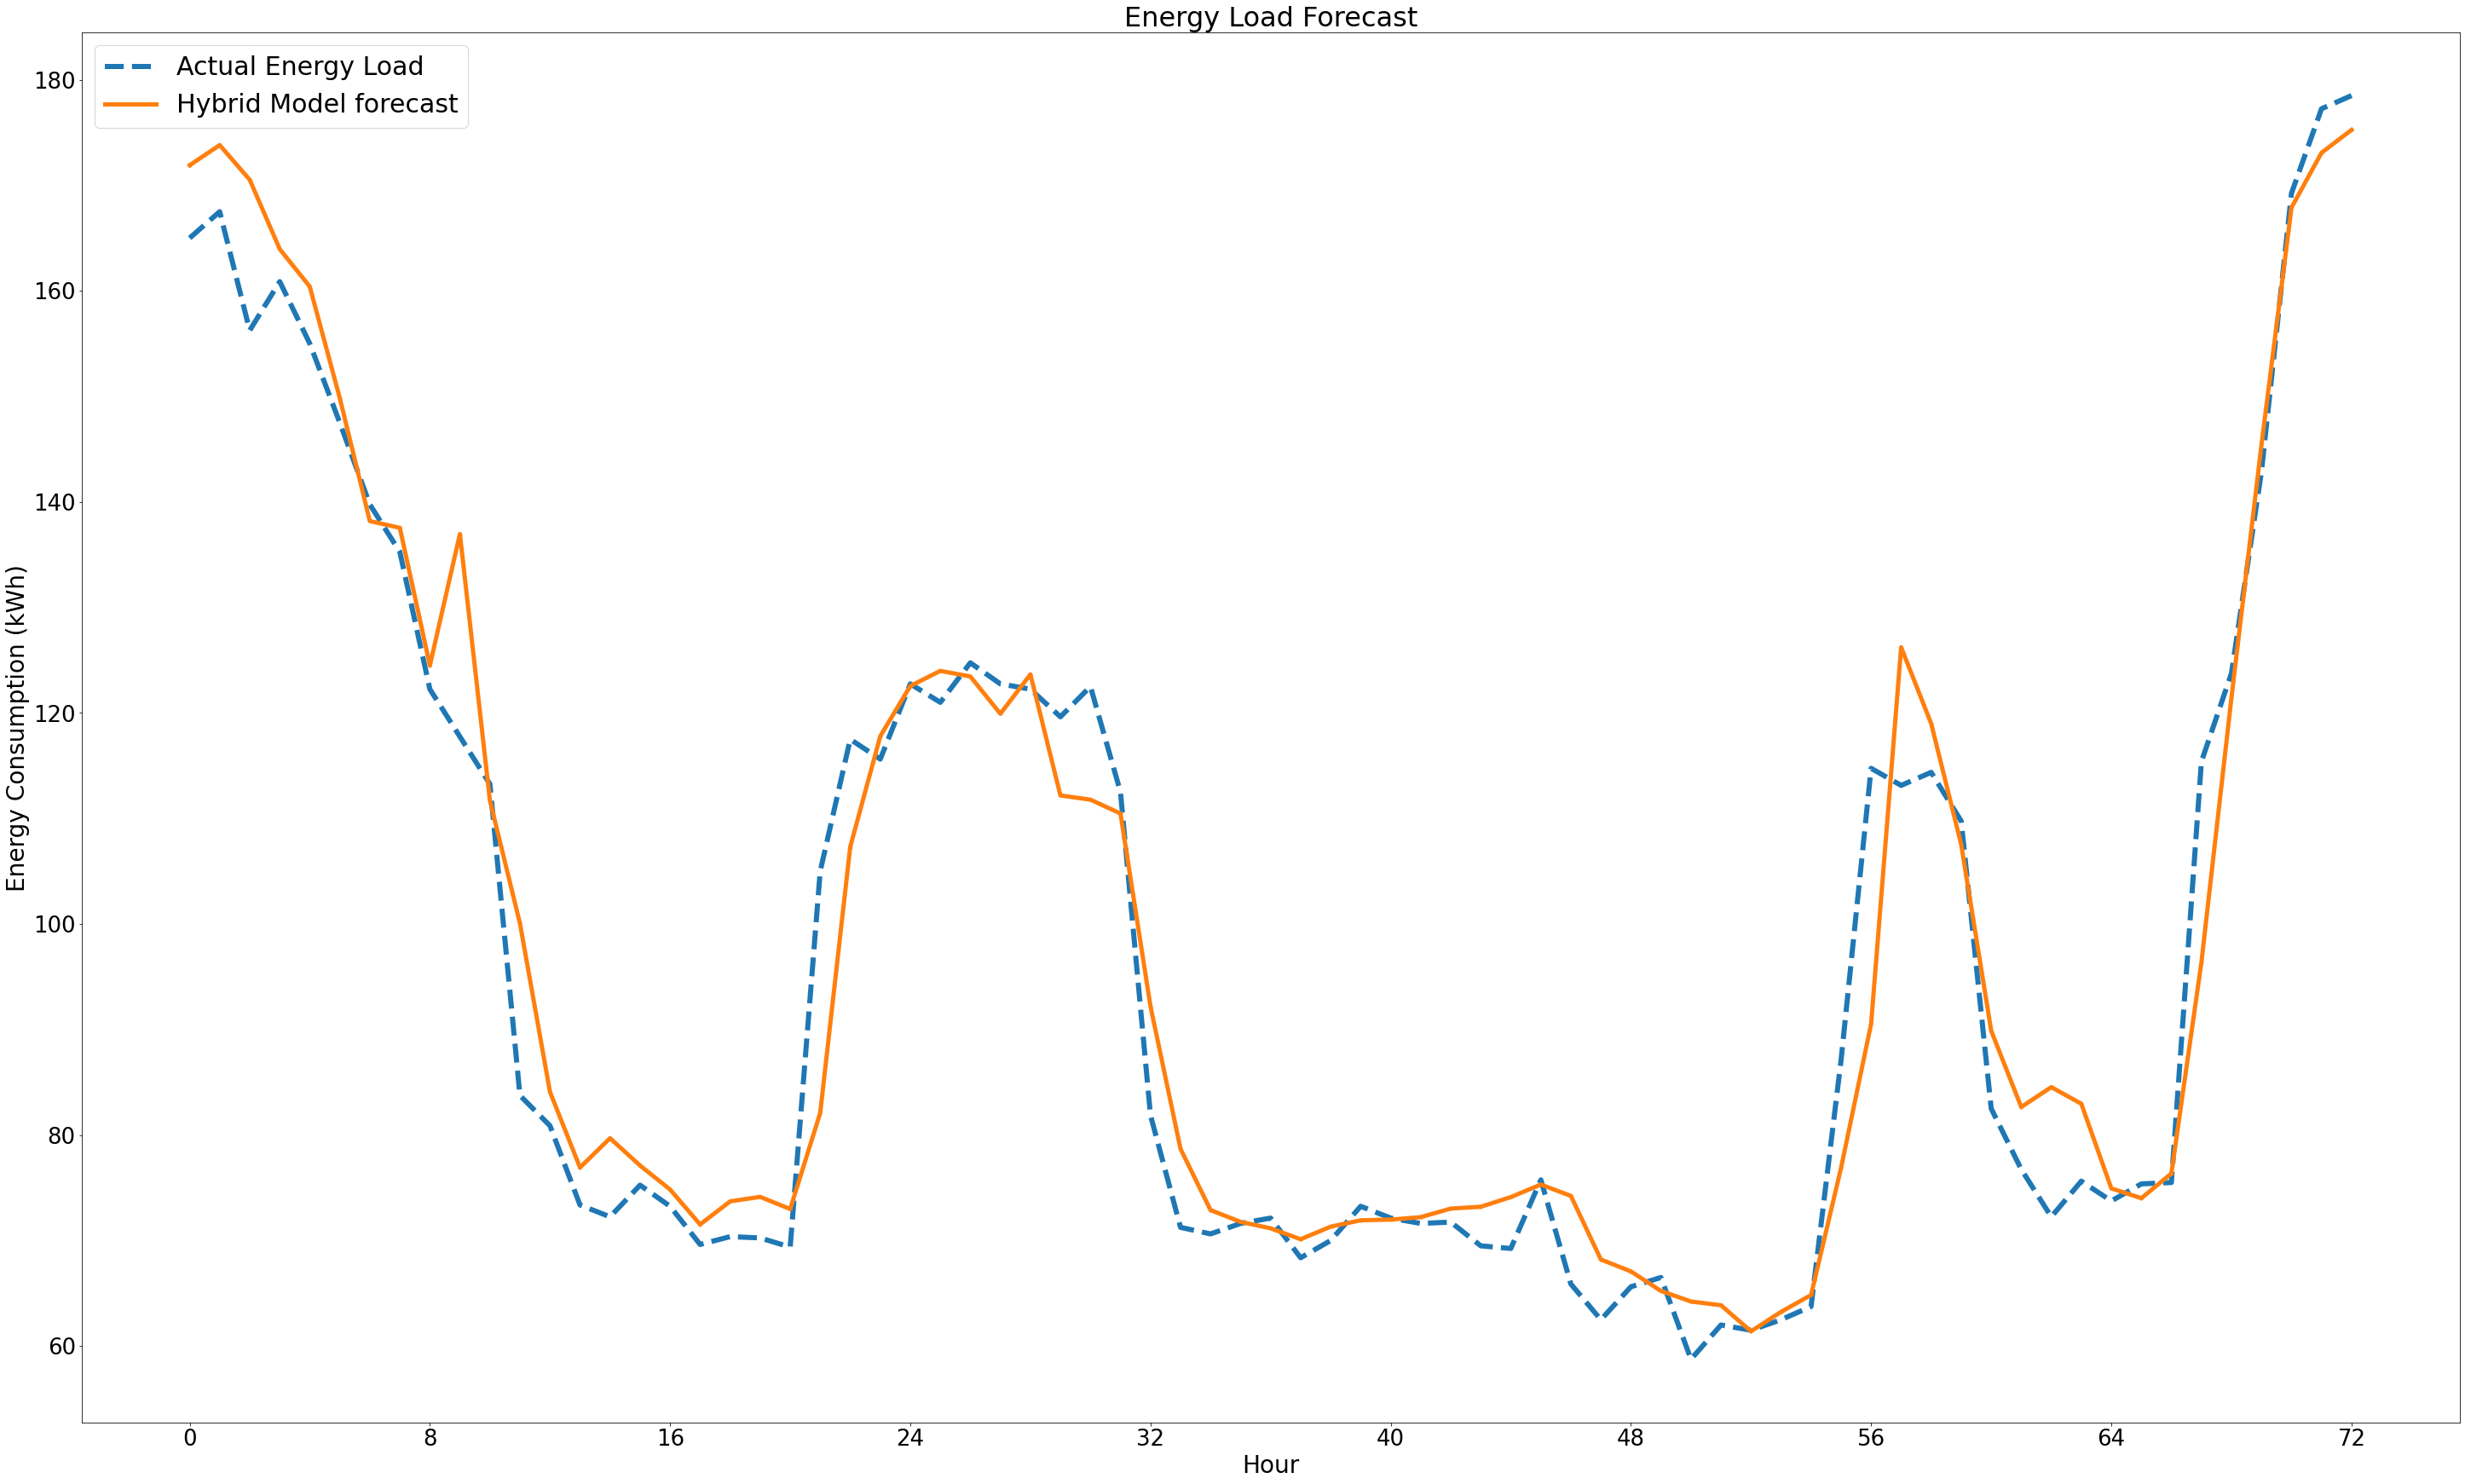

In [ ]:

stacked_model(X_test_newdata,y_test_newdata)

In [ ]:
start = time.time()
XGBoost = xgb.XGBRegressor(
)
XGBoost.fit(X_train, y_train)
y_pred = XGBoost.predict(X_test)
end = time.time()
metrics (y_test,y_pred,'XGBoost',0)
dump(XGBoost, 'filename.XGBoost_stored2') 

Model:XGBoost
MAPE (%): 12.579
MAE (kWh): 0.303
RMSE (kWh): 0.562
R-squared (%): 90.556
ET(seconds): 0.863


['filename.XGBoost_stored2']

In [ ]:
XGBoost_stored = load('filename.XGBoost_stored2') 
y_pred2 = XGBoost_stored.predict(X_test_newdata)
end = time.time()
metrics (y_test_newdata,y_pred2,'XGBoost',0)



Model:XGBoost
MAPE (%): 93.822
MAE (kWh): 118.963
RMSE (kWh): 126.502
R-squared (%): -770.235
ET(seconds): 1.466


In [ ]:

RF_stored = load('filename.RF_stored') 
y_pred2 = RF_stored.predict(X_test_newdata)
end = time.time()
metrics (y_test_newdata,y_pred2,'Random Forest',0)

Model:Random Forest
MAPE (%): 93.36
MAE (kWh): 118.432
RMSE (kWh): 125.973
R-squared (%): -762.979
ET(seconds): 1.927


In [ ]:


LGBM_stored = load('filename.LGBM_stored') 
y_pred = LGBM_stored.predict(X_test_newdata)
y_pred_LGBM=y_pred 
end = time.time()
metrics (y_test_newdata,y_pred_LGBM,'LGBM',0)

Model:LGBM
MAPE (%): 93.454
MAE (kWh): 118.515
RMSE (kWh): 126.034
R-squared (%): -763.818
ET(seconds): 2.146


In [ ]:
y_pred2

array([8.19542989, 8.19390489, 8.21078091, ..., 7.20933578, 7.220733  ,
       7.20933578])

In [ ]:
y_test_newdata

Actual Energy Load
0                79.6200
1                82.2502
2                81.0001
3                90.5000
4               117.0001
...                  ...
8078             99.5000
8079             97.5000
8080             99.5000
8081             71.5000
8082             73.5000

[8083 rows x 1 columns]

In [ ]:
X_test_newdata

T-24Cons  T-23Cons  T-22Cons  T-21Cons  T-20Cons  \
new_Timestamp_UTC                                                       
2016-01-04 01:00:00   84.0001   82.2501     80.25   80.7500   81.2500   
2016-01-04 02:00:00   82.2501   80.2500     80.75   81.2500   80.0000   
2016-01-04 03:00:00   80.2500   80.7500     81.25   80.0000   84.2500   
2016-01-04 04:00:00   80.7500   81.2500     80.00   84.2500   73.7501   
2016-01-04 05:00:00   81.2500   80.0000     84.25   73.7501   74.5000   
...                       ...       ...       ...       ...       ...   
2016-12-30 18:00:00  109.5000  106.2500    106.50  100.7500   82.7500   
2016-12-30 19:00:00  106.2500  106.5000    100.75   82.7500   69.7500   
2016-12-30 20:00:00  106.5000  100.7500     82.75   69.7500   69.0000   
2016-12-30 21:00:00  100.7500   82.7500     69.75   69.0000   69.0000   
2016-12-30 22:00:00   82.7500   69.7500     69.00   69.0000   67.0000   

                     T-19Cons  T-18Cons  T-17Cons  T-16Cons  T-15Cons  ...  \
new_Timestamp_UTC                                                      ...   
2016-01-04 01:00:00   80.0000   84.2500   73.7501   74.5000   73.7500  ...   
2016-01-04 02:00:00   84.2500   73.7501   74.5000   73.7500   72.5001  ...   
2016-01-04 03:00:00   73.7501   74.5000   73.7500   72.5001   74.0000  ...   
2016-01-04 04:00:00   74.5000   73.7500   72.5001   74.0000   71.8800  ...   
2016-01-04 05:00:00   73.7500   72.5001   74.0000   71.8800   71.6200  ...   
...                       ...       ...       ...       ...       ...  ...   
2016-12-30 18:00:00   69.7500   69.0000   69.0000   67.0000   68.0000  ...   
2016-12-30 19:00:00   69.0000   69.0000   67.0000   68.0000   67.2500  ...   
2016-12-30 20:00:00   69.0000   67.0000   68.0000   67.2500   91.0000  ...   
2016-12-30 21:00:00   67.0000   68.0000   67.2500   91.0000   95.7500  ...   
2016-12-30 22:00:00   68.0000   67.2500   91.0000   95.7500  101.5000  ...   

                     T-72Cons  std24_cons  quarter  month  day_of_month  \
new_Timestamp_UTC                                                         
2016-01-04 01:00:00   92.1202     1.68500        1      1             4   
2016-01-04 02:00:00   87.0000     1.31505        1      1             4   
2016-01-04 03:00:00   85.2501     1.00010        1      1             4   
2016-01-04 04:00:00   83.7502     0.12505        1      1             4   
2016-01-04 05:00:00   83.5001     4.62500        1      1             4   
...                       ...         ...      ...    ...           ...   
2016-12-30 18:00:00  115.2500     6.00000        4     12            30   
2016-12-30 19:00:00  115.7500     3.37500        4     12            30   
2016-12-30 20:00:00  113.7500     4.50000        4     12            30   
2016-12-30 21:00:00  109.0000     0.62500        4     12            30   
2016-12-30 22:00:00   84.7500     5.62500        4     12            30   

                     hour24  is_weekend  working_hours  off_hours  Week_day  
new_Timestamp_UTC                                                            
2016-01-04 01:00:00       1           0              0          1         0  
2016-01-04 02:00:00       2           0              0          1         0  
2016-01-04 03:00:00       3           0              0          1         0  
2016-01-04 04:00:00       4           0              0          1         0  
2016-01-04 05:00:00       5           0              0          1         0  
...                     ...         ...            ...        ...       ...  
2016-12-30 18:00:00      18           0              1          0         4  
2016-12-30 19:00:00      19           0              0          1         4  
2016-12-30 20:00:00      20           0              0          1         4  
2016-12-30 21:00:00      21           0              0          1         4  
2016-12-30 22:00:00      22           0              0          1         4  

[8083 rows x 60 columns]

In [ ]:


LGBM_stored = load('filename.LGBM_stored') 
y_pred = LGBM_stored.predict(X_test_newdata)
y_pred_LGBM=y_pred 
end = time.time()
metrics (y_test_newdata,y_pred_LGBM,'LGBM',2)


Model:LGBM
MAPE (%): 93.454
MAE (kWh): 118.515
RMSE (kWh): 126.034
R-squared (%): -763.818
ET(seconds): 3.044


In [ ]:
MLP_stored = load('filename.MLP_stored') 
y_pred_MLP = MLP_stored.predict(X_test_newdata)
#testPredict = model.predict(y_test)
#y_pred_MLP = y_sc.inverse_transform(y_pred_MLP)
end = time.time()
metrics (y_test_newdata,y_pred_MLP,'MLP',4)


Model:MLP
MAPE (%): 21.833
MAE (kWh): 23.539
RMSE (kWh): 30.184
R-squared (%): 50.456
ET(seconds): 3.297


In [ ]:
LSTM_stored = tf.keras.models.load_model("LSTM_model")
X_test_LSTM = X_sc.fit_transform(X_test_newdata)
X_test_LSTM=X_test_LSTM.reshape((X_test_LSTM.shape[0], 1, X_test_LSTM.shape[1]))
y_pred_LSTM = LSTM_stored.predict(X_test_LSTM)
y_pred_LSTM = y_sc.inverse_transform(y_pred_LSTM)

end = time.time()
metrics (y_test_newdata,y_pred_LSTM,'LSTM',5)
#print(history.history.keys())

253/253 [==============================] - 1s 1ms/step
Model:LSTM
MAPE (%): 97.28
MAE (kWh): 122.22
RMSE (kWh): 129.035
R-squared (%): -805.442
ET(seconds): 7.592
